## Objective
In this notebook, we're going to tackle some essential steps to get our data ready for machine learning models. We'll start by cleaning up our data, which means we're going to fill in missing values, figure out what to do with data points that don't fit the pattern (outliers), and make sure all the numbers are on a similar scale (normalization). After that, we're diving into picking the most important pieces of information (features) that help our models make accurate predictions. We're also going to use a cool tool called SHAP to understand why our models make the decisions they do. Our main focus is on making models that can predict energy and economic outcomes better because of how we prepare our data.

## Abstract
Here's what we're doing in this notebook: We've got a bunch of steps to prepare our data for machine learning, and we're showing how each step makes a difference. We're dealing with missing pieces of data, sorting out the odd data points, and adjusting the scale of our data to help our models learn better. We're choosing the best information that helps predict things accurately and using SHAP to peek into our models' thinking process. Our goal is to make models that are good at predicting energy and economic metrics by giving them clean and well-prepared data.


# ML Data Cleaning and Feature Selection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy import stats

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ramchitrala/dsem/099071e30a3903da1637df6d5157f48a40bc88fc/dataset.csv')
print("\nData types of each column:")
print(data.dtypes)
data.info()


Data types of each column:
Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP) 

# Are there missing values?
Yes and we'll deal with various imputation methods to evaluate the best technique.

In [3]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

## Data Cleaning

Let's Clean Data before Proceeding, As KNeighborsClassifier does not accept missing values encoded as NaN natively So using Mean as Imputer to calculate KNN's Imputation Accuracy. The data was further split to test accuracies for three methods and we'll pick one based on accuracies.

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
if 'Entity' not in data.columns:
    raise ValueError("The 'Entity' column is missing in the DataFrame.")

# Convert 'Density' column to numeric where possible
data.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
data['Density'] = pd.to_numeric(data['Density'], errors='coerce')

# Label encode 'Entity' column
label_encoder = LabelEncoder()
data['Entity'] = label_encoder.fit_transform(data['Entity'])

# Selecting only numeric columns for imputation
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
data_numeric = data[numeric_columns]

# Define the target variable
y = (data['Primary energy consumption per capita (kWh/person)'] > data['Primary energy consumption per capita (kWh/person)'].median()).astype(int)

# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = mean_imputer.fit_transform(data_numeric)
X_train, X_test, y_train, y_test = train_test_split(X_mean_imputed, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_mean_imputed = accuracy_score(y_test, y_pred)

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
X_median_imputed = median_imputer.fit_transform(data_numeric)
X_train, X_test, y_train, y_test = train_test_split(X_median_imputed, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_median_imputed = accuracy_score(y_test, y_pred)

# KNN with imputation
knn_imputer = SimpleImputer(strategy='mean')  # You can use mean or median imputation
X_knn_imputed = knn_imputer.fit_transform(data_numeric)
X_train, X_test, y_train, y_test = train_test_split(X_knn_imputed, y, test_size=0.3, random_state=42)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Output the accuracies
print("Mean Imputation Accuracy:", accuracy_mean_imputed)
print("Median Imputation Accuracy:", accuracy_median_imputed)
print("KNN Accuracy:", accuracy_knn)

Mean Imputation Accuracy: 0.9972602739726028
Median Imputation Accuracy: 0.9981735159817352
KNN Accuracy: 0.8986301369863013


Mean Imputation it is.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   int64  
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

## Outliers Analysis

Let's copy the mean imputed values into new dataframe for outlier analysis.

In [6]:
df_mean_imputed = pd.DataFrame(X_mean_imputed, columns=numeric_columns)
df_mean_imputed2 = pd.DataFrame(X_mean_imputed, columns=numeric_columns)
df_mean_imputed.tail()

Entity    Year  Access to electricity (% of population)  \
3644   175.0  2016.0                                42.561730   
3645   175.0  2017.0                                44.178635   
3646   175.0  2018.0                                45.572647   
3647   175.0  2019.0                                46.781475   
3648   175.0  2020.0                                52.747670   

      Access to clean fuels for cooking  \
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3644                                 3.50                             0.0   
3645                                 3.05                             0.0   
3646                                 3.73                             0.0   
3647                                 3.66                             0.0   
3648                                 3.40                             0.0   

      Electricity from renewables (TWh)  ...  \
3644                               3.32  ...   
3645                               4.30  ...   
3646                               5.46  ...   
3647                               4.58  ...   
3648                               4.19  ...   

      Primary energy consumption per capita (kWh/person)  \
3644                                          3227.6802    
3645                                          3068.0115    
3646                                          3441.9858    
3647                                          3003.6553    
3648                                          2680.1318    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3644                                              10.00             
3645                                               9.51             
3646                                               9.83             
3647                                              10.47             
3648                                              10.00             

      Value_co2_emissions_kt_by_country  \
3644                       11020.000460   
3645                       10340.000150   
3646                       12380.000110   
3647                       11760.000230   
3648                      159866.462686   

      Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
3644                                 11.986707    0.755869     1464.588957   
3645                                 11.986707    4.709492     1235.189032   
3646                                 11.986707    4.824211     1254.642265   
3647                                 11.986707   -6.144236     1316.740657   
3648                    

In [7]:
df_mean_imputed = df_mean_imputed.drop("Electricity from nuclear (TWh)", axis=1)
data.reset_index(drop=True, inplace=True)
df_mean_imputed.tail()

Entity    Year  Access to electricity (% of population)  \
3644   175.0  2016.0                                42.561730   
3645   175.0  2017.0                                44.178635   
3646   175.0  2018.0                                45.572647   
3647   175.0  2019.0                                46.781475   
3648   175.0  2020.0                                52.747670   

      Access to clean fuels for cooking  \
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from renewables (TWh)  \
3644                                 3.50                               3.32   
3645                                 3.05                               4.30   
3646                                 3.73                               5.46   
3647                                 3.66                               4.58   
3648                                 3.40                               4.19   

      Low-carbon electricity (% electricity)  \
3644                               48.680350   
3645                               58.503407   
3646                               59.412407   
3647                               55.582527   
3648                               55.204216   

      Primary energy consumption per capita (kWh/person)  \
3644                                          3227.6802    
3645                                          3068.0115    
3646                                          3441.9858    
3647                                          3003.6553    
3648                                          2680.1318    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3644                                              10.00             
3645                                               9.51             
3646                                               9.83             
3647                                              10.47             
3648                                              10.00             

      Value_co2_emissions_kt_by_country  \
3644                       11020.000460   
3645                       10340.000150   
3646                       12380.000110   
3647                       11760.000230   
3648                      159866.462686   

      Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
3644                                 11.986707    0.755869     1464.588957   
3645                                 11.986707    4.709492     1235.189032   
3646                                 11.986707    4.824211     1254.642265   
3647                                 11.986707   -6.144236     1316.740657   
3648  

In this code, we begin by imputing missing values in the DataFrame ('df_mean_imputed') using the mean and printing the resulting DataFrame. Next, we define the target variable based on a median threshold. The code then performs outlier handling using three methods: capping, replacing, and removing outliers. For each method, it calculates the lower and upper bounds based on the interquartile range (IQR) and applies the corresponding treatment to the data. Finally, logistic regression models are trained on each pre-processed dataset, and accuracies are printed for evaluation. The entire process is encapsulated in a loop, iterating over the original imputed dataset and the three outlier-handled datasets. The logistic regression model is used with a maximum iteration set to 1000, and the accuracy scores for each dataset are displayed, providing insights into the effectiveness of the outlier handling methods.

In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'df_mean_imputed' is your DataFrame with mean imputed values
print("DataFrame with Mean Imputed Values:")
print(df_mean_imputed.head())

# Define the target variable
y = (df_mean_imputed['Primary energy consumption per capita (kWh/person)'] > df_mean_imputed['Primary energy consumption per capita (kWh/person)'].median()).astype(int)

# Apply each outlier handling method to the dataset
data_original_label = df_mean_imputed.copy()  # Original data

data_capped_label = data_original_label.copy()
for column in data_capped_label.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_capped_label[column].quantile(0.25)
    Q3 = data_capped_label[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_capped_label[column] = data_capped_label[column].clip(lower=lower_bound, upper=upper_bound)

data_replaced_label = data_original_label.copy()
for column in data_replaced_label.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_replaced_label[column].quantile(0.25)
    Q3 = data_replaced_label[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_replaced_label[column] = data_replaced_label[column].mask((data_replaced_label[column] < lower_bound) | (data_replaced_label[column] > upper_bound), data_replaced_label[column].median())

data_removed_label = data_original_label.copy()
for column in data_removed_label.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_removed_label[column].quantile(0.25)
    Q3 = data_removed_label[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_removed_label = data_removed_label[(data_removed_label[column] >= lower_bound) & (data_removed_label[column] <= upper_bound)]

# Train Logistic Regression Models and Print Accuracies
for i, dataset in enumerate([df_mean_imputed, data_capped_label, data_replaced_label, data_removed_label]):
    y = (dataset['Primary energy consumption per capita (kWh/person)'] > dataset['Primary energy consumption per capita (kWh/person)'].median()).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Dataset_{i+1}: {accuracy * 100:.2f}%")

DataFrame with Mean Imputed Values:
   Entity    Year  Access to electricity (% of population)  \
0     0.0  2000.0                                 1.613591   
1     0.0  2001.0                                 4.074574   
2     0.0  2002.0                                 9.409158   
3     0.0  2003.0                                14.738506   
4     0.0  2004.0                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75   

Dataset_2 (Capped Data) has highest Accuracy. The resulting data_capped_label dataset contains values within the defined bounds, mitigating the impact of outliers on subsequent analyses or machine learning models.

In [9]:
data_capped_label.tail()

Entity    Year  Access to electricity (% of population)  \
3644   175.0  2016.0                                42.561730   
3645   175.0  2017.0                                44.178635   
3646   175.0  2018.0                                45.572647   
3647   175.0  2019.0                                46.781475   
3648   175.0  2020.0                                52.747670   

      Access to clean fuels for cooking  \
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from renewables (TWh)  \
3644                                 3.50                               3.32   
3645                                 3.05                               4.30   
3646                                 3.73                               5.46   
3647                                 3.66                               4.58   
3648                                 3.40                               4.19   

      Low-carbon electricity (% electricity)  \
3644                               48.680350   
3645                               58.503407   
3646                               59.412407   
3647                               55.582527   
3648                               55.204216   

      Primary energy consumption per capita (kWh/person)  \
3644                                          3227.6802    
3645                                          3068.0115    
3646                                          3441.9858    
3647                                          3003.6553    
3648                                          2680.1318    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3644                                               9.87             
3645                                               9.51             
3646                                               9.83             
3647                                               9.87             
3648                                               9.87             

      Value_co2_emissions_kt_by_country  \
3644                       11020.000460   
3645                       10340.000150   
3646                       12380.000110   
3647                       11760.000230   
3648                      159866.462686   

      Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
3644                                 11.986707    0.755869     1464.588957   
3645                                 11.986707    4.709492     1235.189032   
3646                                 11.986707    4.824211     1254.642265   
3647                                 11.986707   -4.186574     1316.740657   
3648  

### Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)'
]

# Create the StandardScaler object
scaler = StandardScaler()

# Fit and transform the columns in the DataFrame
data_capped_label[columns_to_normalize] = scaler.fit_transform(data_capped_label[columns_to_normalize])

# What are the likely distributions of the numeric variables?

<ipython-input-11-06553ee6620c>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 5))


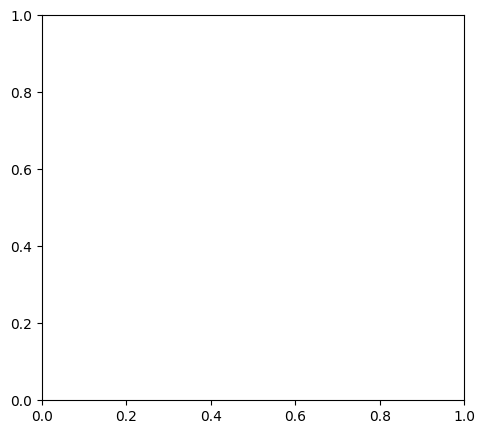

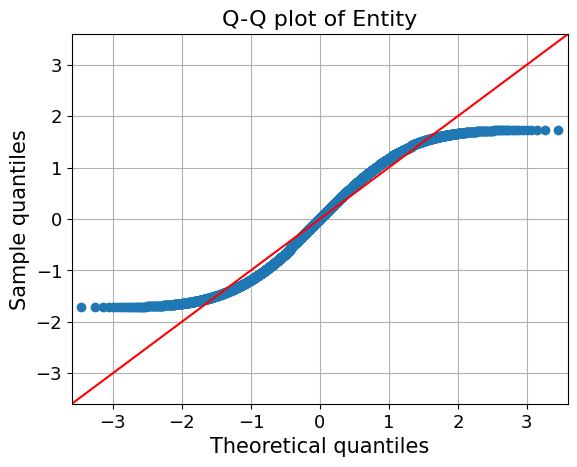

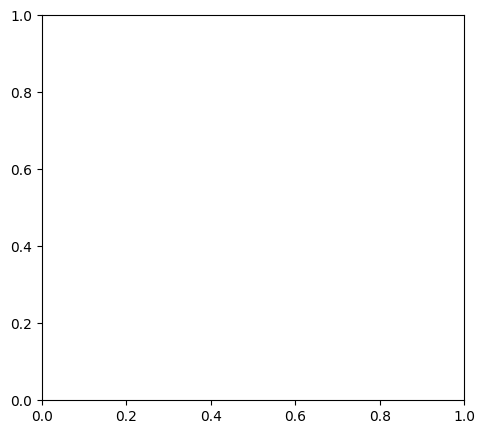

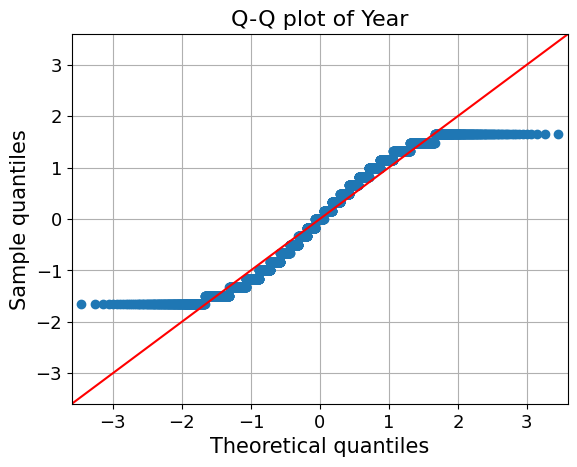

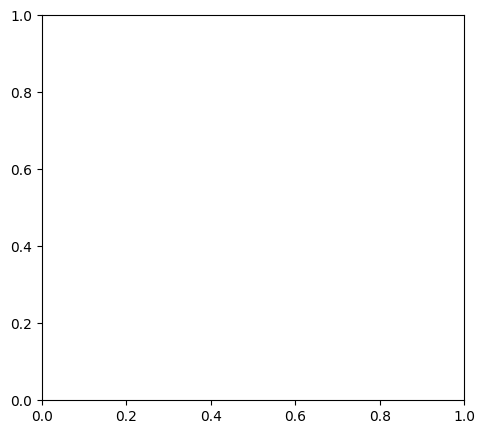

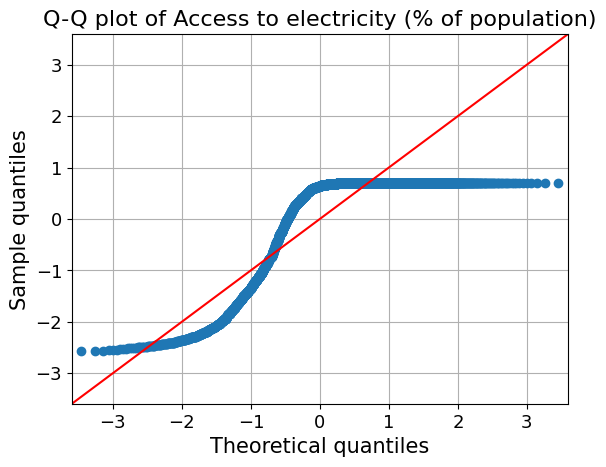

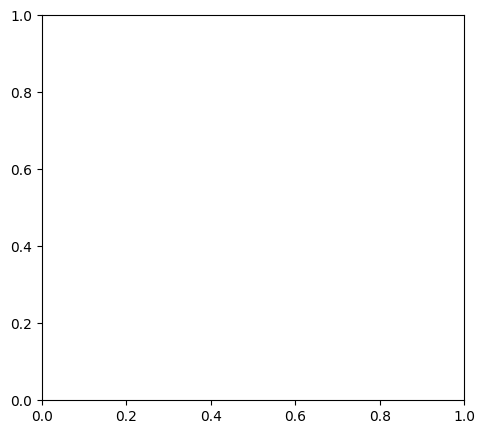

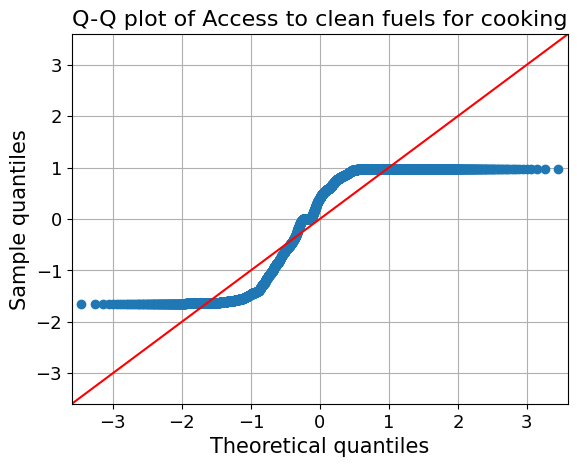

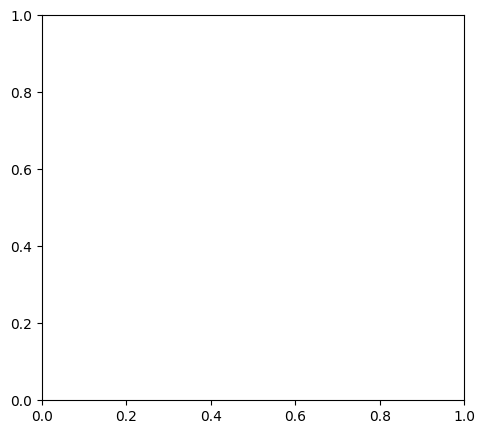

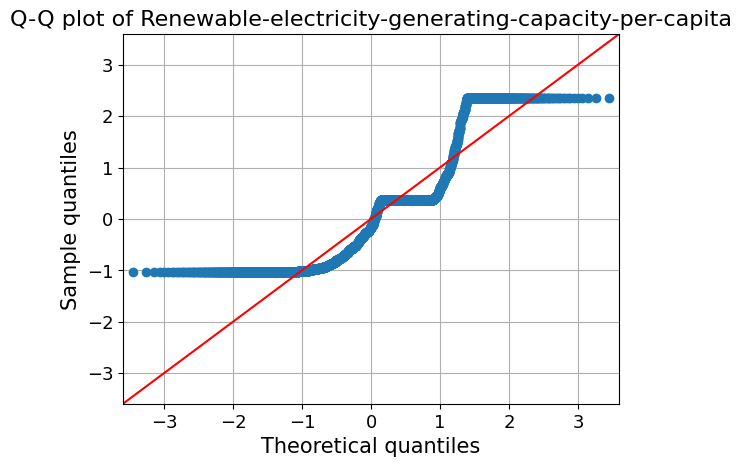

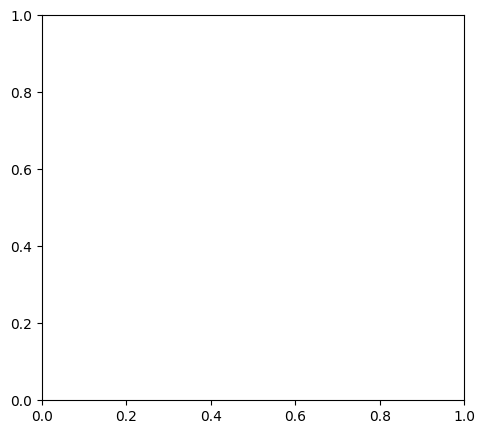

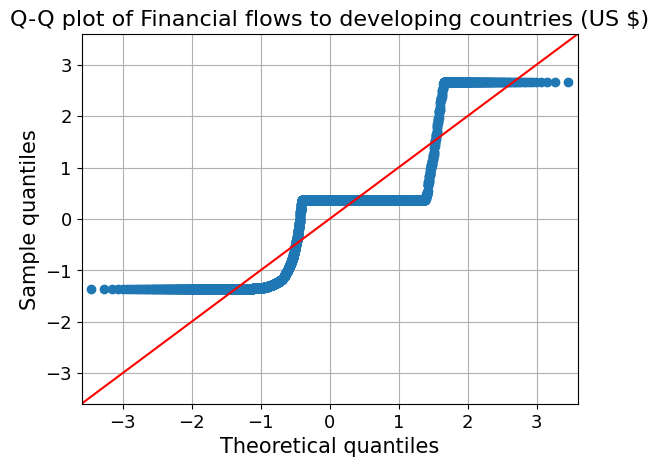

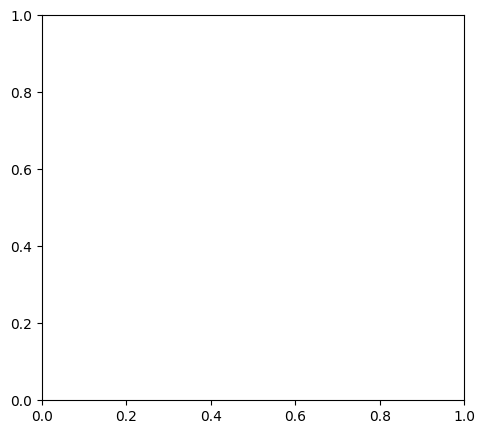

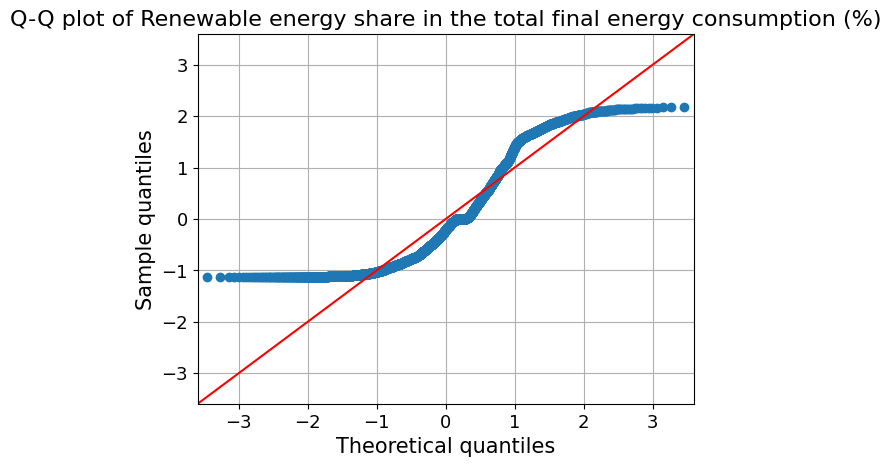

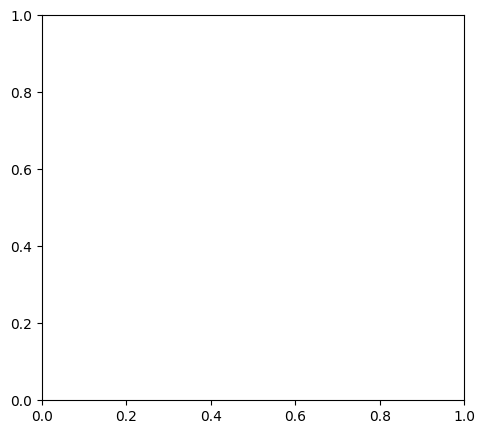

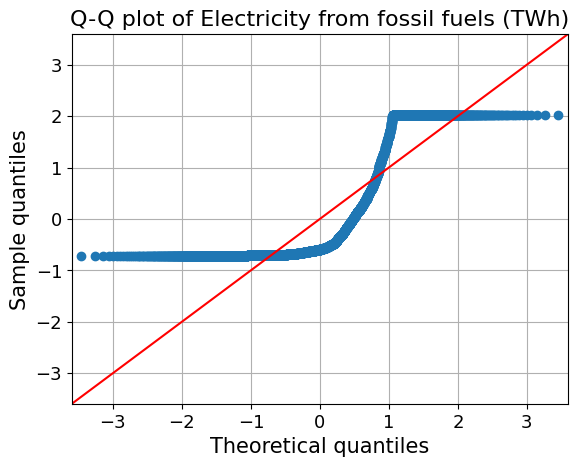

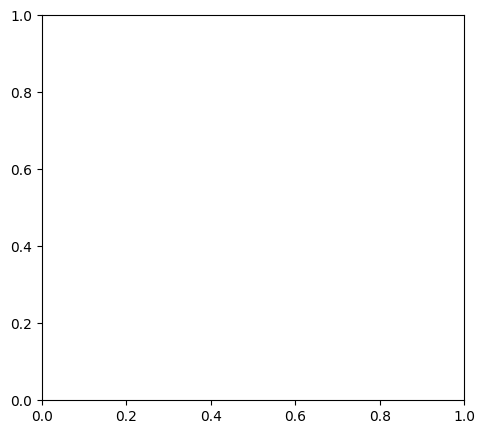

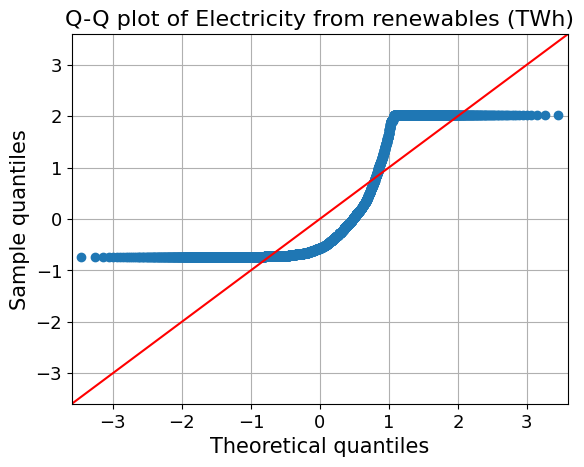

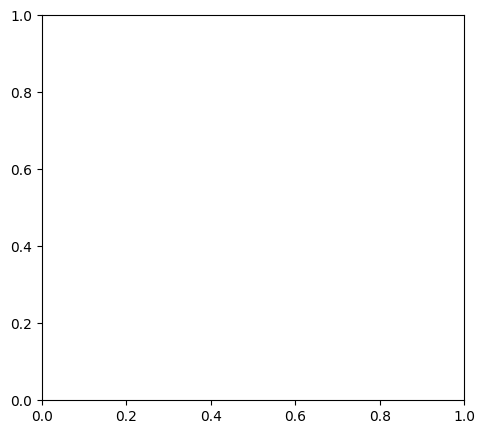

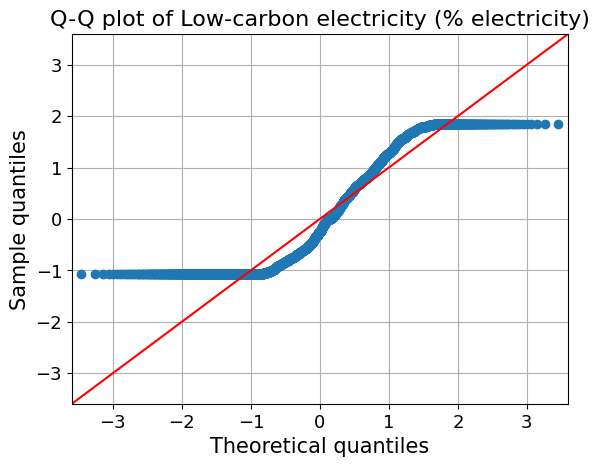

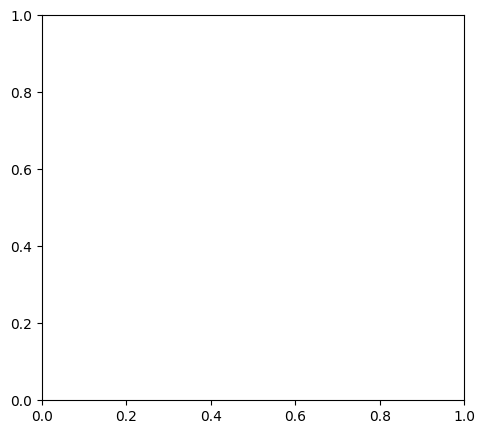

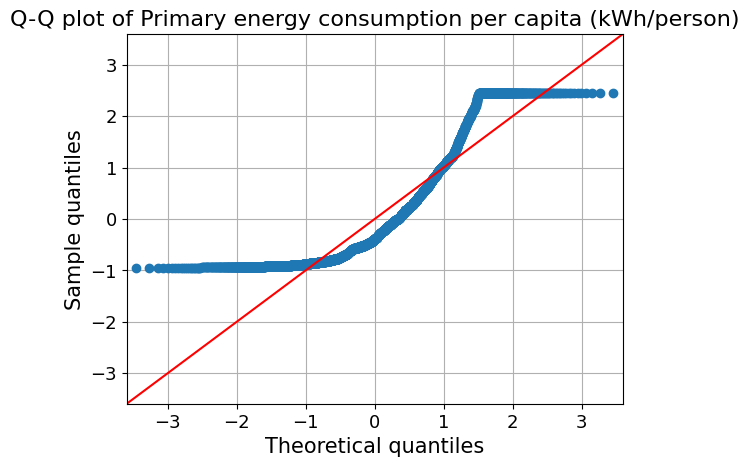

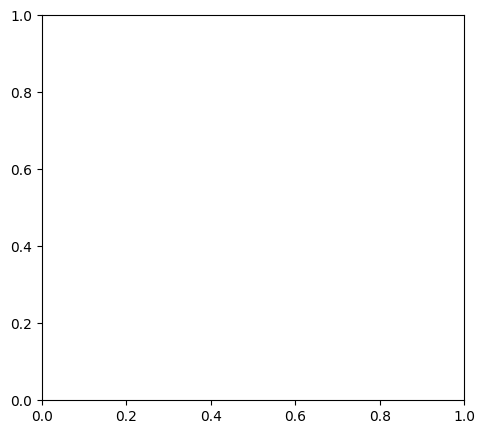

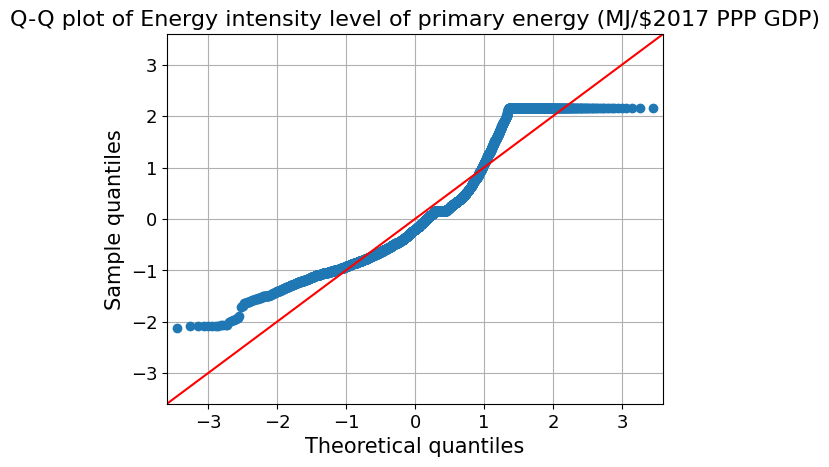

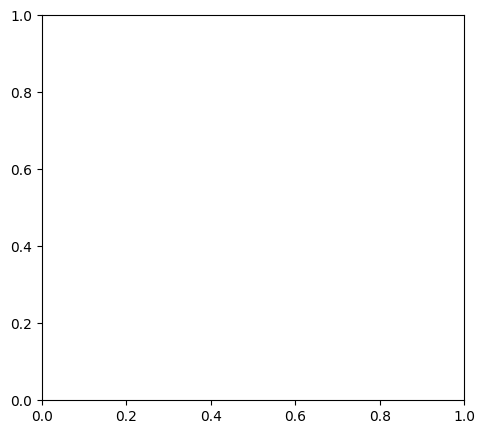

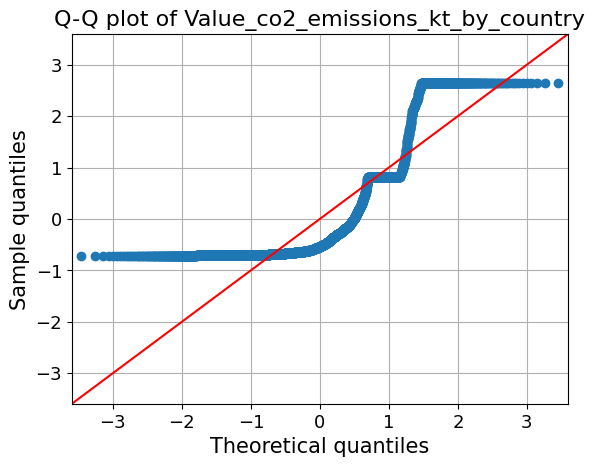

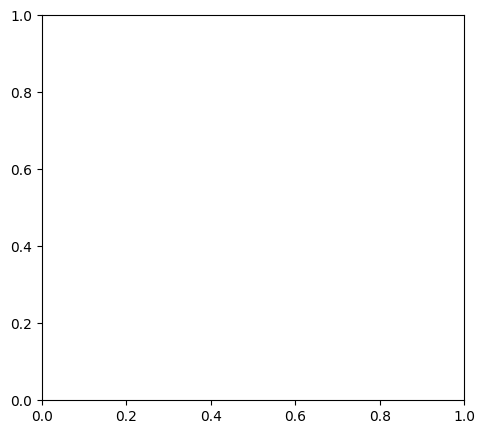

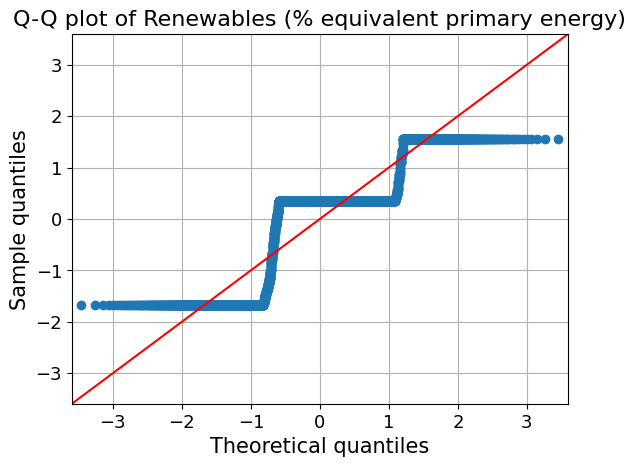

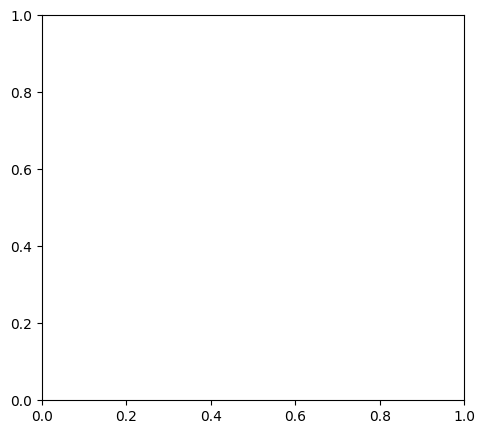

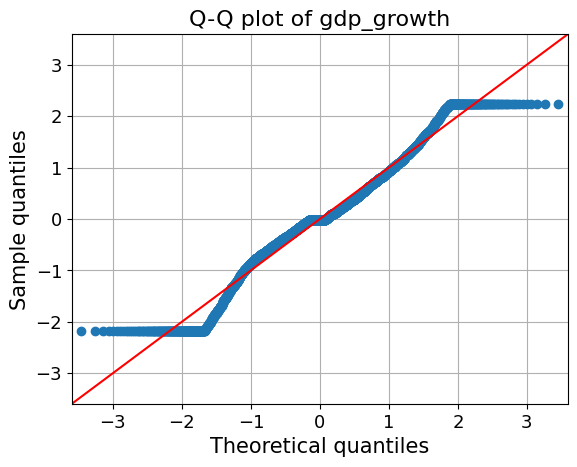

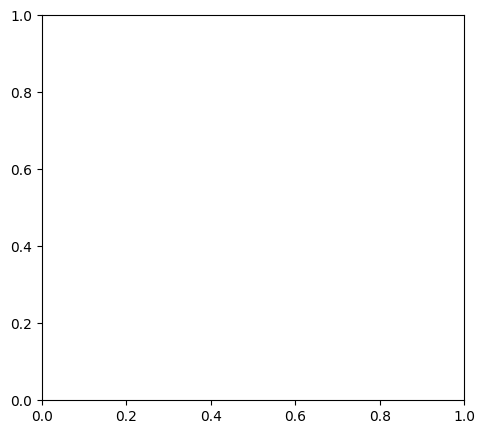

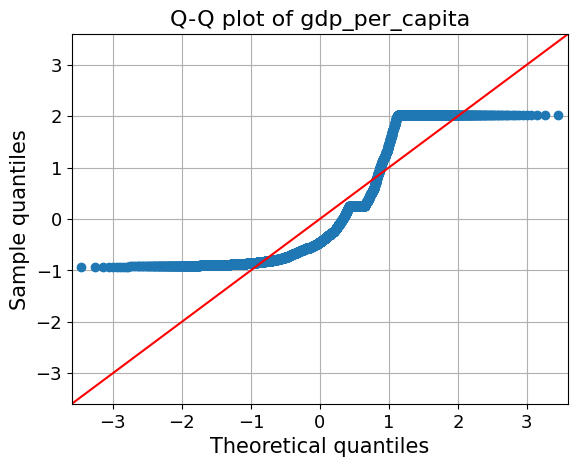

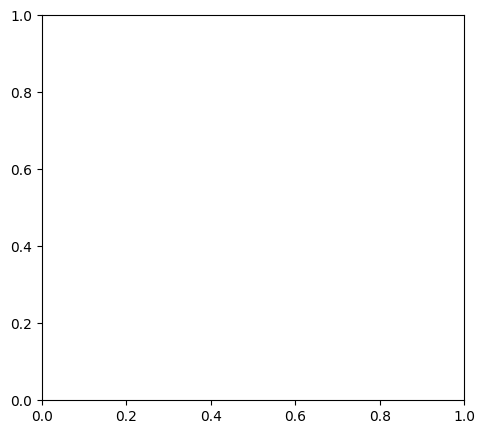

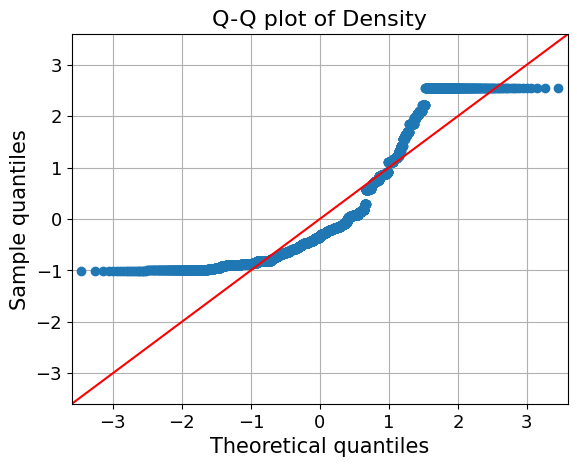

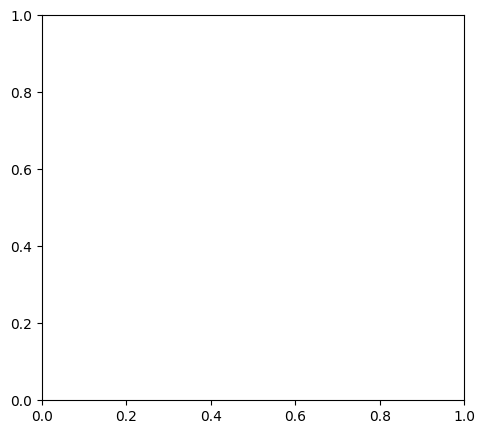

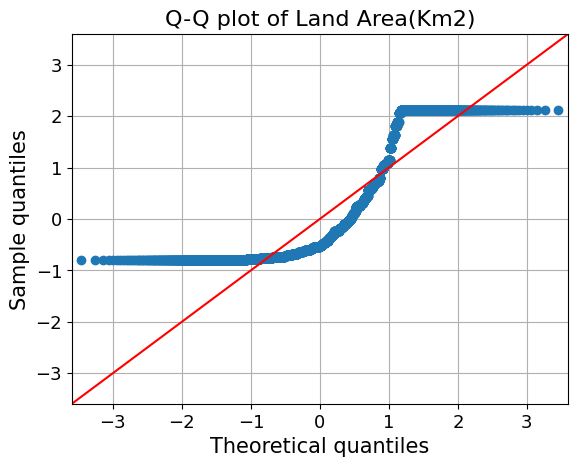

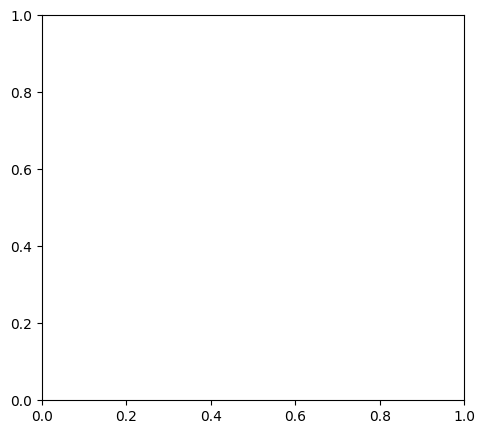

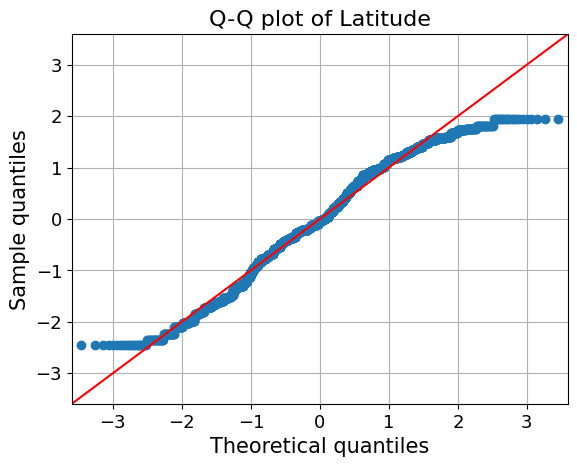

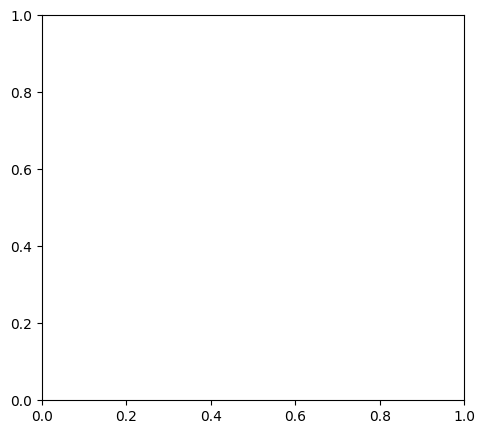

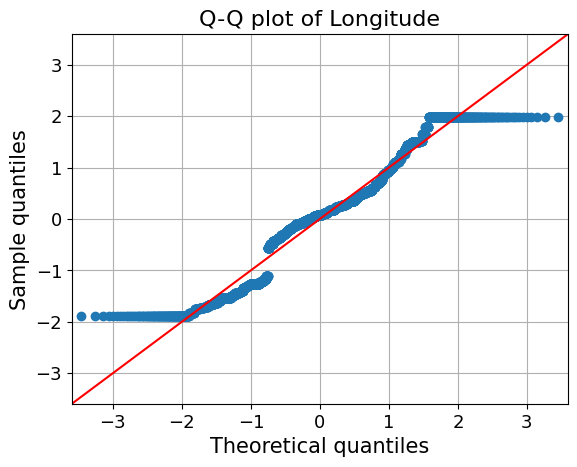

In [11]:
from statsmodels.graphics.gofplots import qqplot

data_norm = data_capped_label.select_dtypes(include='number')  # Select only numeric columns

for c in data_norm.columns:
    # Q-Q plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)



As you can see most of the features are normally distributed as observed through the QQ Plots

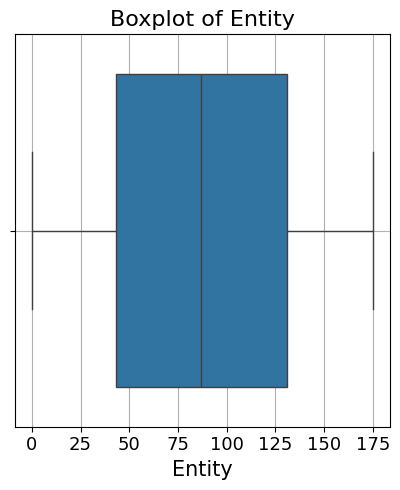

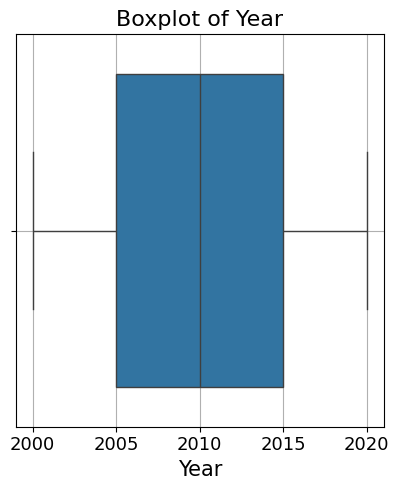

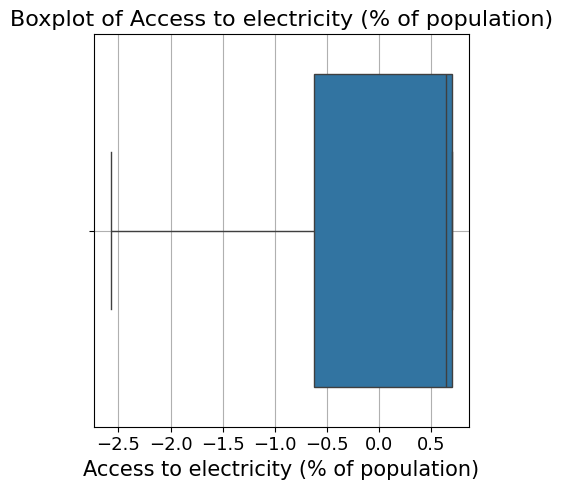

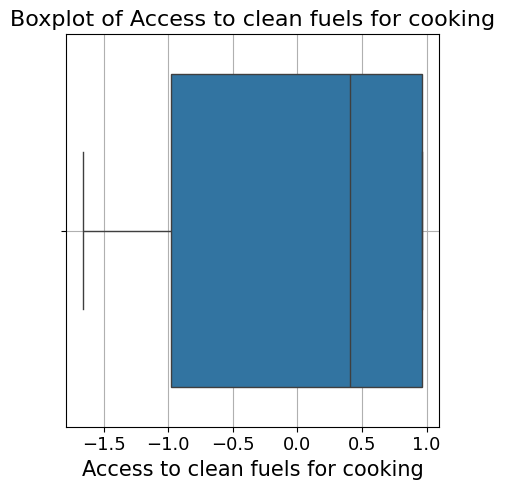

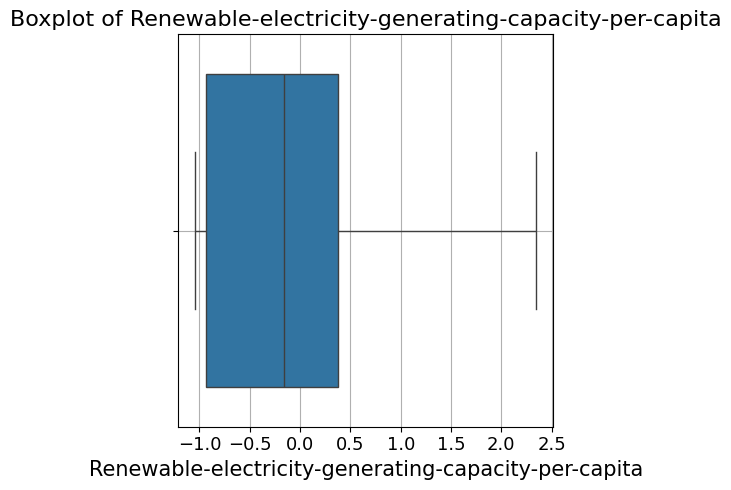

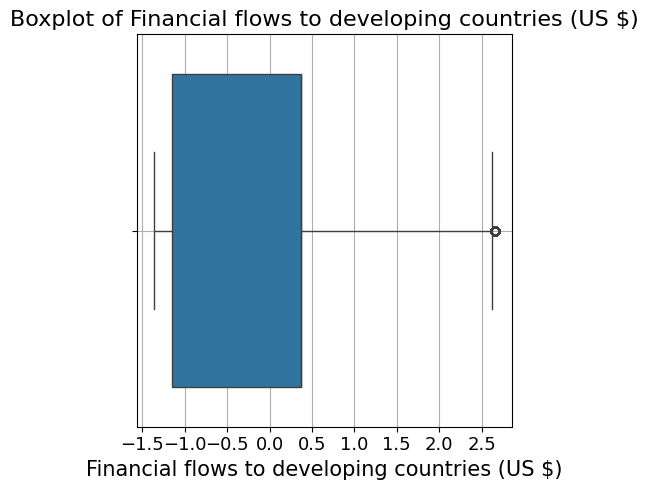

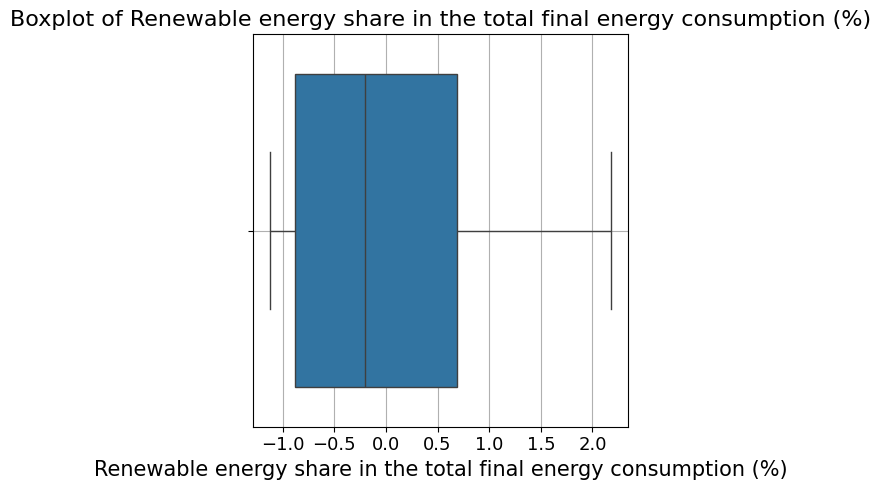

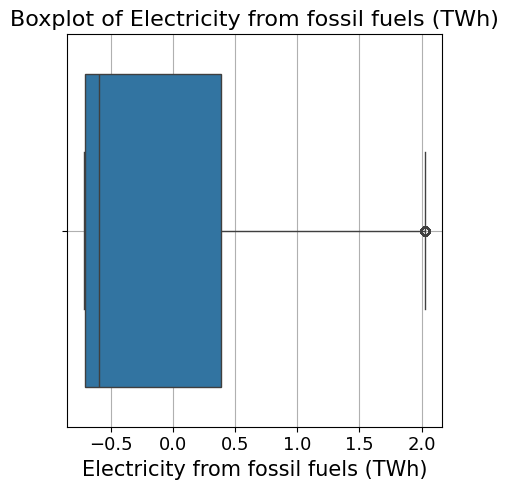

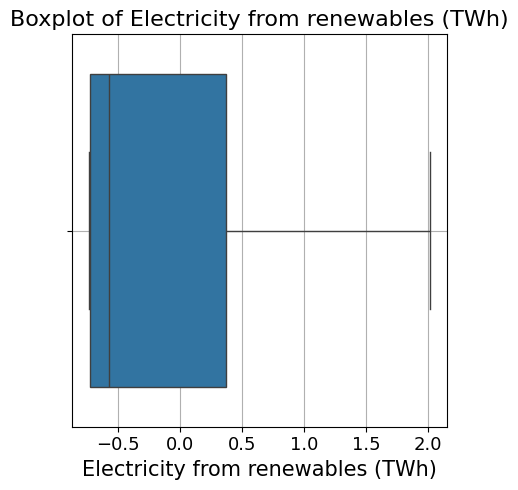

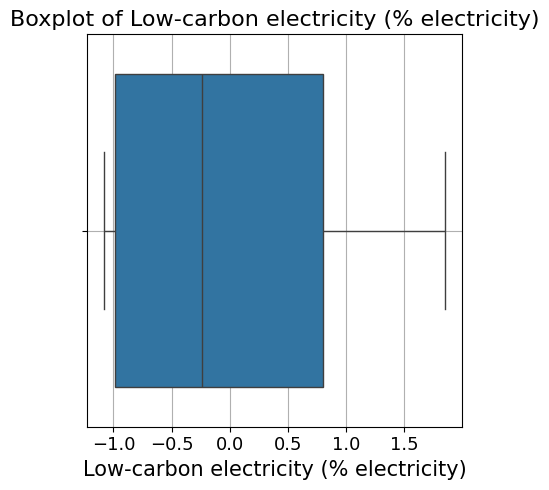

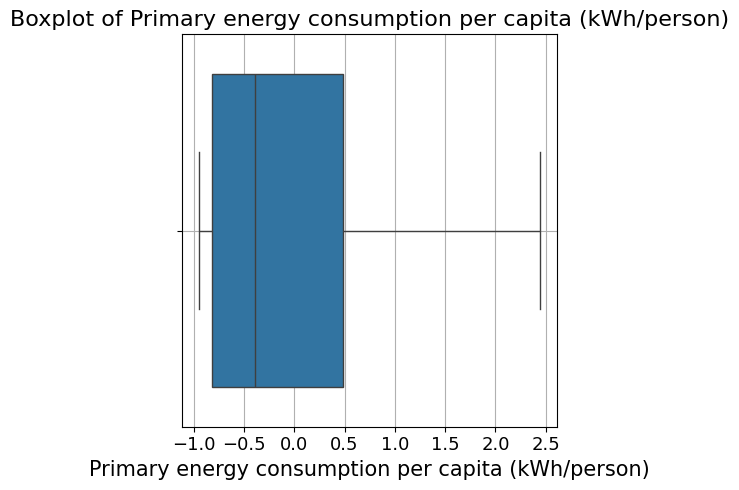

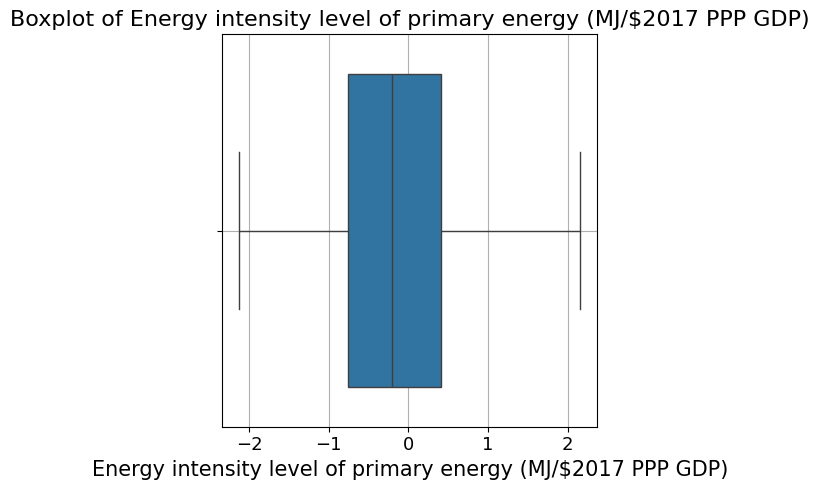

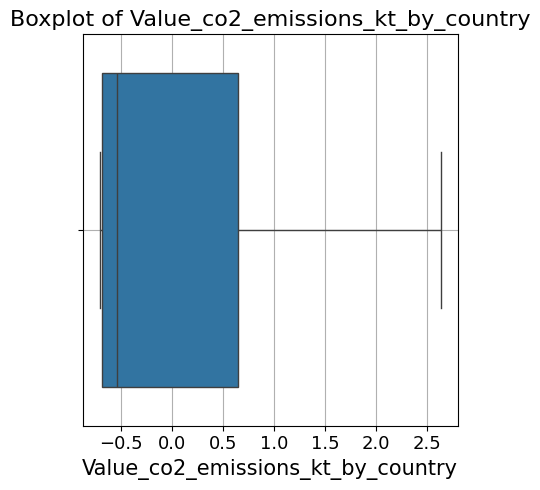

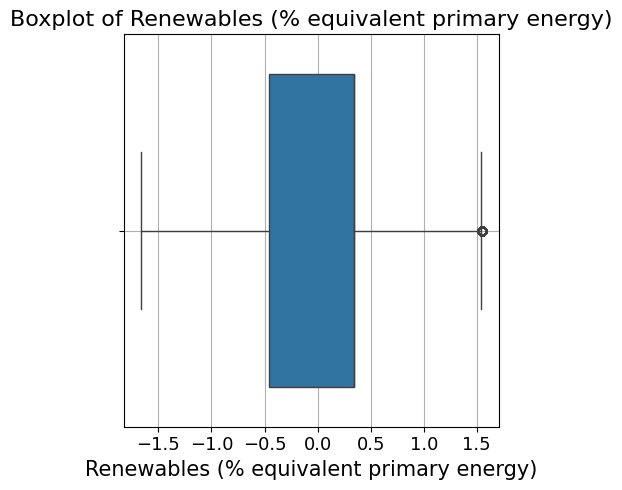

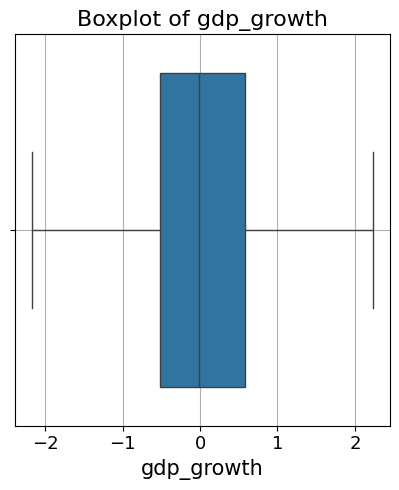

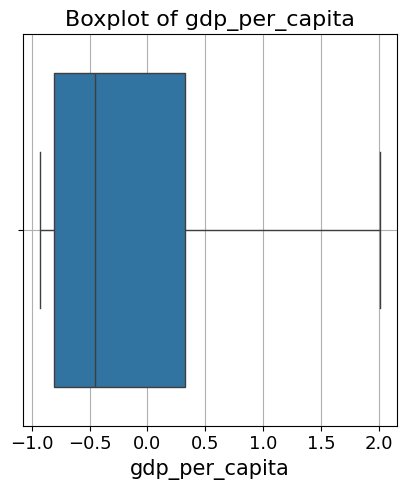

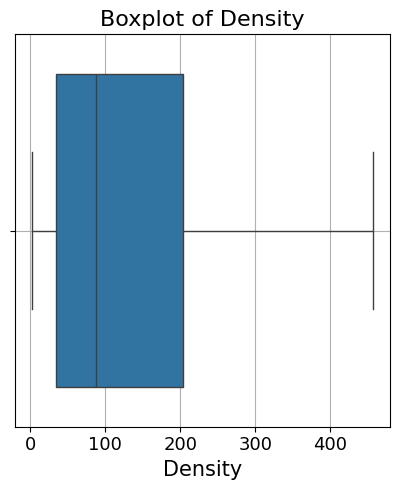

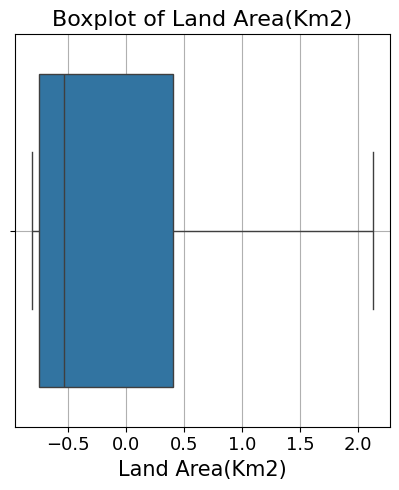

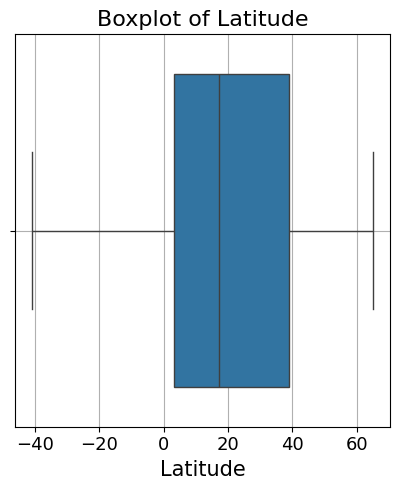

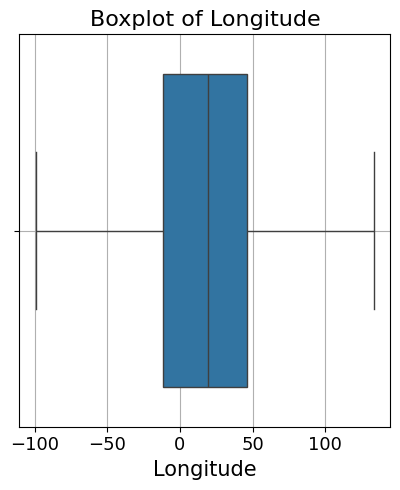

In [12]:
data_norm = data_capped_label.select_dtypes(include='number')  # Select only numeric columns

for c in data_norm.columns:
    # Box plot
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_norm[c])
    plt.title("Boxplot of {}".format(c), fontsize=16)
    plt.xlabel("{}".format(c), fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

As you can see all the observations are within range of min and max and near zero count of outliers

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)



1. Correlation Matrix: Identify feature relationships, select strong correlations with target or each other, and remove low-correlation features for model efficiency.

2. Random Forest Feature Importance: Train a model, assess feature importance, and select top features based on contribution to predictive performance, suitable for classification and regression.

3. Recursive Feature Elimination (RFE): Use RFE with a chosen model to iteratively eliminate features, considering their impact on model performance, until the desired number of features is reached.

In [13]:
data_capped_label.corr()

Entity      Year  \
Entity                                              1.000000  0.006182   
Year                                                0.006182  1.000000   
Access to electricity (% of population)            -0.016878  0.124581   
Access to clean fuels for cooking                  -0.010785  0.071555   
Renewable-electricity-generating-capacity-per-c... -0.080013  0.121672   
Financial flows to developing countries (US $)     -0.002160  0.071367   
Renewable energy share in the total final energ... -0.001960 -0.027241   
Electricity from fossil fuels (TWh)                 0.076927  0.045655   
Electricity from renewables (TWh)                   0.064212  0.093769   
Low-carbon electricity (% electricity)             -0.035989  0.029952   
Primary energy consumption per capita (kWh/person)  0.040049  0.006099   
Energy intensity level of primary energy (MJ/$2...  0.109635 -0.131369   
Value_co2_emissions_kt_by_country                   0.068513  0.090900   
Renewables (% equivalent primary energy)           -0.050449  0.084050   
gdp_growth                                          0.014381 -0.219091   
gdp_per_capita                                      0.000157  0.117741   
Density                                            -0.001979 -0.004088   
Land Area(Km2)                                     -0.013939 -0.001734   
Latitude                                           -0.067975  0.003505   
Longitude                                           0.125872  0.001077   

                                                    Access to electricity (% of population)  \
Entity                                                                            -0.016878   
Year                                                                               0.124581   
Access to electricity (% of population)                                            1.000000   
Access to clean fuels for cooking                                                  0.854515   
Renewable-electricity-generating-capacity-per-c...                                 0.456944   
Financial flows to developing countries (US $)                                     0.219952   
Renewable energy share in the total final energ...                                -0.766297   
Electricity from fossil fuels (TWh)                                                0.403316   
Electricity from renewables (TWh)                                                  0.328699   
Low-carbon electricity (% electricity)                                            -0.150473   
Primary energy consumption per capita (kWh/person)                                 0.569479   
Energy intensity level of primary energy (MJ/$2...                                -0.316153   
Value_co2_emissions_kt_by_country                                                  0.332509   
Renewables (% equivalent primary energy)                                          -0.206473   
gdp_growth                                                                        -0.149301   
gdp_per_capita                                                                     0.507182   
Density                                                                            0.115922   
Land Area(Km2)                                                                    -0.182147   
Latitude                                                                           0.420443   
Longitude                                                                         -0.108785   

                                                    Access to clean fuels for cooking  \
Entity                                                                      -0.010785   
Year                                                                         0.071555   
Access to electricity (% of population)                                      0.854515   
Access to clean fuels for cooking                                            1.000000   
Renewable-electricity-generating-capacity-per-c...        

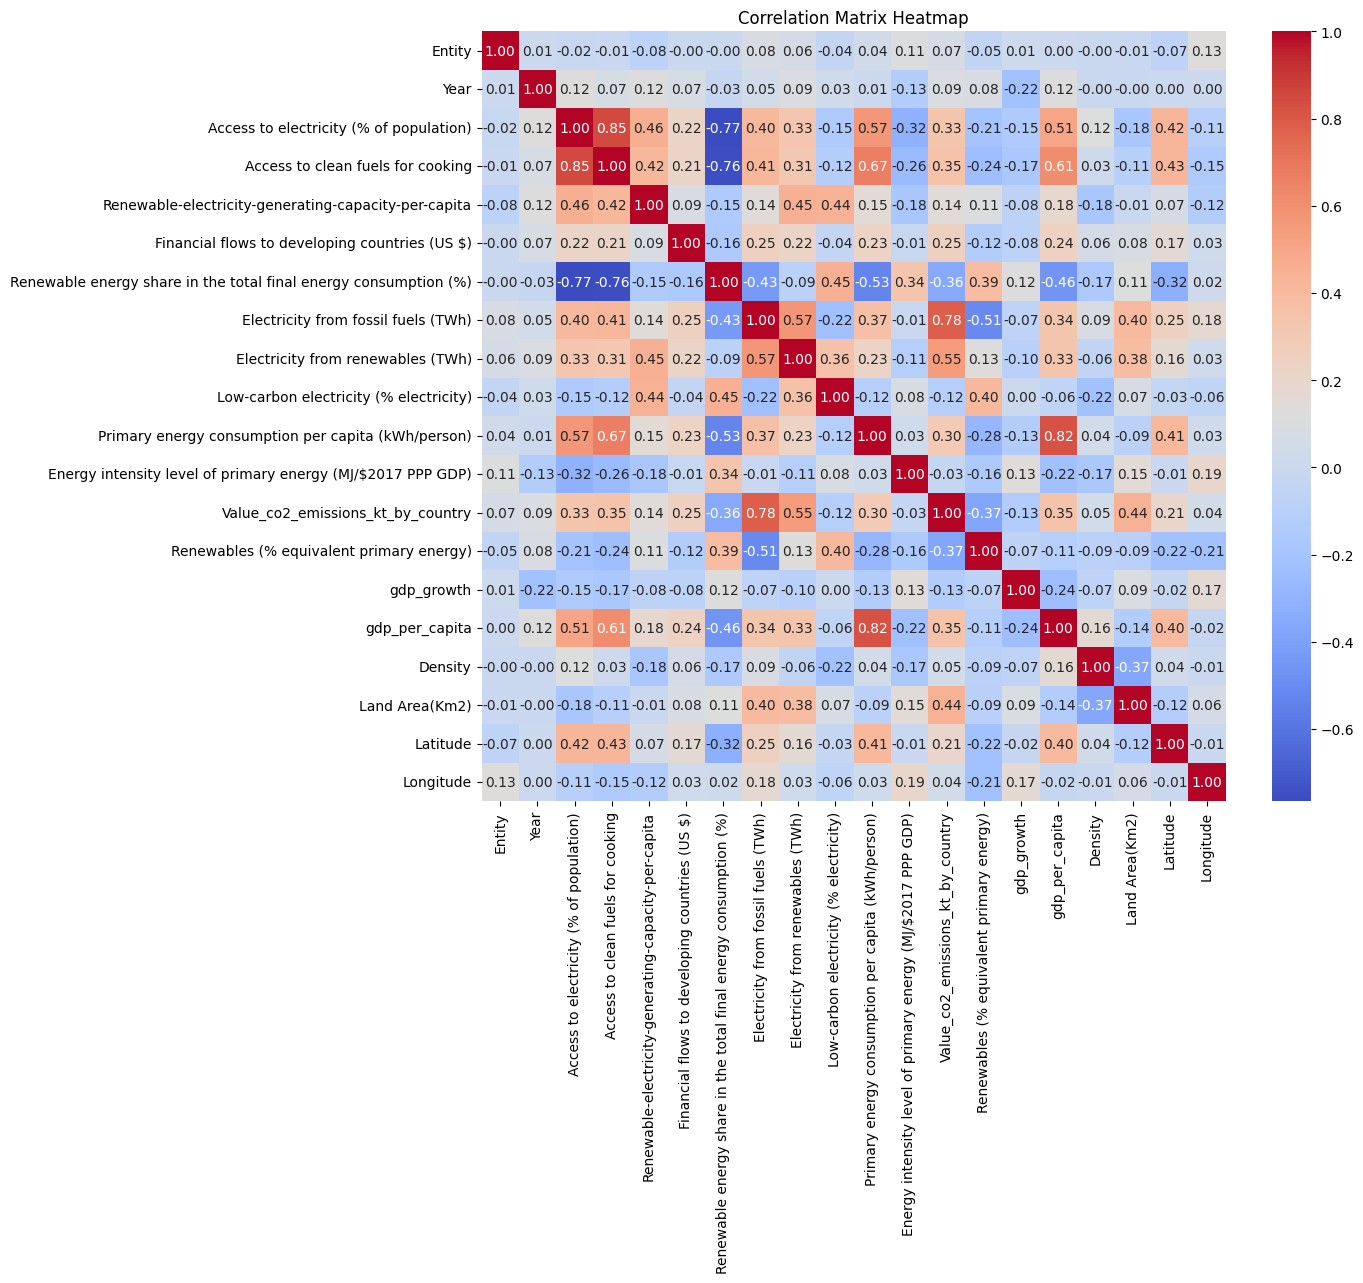

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_capped_label is your DataFrame
correlation_matrix = data_capped_label.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

### Random Forest Feature Importance:

Train a Random Forest model on the data.
Assess the importance of each feature based on how much it contributes to the model's performance.
Select the top-ranking features according to their importance scores.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X and y are your features and target variable
X = data_capped_label.drop('Primary energy consumption per capita (kWh/person)', axis=1)
y = data_capped_label['Primary energy consumption per capita (kWh/person)']

# Create and fit a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances and select top features
feature_importances = rf_model.feature_importances_
selected_features_rf = X.columns[feature_importances.argsort()[::-1]][:5]  # Replace 5 with the number of features you want

# Print or use the selected features
print("Selected Features:", selected_features_rf)

Selected Features: Index(['gdp_per_capita', 'Access to clean fuels for cooking',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Entity',
       'Land Area(Km2)'],
      dtype='object')


### Recursive Feature Elimination (RFE):

Use a machine learning model (e.g., Logistic Regression) to recursively train on subsets of features.
Eliminate the least important features at each step.
Choose the subset of features that yields the best model performance.

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = data_capped_label.drop('Primary energy consumption per capita (kWh/person)', axis=1)
y = data_capped_label['Primary energy consumption per capita (kWh/person)']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]
print(selected_features_rfe)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_per_capita'],
      dtype='object')


#### The common predictors across these methods are:

'gdp_per_capita', 'Access to clean fuels for cooking', 'Access to electricity (% of population)'

While other features are highlighted in either the correlation matrix or one of the feature selection methods, these 3 features are consistently recognized across different methods, indicating their significant role in the dataset.

## Building a Model

In [17]:
from sklearn.model_selection import train_test_split

X = data_capped_label[
    [
        'gdp_per_capita',
        'Access to clean fuels for cooking',
        'Access to electricity (% of population)',
    ]
]

y = data["Primary energy consumption per capita (kWh/person)"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

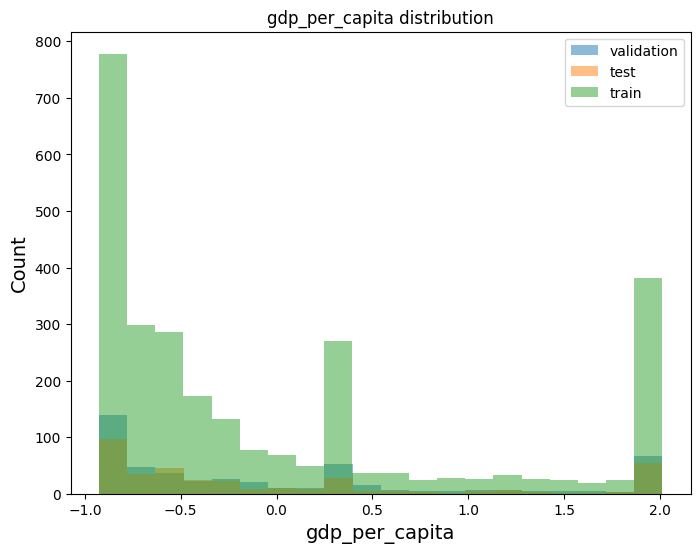

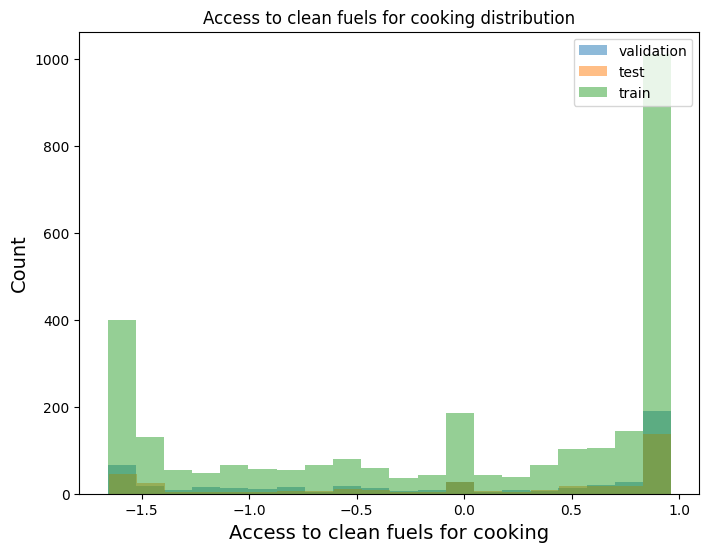

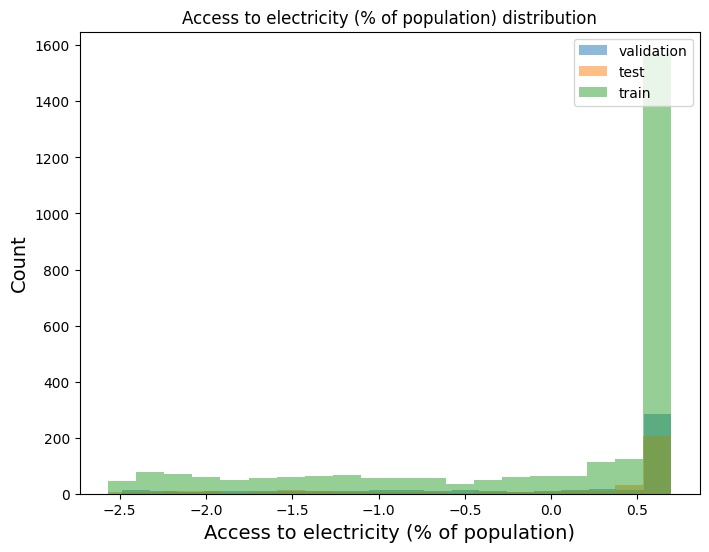

In [18]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
            'gdp_per_capita',
        'Access to clean fuels for cooking',
        'Access to electricity (% of population)',
    ]
]

X_val_plot = X_val[
    [
        'gdp_per_capita',
        'Access to clean fuels for cooking',
        'Access to electricity (% of population)',
    ]
]

X_train_plot = X_train[
    [
        'gdp_per_capita',
        'Access to clean fuels for cooking',
        'Access to electricity (% of population)',
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

### Linear Regression

## Making predictions

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Splitting the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_val_scaled = X_val.copy()

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Making predictions and evaluating the model on the training set
y_pred_train = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_train, r2_train))

# Making predictions and evaluating the model on the test set
y_pred_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_test, r2_test))

# Making predictions and evaluating the model on the validation set
y_pred_val = model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Validation Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_val, r2_val))

Coefficients: [21822.91286907  6314.04663861  -600.6271118 ]
Intercept: 25793.945040358554
Train Set - Mean Squared Error: 581044750.61, R^2 Score: 0.53
Test Set - Mean Squared Error: 379083793.77, R^2 Score: 0.57
Validation Set - Mean Squared Error: 541205097.64, R^2 Score: 0.56


## Distributions of Numeric Variables
Investigating the distributions of numeric variables in the dataset.

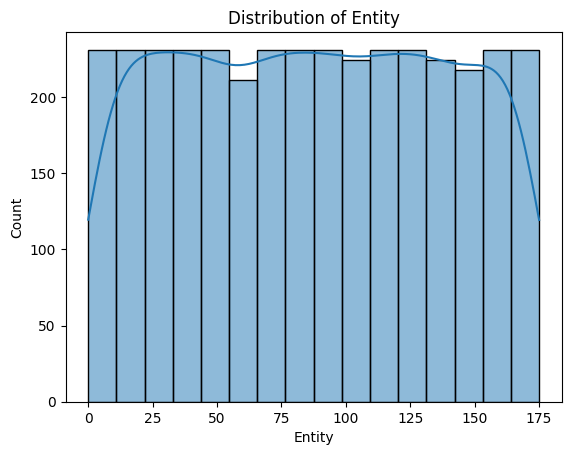

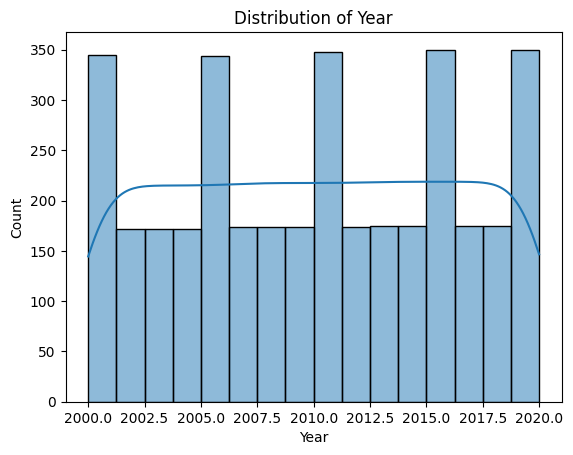

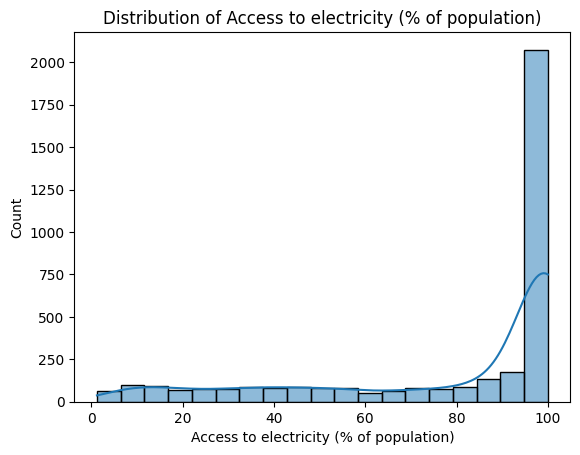

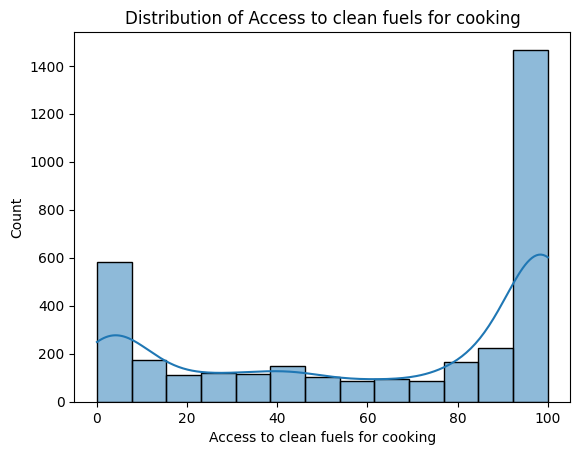

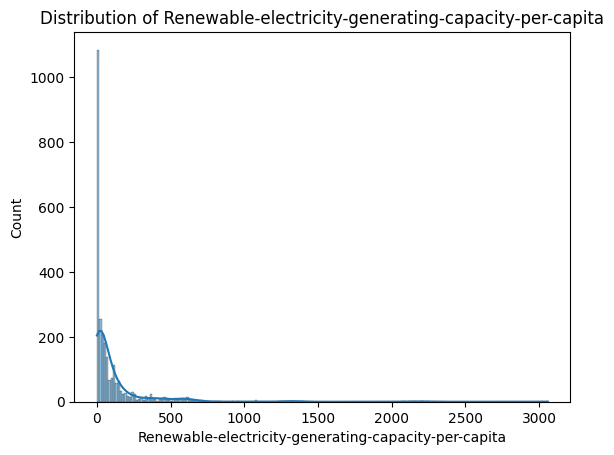

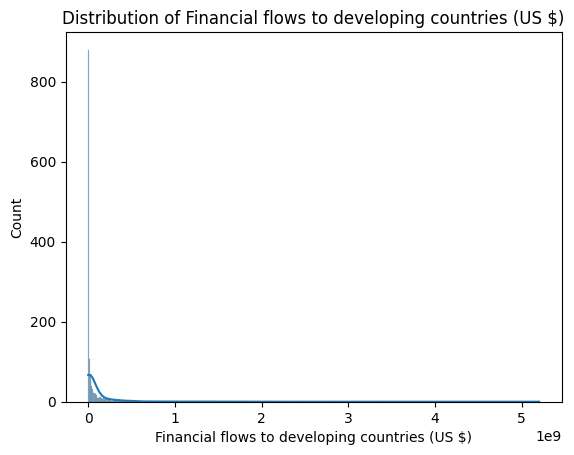

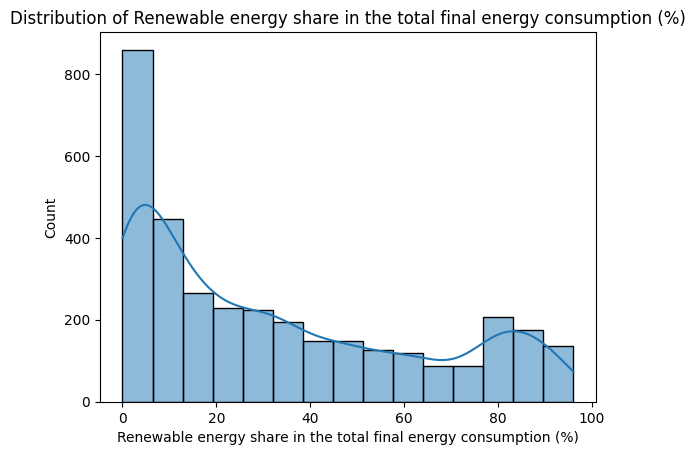

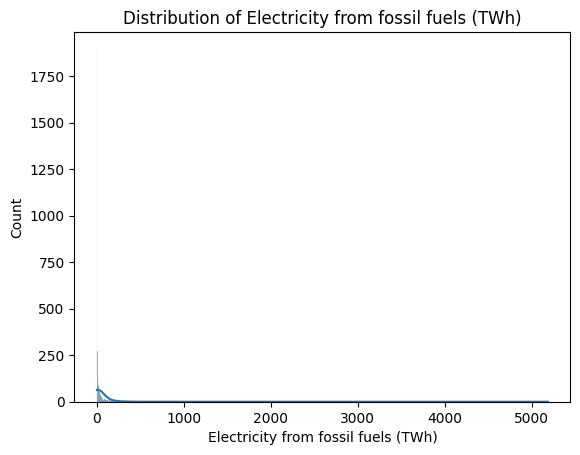

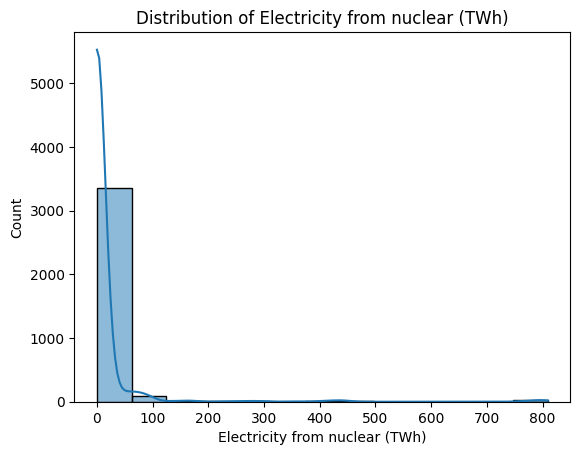

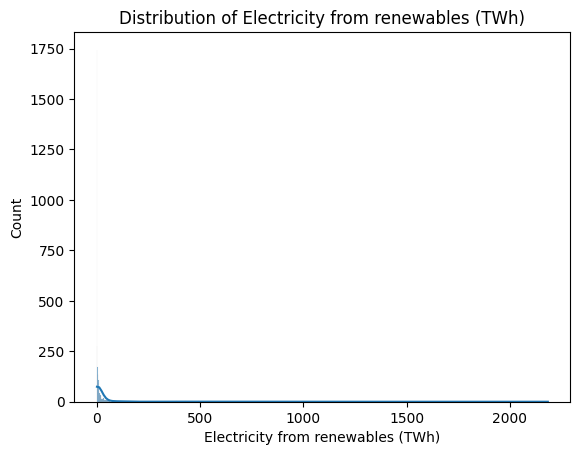

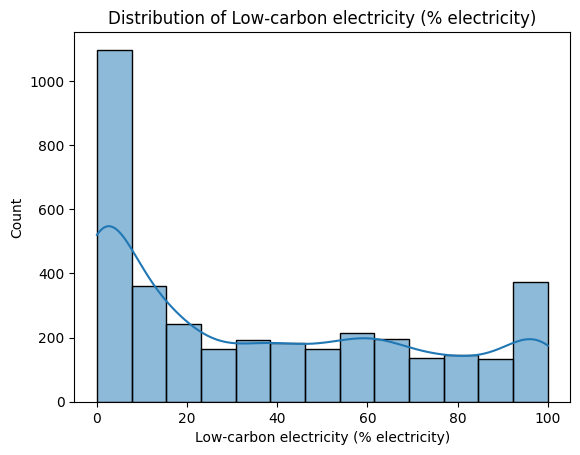

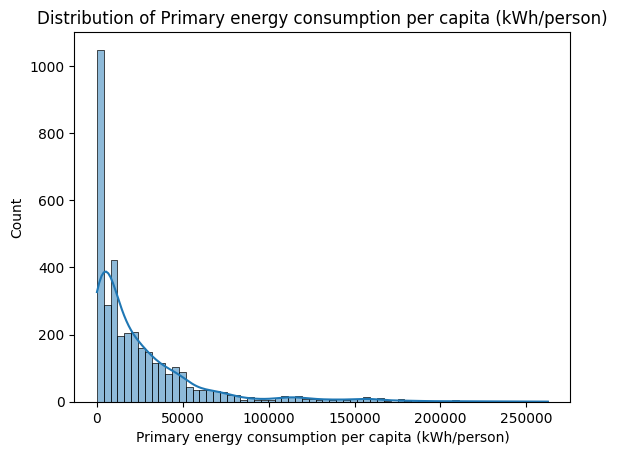

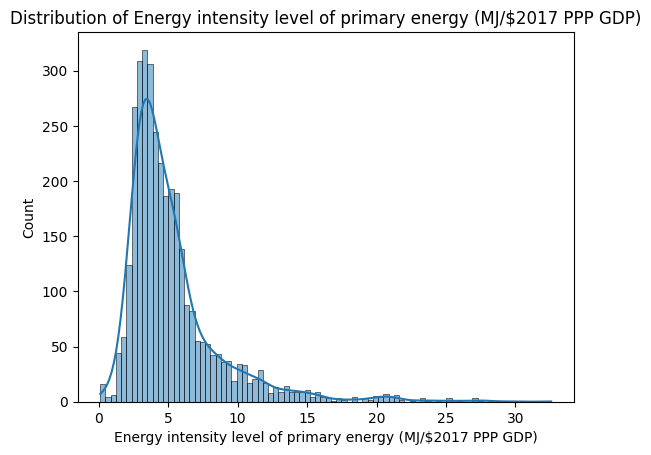

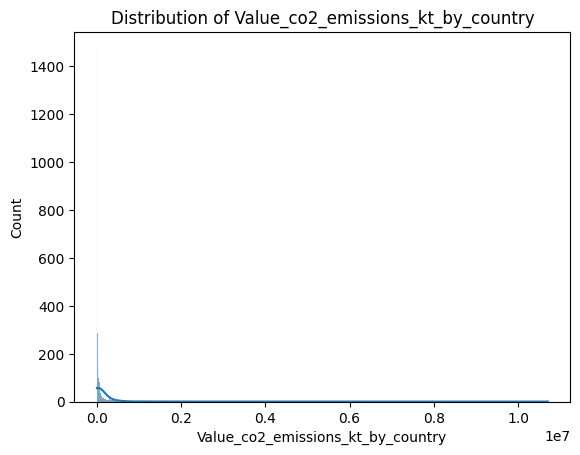

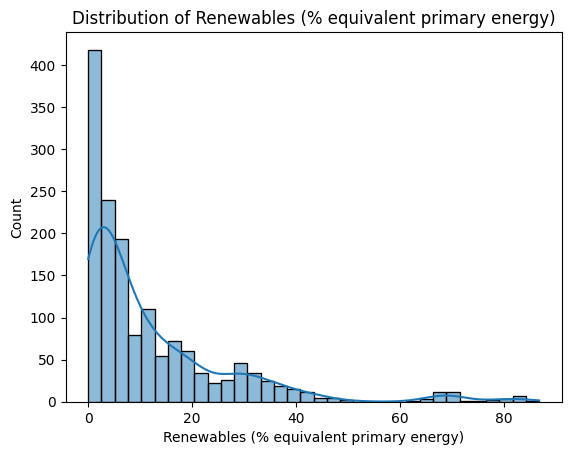

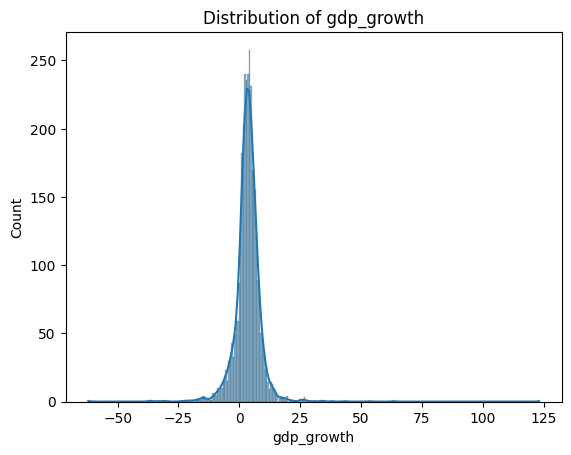

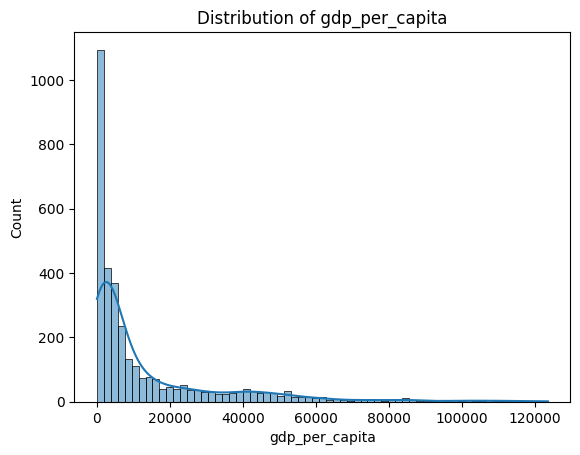

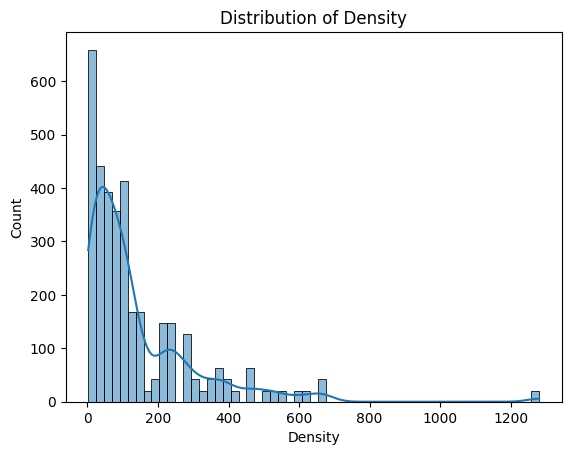

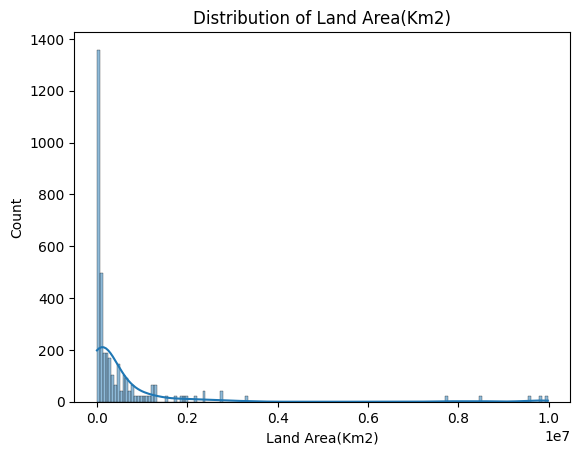

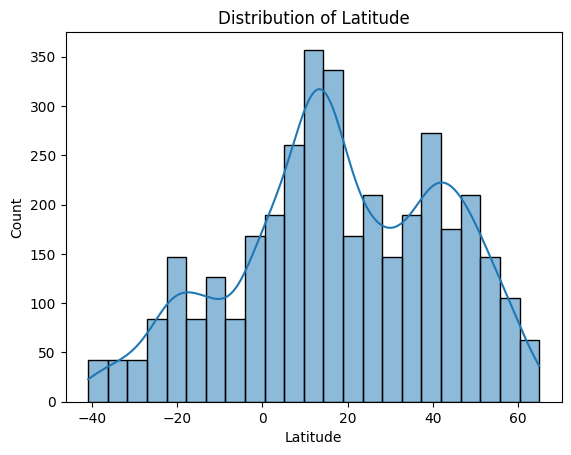

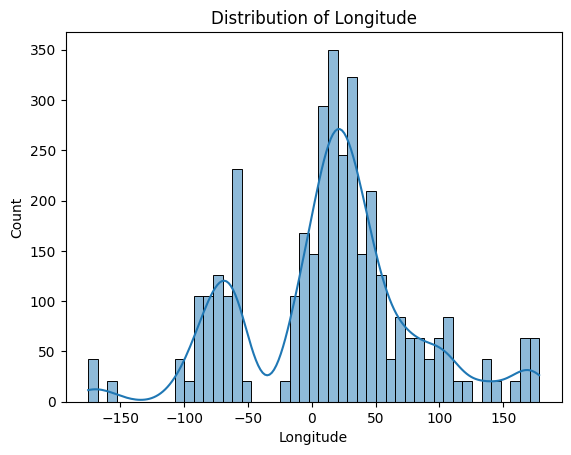

In [20]:
# Visualizing the distribution of numeric variables
for col in numeric_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Useful Independent Variables
This we did above using three feature selection methods and concluded that the following independent variables have higher correlation and found mode in three approaches.

#### 'gdp_per_capita', 'Access to clean fuels for cooking', 'Access to electricity (% of population)'

## Missing Data in Independent Variables
Identifying missing data in independent variables and quantifying the extent of missingness.


In [21]:
# Counting missing values in independent variables
missing_data_in_independent_vars = data[numeric_columns].isnull().sum()
print(missing_data_in_independent_vars)

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

This data was cleaned above using mean imputation method by first comparing the three imputation approaches and calculating its accuracy.

## Training and Test Sets Comparison
Comparing the training and test datasets to check if they are representative of each other.

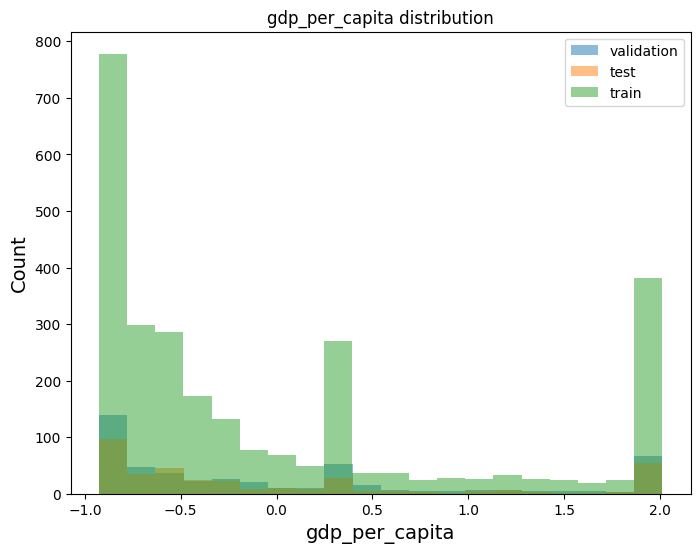

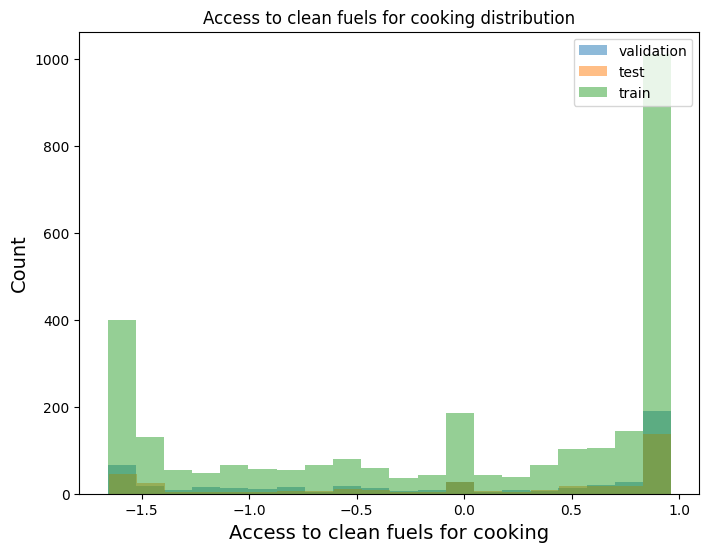

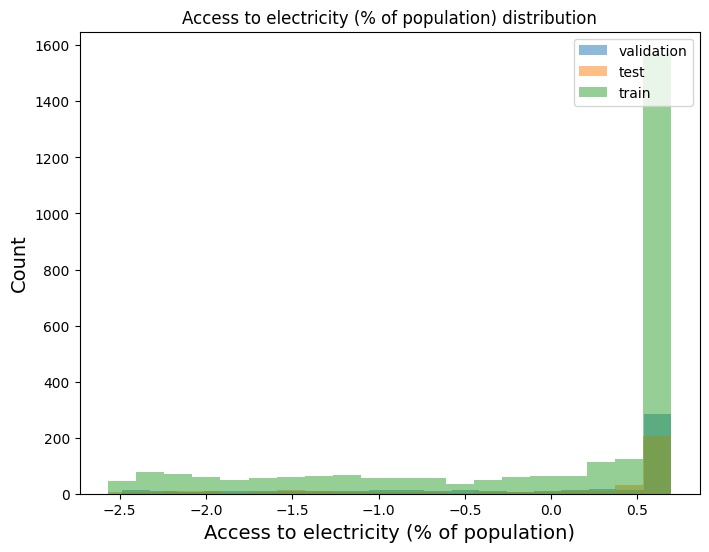

In [22]:
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

## Independence of Predictor Variables
Evaluating if predictor variables are independent of each other, checking for multicollinearity.

In [23]:
correlation_matrix

Entity      Year  \
Entity                                              1.000000  0.006182   
Year                                                0.006182  1.000000   
Access to electricity (% of population)            -0.016878  0.124581   
Access to clean fuels for cooking                  -0.010785  0.071555   
Renewable-electricity-generating-capacity-per-c... -0.080013  0.121672   
Financial flows to developing countries (US $)     -0.002160  0.071367   
Renewable energy share in the total final energ... -0.001960 -0.027241   
Electricity from fossil fuels (TWh)                 0.076927  0.045655   
Electricity from renewables (TWh)                   0.064212  0.093769   
Low-carbon electricity (% electricity)             -0.035989  0.029952   
Primary energy consumption per capita (kWh/person)  0.040049  0.006099   
Energy intensity level of primary energy (MJ/$2...  0.109635 -0.131369   
Value_co2_emissions_kt_by_country                   0.068513  0.090900   
Renewables (% equivalent primary energy)           -0.050449  0.084050   
gdp_growth                                          0.014381 -0.219091   
gdp_per_capita                                      0.000157  0.117741   
Density                                            -0.001979 -0.004088   
Land Area(Km2)                                     -0.013939 -0.001734   
Latitude                                           -0.067975  0.003505   
Longitude                                           0.125872  0.001077   

                                                    Access to electricity (% of population)  \
Entity                                                                            -0.016878   
Year                                                                               0.124581   
Access to electricity (% of population)                                            1.000000   
Access to clean fuels for cooking                                                  0.854515   
Renewable-electricity-generating-capacity-per-c...                                 0.456944   
Financial flows to developing countries (US $)                                     0.219952   
Renewable energy share in the total final energ...                                -0.766297   
Electricity from fossil fuels (TWh)                                                0.403316   
Electricity from renewables (TWh)                                                  0.328699   
Low-carbon electricity (% electricity)                                            -0.150473   
Primary energy consumption per capita (kWh/person)                                 0.569479   
Energy intensity level of primary energy (MJ/$2...                                -0.316153   
Value_co2_emissions_kt_by_country                                                  0.332509   
Renewables (% equivalent primary energy)                                          -0.206473   
gdp_growth                                                                        -0.149301   
gdp_per_capita                                                                     0.507182   
Density                                                                            0.115922   
Land Area(Km2)                                                                    -0.182147   
Latitude                                                                           0.420443   
Longitude                                                                         -0.108785   

                                                    Access to clean fuels for cooking  \
Entity                                                                      -0.010785   
Year                                                                         0.071555   
Access to electricity (% of population)                                      0.854515   
Access to clean fuels for cooking                                            1.000000   
Renewable-electricity-generating-capacity-per-c...        

<Axes: >

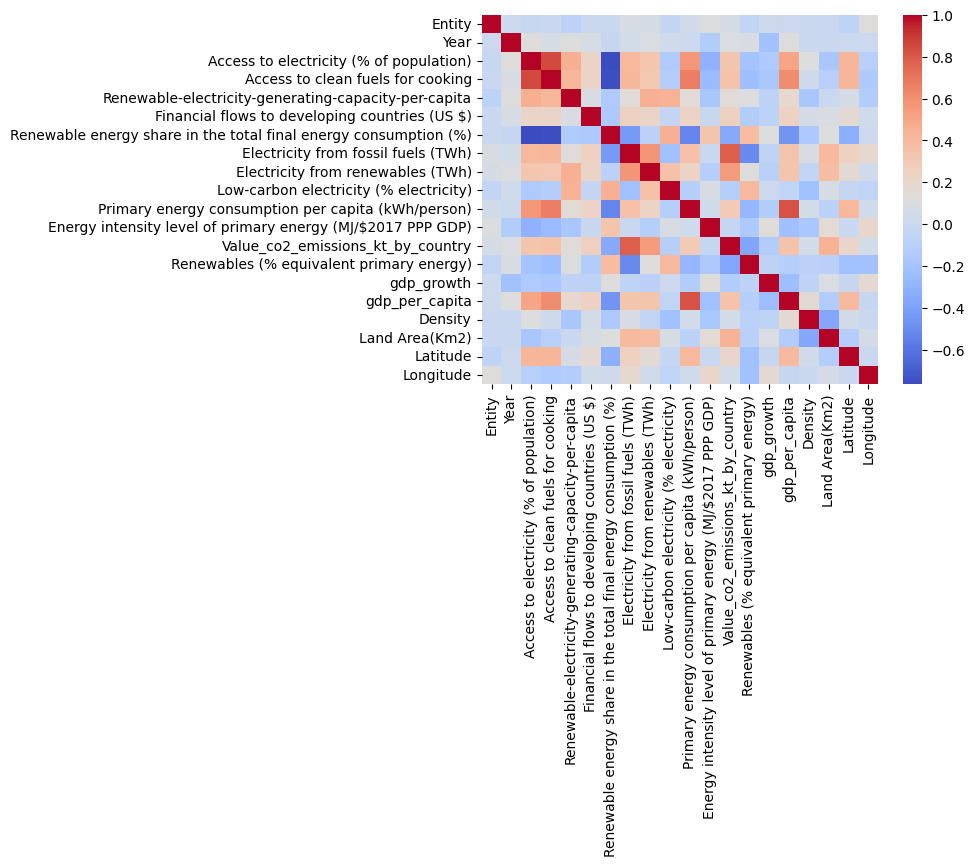

In [24]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

In summary, while some variables are quite independent, others like "Access to electricity (% of population)" and "Access to clean fuels for cooking" show high collinearity

## Ranges of Predictor Variables
Checking if the ranges of predictor variables are reasonable and within expected bounds.

In [25]:
# Evaluating the ranges of predictor variables
ranges = data[numeric_columns].agg(['min', 'max'])
ranges

Entity  Year  Access to electricity (% of population)  \
min       0  2000                                 1.252269   
max     175  2020                               100.000000   

     Access to clean fuels for cooking  \
min                                0.0   
max                              100.0   

     Renewable-electricity-generating-capacity-per-capita  \
min                                               0.00      
max                                            3060.19      

     Financial flows to developing countries (US $)  \
min                                    0.000000e+00   
max                                    5.202310e+09   

     Renewable energy share in the total final energy consumption (%)  \
min                                               0.00                  
max                                              96.04                  

     Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
min                                 0.00                            0.00   
max                              5184.13                          809.41   

     Electricity from renewables (TWh)  ...  \
min                               0.00  ...   
max                            2184.94  ...   

     Primary energy consumption per capita (kWh/person)  \
min                                                0.0    
max                                           262585.7    

     Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
min                                               0.11             
max                                              32.57             

     Value_co2_emissions_kt_by_country  \
min                              10.00   
max                        10707219.73   

     Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
min                                  0.000000  -62.075920      111.927225   
max                                 86.836586  123.139555   123514.196700   

     Density  Land Area(Km2)   Latitude   Longitude  
min      2.0            21.0 -40.900557 -175.198242  
max   1281.0       9984670.0  64.963051  178.065032  

[2 rows x 21 columns]

In [26]:
data.describe()

Entity         Year  Access to electricity (% of population)  \
count  3649.000000  3649.000000                              3639.000000   
mean     87.308304  2010.038367                                78.933702   
std      50.902368     6.054228                                30.275541   
min       0.000000  2000.000000                                 1.252269   
25%      43.000000  2005.000000                                59.800890   
50%      87.000000  2010.000000                                98.361570   
75%     131.000000  2015.000000                               100.000000   
max     175.000000  2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        2718.000000      
mean                                          113.137498      
std                                           244.167256      
min                                             0.000000      
25%                                             3.540000      
50%                                            32.910000      
75%                                           112.210000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    1.560000e+03   
mean                                     9.422400e+07   
std                                      2.981544e+08   
min                                      0.000000e+00   
25%                                      2.600000e+05   
50%                                      5.665000e+06   
75%                                      5.534750e+07   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3455.000000                  
mean                                           32.638165                  
std                                            29.894901                  
min                                             0.000000                  
25%                                             6.515000                  
50%                                            23.300000                  
75%                                            55.245000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3628.000000                     3523.000000   
mean                             70.365003                       13.450190   
std                             348.051866                       73.006623   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.970000                        0.000000   
75%                              26.837500                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  ...  \
count                        3628.000000  ...   
mean                           23.968010  ...   
std                           104.431085  ...   
min                             0.000000  ...   
25%                             0.040000  ...   
50%                             1.470000  ...   
75%                             9.600000  ...   
max                          2184.940000  ...   

       Primary energy consu

The average and ranges of predictors upon describing all coloumns makes sense, although we removed outliers and imputed mean in missing values to clean the data

## Distributions of Predictor Variables
Visualizing and understanding the distributions of predictor variables.

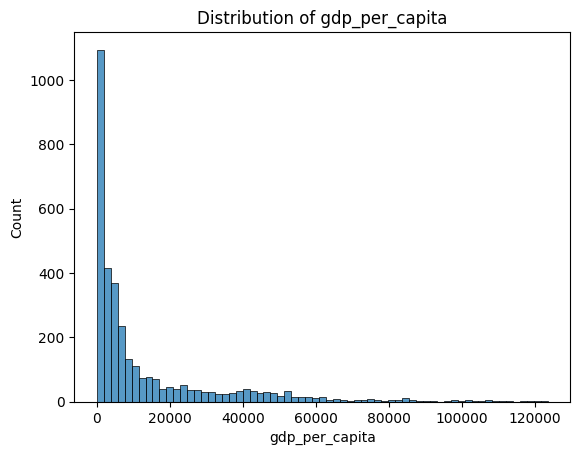

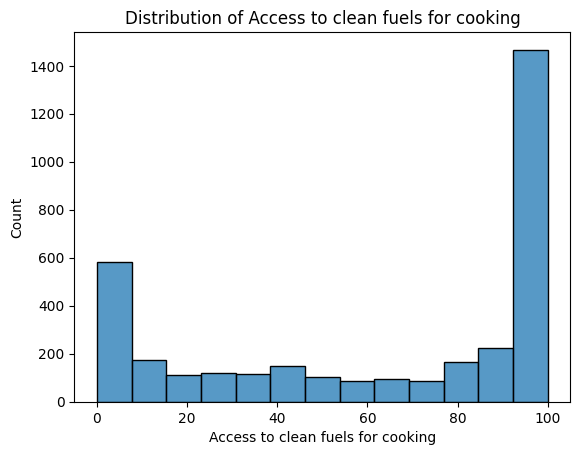

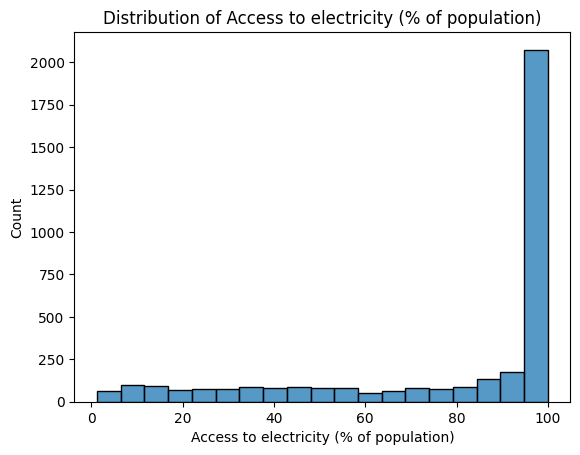

In [27]:
predictor_columns = data[["gdp_per_capita", "Access to clean fuels for cooking", "Access to electricity (% of population)"]]

for col in predictor_columns:
    sns.histplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.show()


As you can see the Access to electricity predictor is negatively skewed and Access to clean fuels is evenly distributed into bins within range and gdp_per_capita was positively skewed.

## Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Final Predicted Model was done using data having no outliers, for redudancy, let's do predictive model with data having outliers. df_mean_imputed was my dataframe before removing outliers. Let's do normalization and continue doing predictive analysis.

In [28]:
from sklearn.preprocessing import StandardScaler

selected_columns = ['Primary energy consumption per capita (kWh/person)', 'gdp_per_capita', 'Access to clean fuels for cooking', 'Access to electricity (% of population)']
selected_data = df_mean_imputed2[selected_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)
df_scaled = pd.DataFrame(scaled_data, columns=selected_columns)

In [29]:
df_scaled.describe()

Primary energy consumption per capita (kWh/person)  gdp_per_capita  \
count                                       3.649000e+03     3.649000e+03   
mean                                       -1.635670e-16     2.531394e-17   
std                                         1.000137e+00     1.000137e+00   
min                                        -7.404407e-01    -6.958135e-01   
25%                                        -6.507981e-01    -6.243403e-01   
50%                                        -3.630708e-01    -4.160224e-01   
75%                                         2.343733e-01     3.745192e-02   
max                                         6.811971e+00     5.823012e+00   

       Access to clean fuels for cooking  \
count                       3.649000e+03   
mean                        6.425846e-17   
std                         1.000137e+00   
min                        -1.659228e+00   
25%                        -9.798539e-01   
50%                         4.090596e-01   
75%                         9.638381e-01   
max                         9.638381e-01   

       Access to electricity (% of population)  
count                             3.649000e+03  
mean                             -6.231123e-17  
std                               1.000137e+00  
min                              -2.569691e+00  
25%                              -6.278791e-01  
50%                               6.394723e-01  
75%                               6.968702e-01  
max                               6.968702e-01

In [30]:
from sklearn.model_selection import train_test_split

X = df_scaled[
    [
            "gdp_per_capita",
            "Access to clean fuels for cooking",
            "Access to electricity (% of population)",
    ]
]

y = df_scaled["Primary energy consumption per capita (kWh/person)"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Making predictions and evaluating the model on the training set
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_train, r2_train))

# Making predictions and evaluating the model on the test set
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_test, r2_test))

# Making predictions and evaluating the model on the validation set
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Validation Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_val, r2_val))

Coefficients: [21822.91286907  6314.04663861  -600.6271118 ]
Intercept: 25793.945040358554
Train Set - Mean Squared Error: 1289469336.23, R^2 Score: -1311765199.78
Test Set - Mean Squared Error: 1350068222.10, R^2 Score: -1151948524.30
Validation Set - Mean Squared Error: 1291678832.66, R^2 Score: -1335943460.70


In [31]:
data.tail()

Entity  Year  Access to electricity (% of population)  \
3644     175  2016                                42.561730   
3645     175  2017                                44.178635   
3646     175  2018                                45.572647   
3647     175  2019                                46.781475   
3648     175  2020                                52.747670   

      Access to clean fuels for cooking  \
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3644                                 3.50                             0.0   
3645                                 3.05                             0.0   
3646                                 3.73                             0.0   
3647                                 3.66                             0.0   
3648                                 3.40                             0.0   

      Electricity from renewables (TWh)  ...  \
3644                               3.32  ...   
3645                               4.30  ...   
3646                               5.46  ...   
3647                               4.58  ...   
3648                               4.19  ...   

      Primary energy consumption per capita (kWh/person)  \
3644                                          3227.6802    
3645                                          3068.0115    
3646                                          3441.9858    
3647                                          3003.6553    
3648                                          2680.1318    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3644                                              10.00             
3645                                               9.51             
3646                                               9.83             
3647                                              10.47             
3648                                              10.00             

      Value_co2_emissions_kt_by_country  \
3644                        11020.00046   
3645                        10340.00015   
3646                        12380.00011   
3647                        11760.00023   
3648                                NaN   

      Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
3644                                       NaN    0.755869     1464.588957   
3645                                       NaN    4.709492     1235.189032   
3646                                       NaN    4.824211     1254.642265   
3647                                       NaN   -6.144236     1316.740657   
3648                                

### Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

#### Data Removal: We'll start with removal of 1%, 5%, and 10% of the data randomly from a DataFrame (data_capped_label) to simulate missing data scenarios.

In [32]:
def remove_random_data(df, percent):
    # Create a copy of the dataframe
    modified_df = data.copy()
    # Calculate the number of values to remove
    total_values = np.product(modified_df.shape)
    values_to_remove = int(total_values * percent / 100)
    # Randomly choose indices to replace with NaN
    for _ in range(values_to_remove):
        i = np.random.randint(modified_df.shape[0])
        j = np.random.randint(modified_df.shape[1])
        modified_df.iat[i, j] = np.nan
    return modified_df

# Example usage
df_1_percent_missing = remove_random_data(data_capped_label, 1)
df_5_percent_missing = remove_random_data(data_capped_label, 5)
df_10_percent_missing = remove_random_data(data_capped_label, 10)

<ipython-input-32-8a62fad36cb9>:15: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  df_1_percent_missing = remove_random_data(data_capped_label, 1)
<ipython-input-32-8a62fad36cb9>:16: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  df_5_percent_missing = remove_random_data(data_capped_label, 5)
<ipython-input-32-8a62fad36cb9>:17: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  df_10_percent_missing = remove_random_data(data_capped_label, 10)


#### We will now apply three imputation methods (Mean, KNN, Iterative) to these modified DataFrames, creating imputed datasets for each percentage of missing data.

In [33]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Function to perform all three imputations on a given DataFrame
def perform_imputations(df):
    # Mean Imputation
    mean_imputer = SimpleImputer(strategy='mean')
    df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df), columns=df.columns)

    # KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

    # Iterative Imputer
    iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
    df_iterative_imputed = pd.DataFrame(iterative_imputer.fit_transform(df), columns=df.columns)

    return df_mean_imputed, df_knn_imputed, df_iterative_imputed

# Apply imputations to each DataFrame
df_1_mean, df_1_knn, df_1_iterative = perform_imputations(df_1_percent_missing)
df_5_mean, df_5_knn, df_5_iterative = perform_imputations(df_5_percent_missing)
df_10_mean, df_10_knn, df_10_iterative = perform_imputations(df_10_percent_missing)

#### Finally, we will now evaluate the imputed data by calculating percentage error, bias, and variance of the error, to understand how well each imputation method recovered the missing values.

In [34]:
import numpy as np
def evaluate_imputation(original_df, imputed_df):
    # Focus on common columns in both DataFrames
    common_columns = original_df.columns.intersection(imputed_df.columns)
    original_df_common = original_df[common_columns]
    imputed_df_common = imputed_df[common_columns]

    # Mask to identify originally NaN values in the common columns
    mask = original_df_common.isna()

    # Calculate residuals only where the original data was not NaN
    residuals = np.where(~mask, original_df_common - imputed_df_common, np.nan)

    # Percentage Error on Residuals
    percent_error = np.nanmean(np.abs(residuals / original_df_common)) * 100

    # Bias and Variance of the Error
    bias = np.nanmean(residuals)
    variance = np.nanvar(residuals)

    return percent_error, bias, variance

# Evaluate each imputed DataFrame
# For the 1% missing data DataFrames
percent_error_1_mean, bias_1_mean, variance_1_mean = evaluate_imputation(data_capped_label, df_1_mean)
percent_error_1_knn, bias_1_knn, variance_1_knn = evaluate_imputation(data_capped_label, df_1_knn)
percent_error_1_iterative, bias_1_iterative, variance_1_iterative = evaluate_imputation(data_capped_label, df_1_iterative)

# Evaluating for 5% missing data DataFrames
percent_error_5_mean, bias_5_mean, variance_5_mean = evaluate_imputation(data_capped_label, df_5_mean)
percent_error_5_knn, bias_5_knn, variance_5_knn = evaluate_imputation(data_capped_label, df_5_knn)
percent_error_5_iterative, bias_5_iterative, variance_5_iterative = evaluate_imputation(data_capped_label, df_5_iterative)

# Evaluating for 10% missing data DataFrames
percent_error_10_mean, bias_10_mean, variance_10_mean = evaluate_imputation(data_capped_label, df_10_mean)
percent_error_10_knn, bias_10_knn, variance_10_knn = evaluate_imputation(data_capped_label, df_10_knn)
percent_error_10_iterative, bias_10_iterative, variance_10_iterative = evaluate_imputation(data_capped_label, df_10_iterative)

(percent_error_1_mean, bias_1_mean, variance_1_mean), (percent_error_1_knn, bias_1_knn, variance_1_knn), (percent_error_1_iterative, bias_1_iterative, variance_1_iterative)
(percent_error_5_mean, bias_5_mean, variance_5_mean), (percent_error_5_knn, bias_5_knn, variance_5_knn), (percent_error_5_iterative, bias_5_iterative, variance_5_iterative)
(percent_error_10_mean, bias_10_mean, variance_10_mean), (percent_error_10_knn, bias_10_knn, variance_10_knn), (percent_error_10_iterative, bias_10_iterative, variance_10_iterative)


((inf, -4843112.308600941, 2193498391581860.2),
 (inf, -3742848.001281363, 2186069393426458.0),
 (inf, -4707716.257114417, 2206045343486196.5))

The results showed infinite percentage errors, large negative biases, and extremely high variances, indicating significant underestimation of missing values by the imputation methods and may possibly due to the presence of zeros or outliers, and the diverse nature of the data.

References
scikit-learn : https://scikit-learn.org/0.21/documentation.html
SciPy : https://docs.scipy.org/doc/scipy/

## Data Preprocessing
In this step, we perform initial data preprocessing tasks such as handling missing values, type conversion, and feature selection, Outlier Handling and Normalization to prepare the data for analysis and modeling. As we iteratively  gone through various techniques in previous steps, now we choose Mean Imp, IQR and Standard Scaling as primary steps to Data Preprocessing

In [35]:
data.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
data['Density'] = pd.to_numeric(data['Density'], errors='coerce')
data = data.drop("Electricity from nuclear (TWh)", axis=1)
data.reset_index(drop=True, inplace=True)
label_encoder = LabelEncoder()
data['Entity'] = label_encoder.fit_transform(data['Entity'])


# Mean Imputation
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
data_numeric = data[numeric_columns]
mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = mean_imputer.fit_transform(data_numeric)
df_mean_imputed = pd.DataFrame(X_mean_imputed, columns=numeric_columns)

#IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df

data_capped_label = df_mean_imputed.copy()

numerical_columns = df_mean_imputed.select_dtypes(include='number').columns
for column in numerical_columns:
    data_capped_label = cap_outliers_iqr(data_capped_label, column)

from sklearn.preprocessing import StandardScaler

columns_to_normalize = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)'
]

# Create the StandardScaler object
scaler = StandardScaler()
data_capped_label[columns_to_normalize] = scaler.fit_transform(data_capped_label[columns_to_normalize])


data_capped_label.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equivalent primary energy)                            0
gdp_growth          

### Feature Selection using Random Forest Regressor
In this step, we perform feature selection to prepare the data for analysis and modeling.

In [36]:
from sklearn.ensemble import RandomForestRegressor

X = data_capped_label.drop('Primary energy consumption per capita (kWh/person)', axis=1)
y = data_capped_label['Primary energy consumption per capita (kWh/person)']


rf_model = RandomForestRegressor()
rf_model.fit(X, y)


feature_importances = rf_model.feature_importances_
selected_features_rf = X.columns[feature_importances.argsort()[::-1]][:5]  # Replace 5 with the number of features you want

print("Selected Features:", selected_features_rf)

Selected Features: Index(['gdp_per_capita', 'Access to clean fuels for cooking',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Entity',
       'Land Area(Km2)'],
      dtype='object')


### Correlation Analysis
This section is dedicated to analyzing the correlations between different features in the dataset. A heatmap is used to visualize the strength and direction of relationships between variables, aiding in feature selection for modeling.

<Axes: >

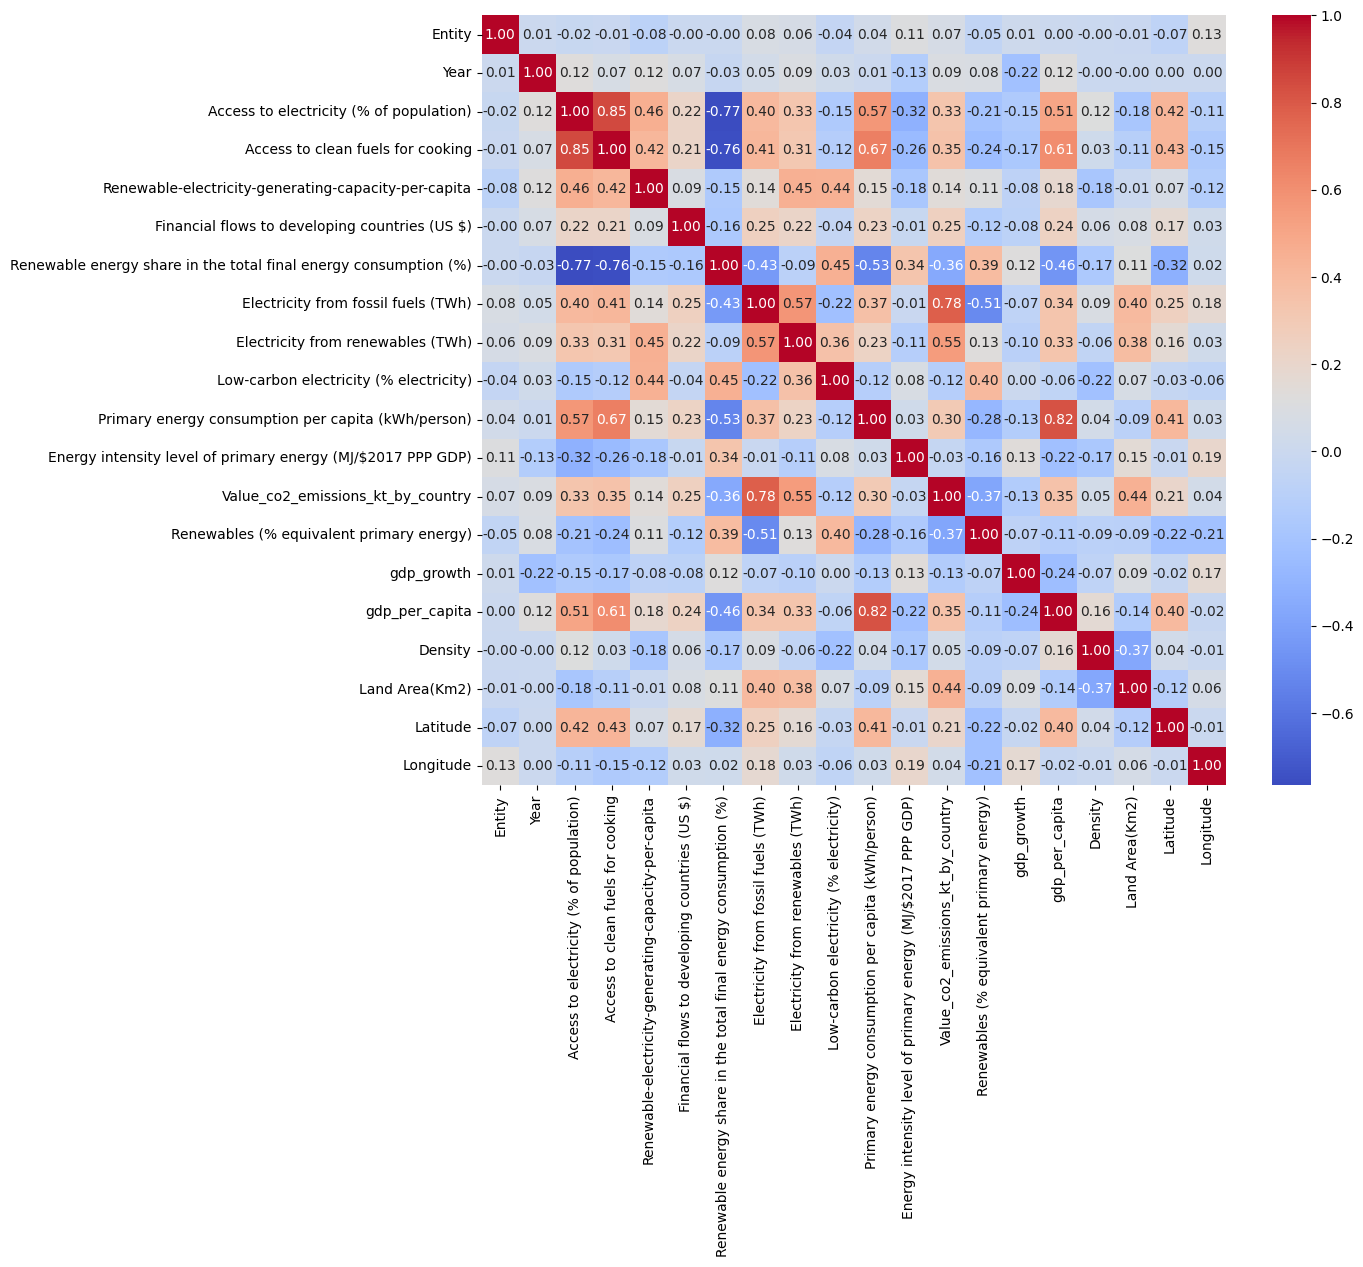

In [37]:
plt.figure(figsize=(12, 10))
correlation_matrix = data_capped_label.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

We have conducted a comprehensive data analysis to understand the factors influencing 'Primary energy consumption per capita (kWh/person)'. Our analysis includes a correlation matrix visualization and feature selection using a Random Forest Regressor.

### Correlation Matrix Insights:

The heatmap provides a visual representation of the correlations between variables. Key observations include:

- **Strong Positive Correlations:**
  - `gdp_per_capita` shows a strong positive correlation with our target variable, indicating that as GDP per capita increases, so does energy consumption per capita.
  - `Access to electricity (% of population)` is positively correlated, suggesting that higher access to electricity is associated with increased energy consumption.

- **Strong Negative Correlations:**
  - `Renewable-electricity-generating-capacity-per-capita` and `Renewables (% equivalent primary energy)` have negative correlations, hinting that higher renewable capacity might be associated with lower primary energy consumption per capita, possibly due to efficiency and sustainability factors.

- **Moderate Correlations:**
  - Variables such as `Energy intensity level of primary energy (MJ/$2017 PPP GDP)` and `Access to clean fuels for cooking` exhibit moderate positive correlations with the target variable.

### Random Forest Regressor Feature Selection:

The Random Forest model has identified the following features as significant in predicting our target variable:

- `gdp_per_capita`
- `Access to clean fuels for cooking`
- `Energy intensity level of primary energy (MJ/$2017 PPP GDP)`
- `Entity`
- `Land Area(Km2)`

These features were selected based on their importance scores, which measure their contribution to the model's predictive power.

### Combined Analysis:

Considering both the correlation matrix and the feature selection output, `gdp_per_capita` and `Energy intensity level of primary energy (MJ/$2017 PPP GDP)` stand out as significant predictors. So the final predictors from both analysis would be as following

- `gdp_per_capita`
- `Access to clean fuels for cooking`
- `Energy intensity level of primary energy (MJ/$2017 PPP GDP)`
- `Access to electricity (% of population)`
- `Electricity from fossil fuels (TWh)`
- `Electricity from renewables (TWh)`
- `Value_co2_emissions_kt_by_country`
- `Financial flows to developing countries (US $)`
- `Renewable energy share in the total final energy consumption (%)`
- `Renewables (% equivalent primary energy)`

### Model Training and Evaluation
Here, we split the data into training and testing sets, train a Random Forest Regressor model on the training set, and evaluate its performance on the test set using metrics such as RMSE, MAE, R-squared, and Explained Variance.


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Splitting data into Training 70%, Test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Random Forest regression
random_forest = RandomForestRegressor(n_estimators=100, random_state=1, max_depth=17)
random_forest.fit(X_train, y_train)

# Predictions
y_pred = random_forest.predict(X_test)

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)
r_squared_rf = r2_score(y_test, y_pred)
explained_var_rf = explained_variance_score(y_test, y_pred)

# Display the metrics
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R-squared: {r_squared_rf}")
print(f"Explained Variance: {explained_var_rf}")


RMSE: 0.18802729847669433
MAE: 0.08544337183252979
R-squared: 0.9639684859559752
Explained Variance: 0.9639742084289431


### Linear Regression with OLS (Ordinary Least Squares):

Performing linear regression using OLS. This can help answer questions about the significance of relationships, model assumptions, and which independent variables are significant.

In [39]:
import statsmodels.api as sm

Z = data_capped_label.drop('Primary energy consumption per capita (kWh/person)', axis=1)  # Features
target_variable = data_capped_label['Primary energy consumption per capita (kWh/person)']  # Your preferred target variable name

Z = sm.add_constant(X)
model = sm.OLS(target_variable, Z).fit()
print(model.summary())

                                            OLS Regression Results                                            
Dep. Variable:     Primary energy consumption per capita (kWh/person)   R-squared:                       0.824
Model:                                                            OLS   Adj. R-squared:                  0.823
Method:                                                 Least Squares   F-statistic:                     892.3
Date:                                                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                                                        01:40:57   Log-Likelihood:                -2011.3
No. Observations:                                                3649   AIC:                             4063.
Df Residuals:                                                    3629   BIC:                             4187.
Df Model:                                                          19                                         
C

### Variance Inflation Factor (VIF) Calculation:

We now calculate the VIF for each feature, addressing questions about multicollinearity and the independence of predictor variables.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_predictors = ['gdp_per_capita', 'Access to clean fuels for cooking',
                       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                       'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)',
                       'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country',
                       'Financial flows to developing countries (US $)',
                       'Renewable energy share in the total final energy consumption (%)',
                       'Renewables (% equivalent primary energy)']

X_selected = X[selected_predictors]

vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
print(vif_data)

                                            Variable       VIF
0                                     gdp_per_capita  1.727024
1                  Access to clean fuels for cooking  4.860102
2  Energy intensity level of primary energy (MJ/$...  1.297835
3            Access to electricity (% of population)  4.649362
4                Electricity from fossil fuels (TWh)  4.394802
5                  Electricity from renewables (TWh)  2.944577
6                  Value_co2_emissions_kt_by_country  2.810134
7     Financial flows to developing countries (US $)  1.119069
8  Renewable energy share in the total final ener...  3.917419
9           Renewables (% equivalent primary energy)  2.216217


There are variables with High VIF (near to 5). Lets use regularization techniques to try ot reduce and observe its impact.

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
selected_predictors = ['gdp_per_capita', 'Access to clean fuels for cooking',
                       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                       'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)',
                       'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country',
                       'Financial flows to developing countries (US $)',
                       'Renewable energy share in the total final energy consumption (%)',
                       'Renewables (% equivalent primary energy)']
X_selected = X[selected_predictors]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred2 = ridge_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f'Ridge Regression RMSE: {rmse}')


Ridge Regression RMSE: 0.4632316718848044


### P-Value Calculation

Using the t-statistic, you calculate the p-value, which indicates the probability of observing the given data (or more extreme) under the null hypothesis. The p-value is derived from the t-distribution, considering the degrees of freedom determined by sample size and the number of predictors in the model.

- **Low p-value (≤ 0.05):** Strong evidence against the null hypothesis, suggesting a significant relationship between the predictor and the outcome.
- **High p-value (> 0.05):** Weak evidence against the null hypothesis, indicating that the coefficient might not be significantly different from 0.

This approach helps in determining the statistical significance of each coefficient in a regression model, guiding decisions on the relevance of predictor variables.


In [42]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

                                            OLS Regression Results                                            
Dep. Variable:     Primary energy consumption per capita (kWh/person)   R-squared:                       0.824
Model:                                                            OLS   Adj. R-squared:                  0.823
Method:                                                 Least Squares   F-statistic:                     892.3
Date:                                                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                                                        01:40:57   Log-Likelihood:                -2011.3
No. Observations:                                                3649   AIC:                             4063.
Df Residuals:                                                    3629   BIC:                             4187.
Df Model:                                                          19                                         
C

### **P Values of all numerical columns in th dataset:**

- `Entity`: **0.034**
- `Year`: 0.000
- `Access to electricity (% of population)`: 0.000
- `Access to clean fuels for cooking`: 0.000
- `Renewable-electricity-generating-capacity-per-capita`: 0.000
- **`Financial flows to developing countries (US $)`: **0.263****
- `Renewable energy share in the total final energy consumption (%)`: 0.000
- `Electricity from fossil fuels (TWh)`: 0.000
- `Electricity from renewables (TWh)`: 0.000
- `Low-carbon electricity (% electricity)`: 0.000
- `Energy intensity level of primary energy (MJ/$2017 PPP GDP)`: 0.000
- `Value_co2_emissions_kt_by_country`: 0.000
- `Renewables (% equivalent primary energy)`: 0.000
- `gdp_growth`: 0.001
- `gdp_per_capita`: 0.000
- `Density`: 0.000
- `Land Area(Km2)`: 0.000
- `Latitude`: 0.000
- `Longitude`: **0.237**

#### Key Findings:
- **Statistically Significant Predictors:**
  - **Access to electricity (% of population):** Coefficient of 0.2056, p < 0.001, suggesting a strong positive relationship.
  - **Year:** Coefficient of -0.0089, p < 0.001, indicating a slight negative trend over time.
  - **Energy intensity level of primary energy (MJ/$2017 PPP GDP):** Coefficient of 0.2509, p < 0.001, showing a significant positive impact.
  - **GDP per capita:** Coefficient of 0.7591, p < 0.001, one of the most significant positive predictors.

- **Insignificant Predictors:**
  - **Financial flows to developing countries (US $):** Coefficient of 0.0083 with p = 0.263, not statistically significant.
  - **Longitude:** Coefficient of 0.0002 with p = 0.237, indicating no significant effect.

#### Model Diagnostics:
- The **F-statistic** of 892.3 with a p-value < 0.001 strongly rejects the null hypothesis that none of the predictors are useful in explaining the variability in the dependent variable.
- **Durbin-Watson** statistic of 0.219 suggests potential autocorrelation in the residuals, which may need further investigation.
- The **Condition Number** of 7.08e+05 indicates possible issues with multicollinearity, which could affect the reliability of the coefficient estimates.

#### Interpretation:
The model highlights several key drivers behind 'Primary energy consumption per capita,' including access to electricity, energy intensity, and GDP per capita, among others. The presence of statistically insignificant predictors and potential multicollinearity suggests a need for further model refinement, possibly including dimensionality reduction or regularization techniques.

In [43]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.5 MB/s eta 0:00:00


In [44]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsedwh4av
  JVM stdout: /tmp/tmpsedwh4av/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsedwh4av/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_dwjm1v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [45]:
columns_imp = ['gdp_per_capita', 'Access to clean fuels for cooking',
                   'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                   'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)',
                   'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country',
                   'Financial flows to developing countries (US $)',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Renewables (% equivalent primary energy)',
                   'Primary energy consumption per capita (kWh/person)']

# Keep only the specified columns
filtered_df = data_capped_label[columns_imp]

In [46]:
data = h2o.H2OFrame(filtered_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [47]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])
train["is_train"] = 1
test["is_train"] = 0
drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()
drift_data["is_train"].table()

is_train    Count
----------  -------
         0      903
         1     2746
[2 rows x 2 columns]

In [48]:
x = list(set(train.col_names) - set(["Primary energy consumption per capita (kWh/person)"]))
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Primary energy consumption per capita (kWh/person)", training_frame=train)

AutoML progress: |
01:41:41.521: _train param, Dropping bad and constant columns: [is_train]

██
01:42:11.131: _train param, Dropping bad and constant columns: [is_train]


01:42:13.592: _train param, Dropping bad and constant columns: [is_train]

███
01:42:46.48: _train param, Dropping bad and constant columns: [is_train]

█
01:42:58.204: _train param, Dropping bad and constant columns: [is_train]

██
01:43:13.645: _train param, Dropping bad and constant columns: [is_train]


01:43:22.358: _train param, Dropping bad and constant columns: [is_train]

█
01:43:30.94: _train param, Dropping bad and constant columns: [is_train]

██
01:43:37.37: _train param, Dropping bad and constant columns: [is_train]

█
01:43:45.371: _train param, Dropping bad and constant columns: [is_train]

██
01:43:58.58: _train param, Dropping unused columns: [is_train]


01:43:59.828: _train param, Dropping unused columns: [is_train]

█████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240403_14141


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0022672853701997953
RMSE: 0.04761602010038003
MAE: 0.025016155533003678
RMSLE: 0.07574318687999858
Mean Residual Deviance: 0.0022672853701997953
R^2: 0.9977392430431601
Null degrees of freedom: 2745
Residual degrees of freedom: 2737
Null deviance: 2753.9296551678867
Residual deviance: 6.225965626568638
AIC: -8908.055984500157

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.019425526216020412
RMSE: 0.1393754864243365
MAE: 0.06987785094869395
RMSLE: 0.15607394498820581
Mean Residual Deviance: 0.019425526216020412
R^2: 0.9806304075744666
Null degrees of freedom: 2745
Residual degrees of freedom: 2737
Null deviance: 2755.8244944623466
Residual deviance: 53.342494989192055
AIC: -3009.6349635017555

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -593.537   83.781      -532.399      -522.755      -729.632      -611.428      -571.469
loglikelihood           0          0           0             0             0             0             0
mae                     0.0696074  0.00566246  0.069174      0.0793404     0.0672407     0.0675012     0.0647807
mean_residual_deviance  0.0193017  0.00332425  0.0215627     0.023335      0.0147594     0.0189981     0.0178533
mse                     0.0193017  0.00332425  0.0215627     0.023335      0.0147594     0.0189981     0.0178533
null_deviance           551.165    50.9915     583.167       620.971       504.132       543.667       503.888
r2                      0.980805   0.00245407  0.979522      0.977777      0.984064      0.980306      0.982355
residual_deviance       10.654     2.30796     11.9242       13.7676       8.02909       10.6579       8.89095
rmse                    0.138508   0.0121098   0.146842      0.152758      0.121488      0.137834      0.133616
rmsle                   0.155473   0.0113888   0.154422      0.17344       0.144379      0.157801      0.147324

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [49]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id                                                      mae      rmse        mse       rmsle    mean_residual_deviance
------------------------------------------------------  ---------  --------  ---------  ----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20240403_14141     0.0698779  0.139375  0.0194255    0.156074                 0.0194255
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_14141  0.0707094  0.141676  0.0200721    0.161864                 0.0200721
GBM_4_AutoML_1_20240403_14141                           0.0745701  0.147992  0.0219016    0.169724                 0.0219016
GBM_3_AutoML_1_20240403_14141                           0.0766208  0.147491  0.0217535    0.166917                 0.0217535
XRT_1_AutoML_1_20240403_14141                           0.0769748  0.152939  0.0233903    0.172622                 0.0233903
DRF_1_AutoML_1_20240403_14141                           0.0770399  0.150229  0.0225689    0.176433                 0.0225689
GBM_2_AutoML_1_20240403_14141                           0.077863   0.149459  0.022338     0.176738                 0.022338
XGBoost_1_AutoML_1_20240403_14141                       0.087442   0.158549  0.0251377  nan                        0.0251377
XGBoost_2_AutoML_1_20240403_14141                       0.088351   0.164087  0.0269244  nan                        0.0269244
XGBoost_3_AutoML_1_20240403_14141                       0.0890198  0.159662  0.025492   nan                        0.025492
[10 rows x 6 columns]

In [50]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.03407426533412202
RMSE: 0.1845921594600432
MAE: 0.0788040095212269
RMSLE: 0.20799292825200413
Mean Residual Deviance: 0.03407426533412202
R^2: 0.9656140307621026
Null degrees of freedom: 902
Residual degrees of freedom: 894
Null deviance: 895.1546662191137
Residual deviance: 30.769061596712188
AIC: -468.8262233212964

Variable importance for GBM_4_AutoML_1_20240403_14141:


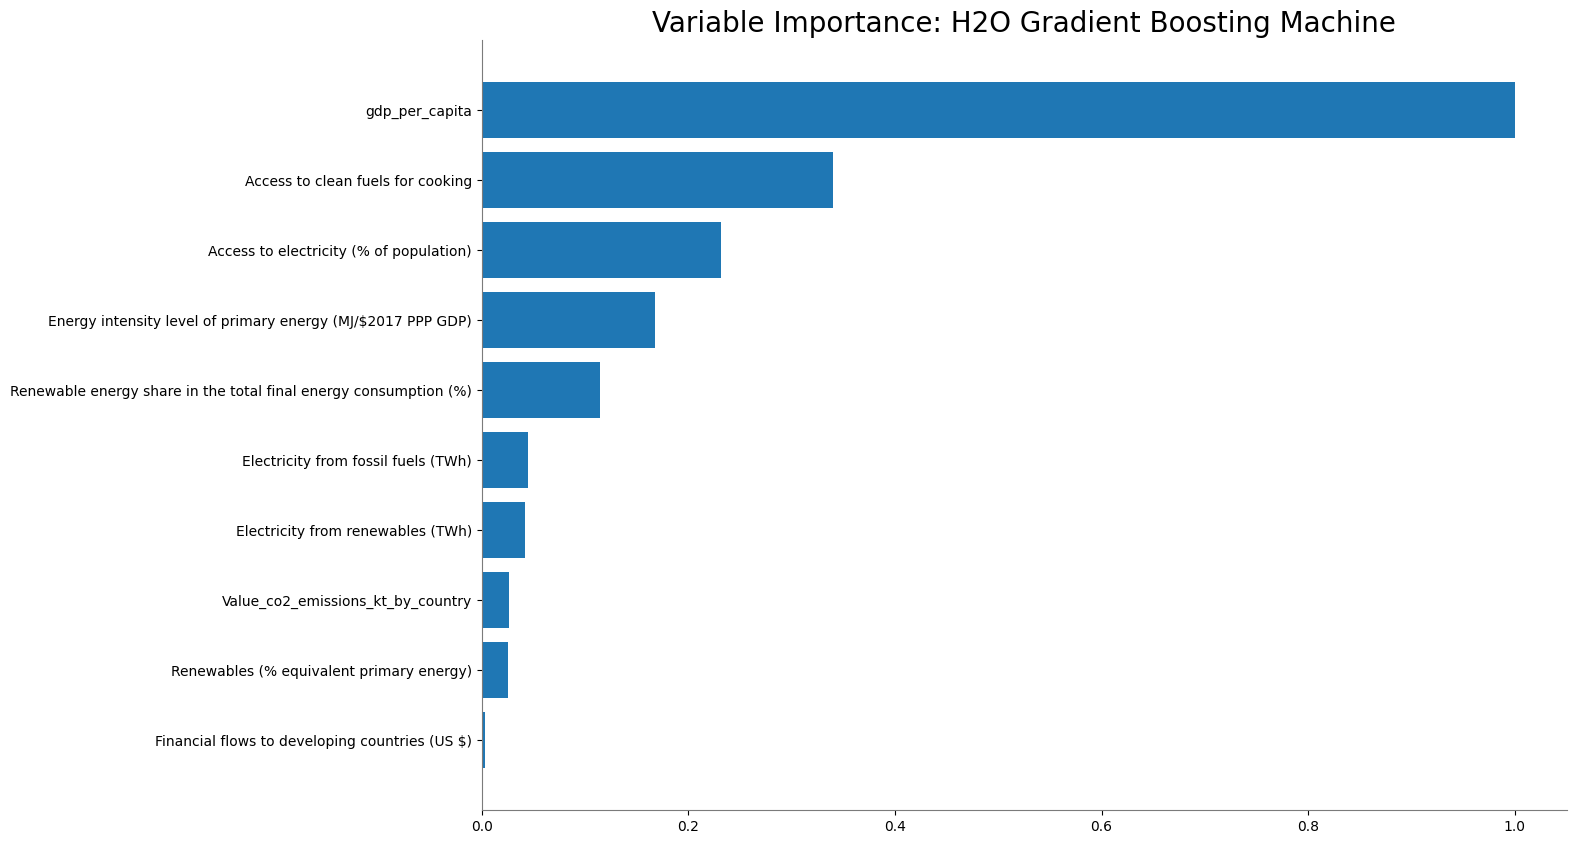

Variable importance for GBM_3_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

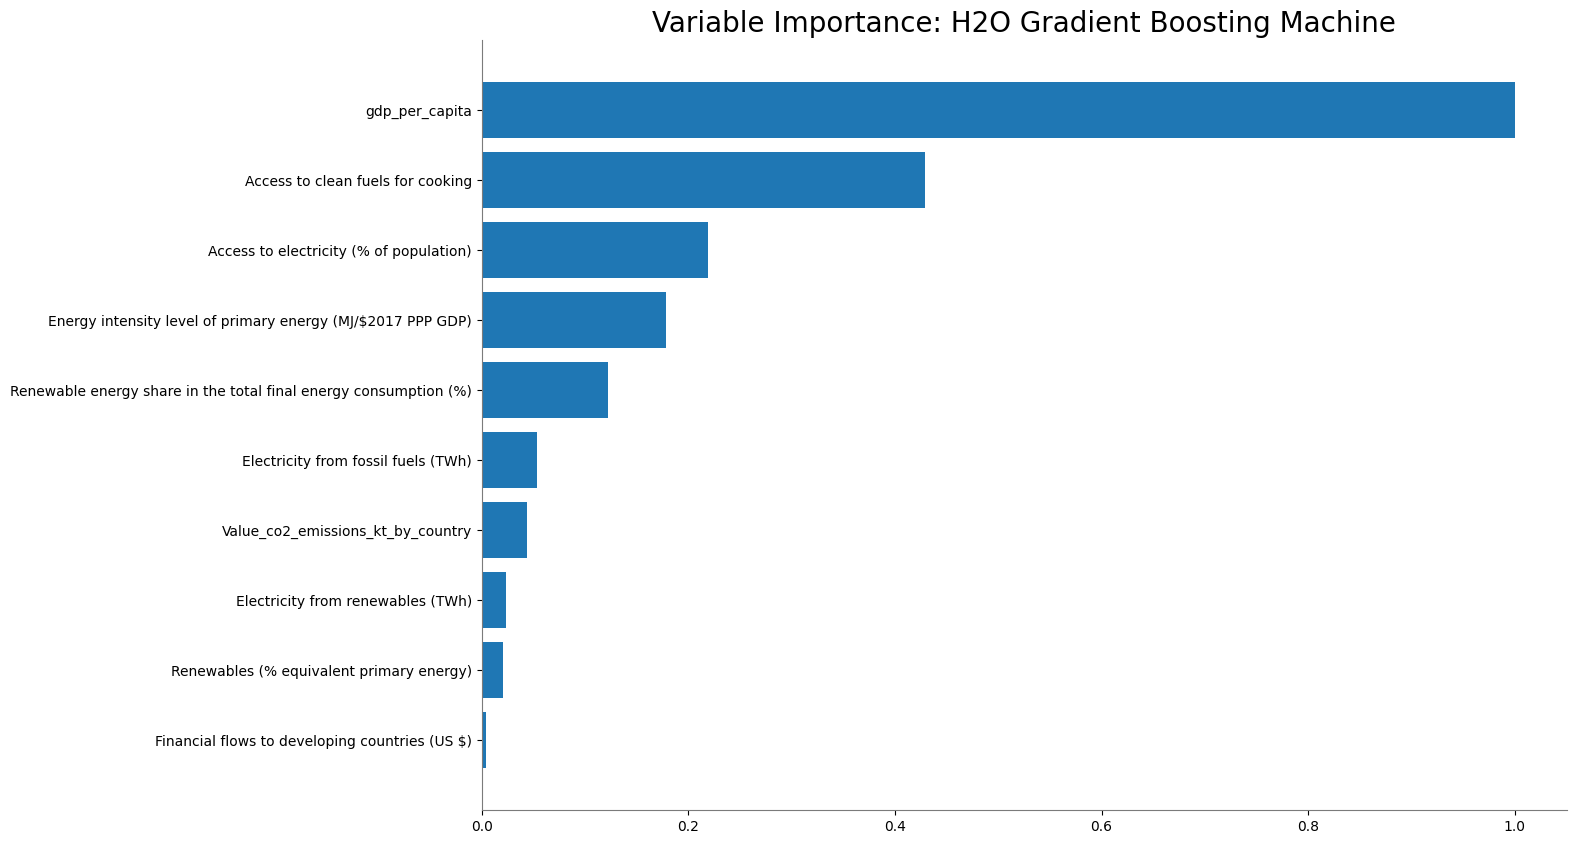

Variable importance for XRT_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

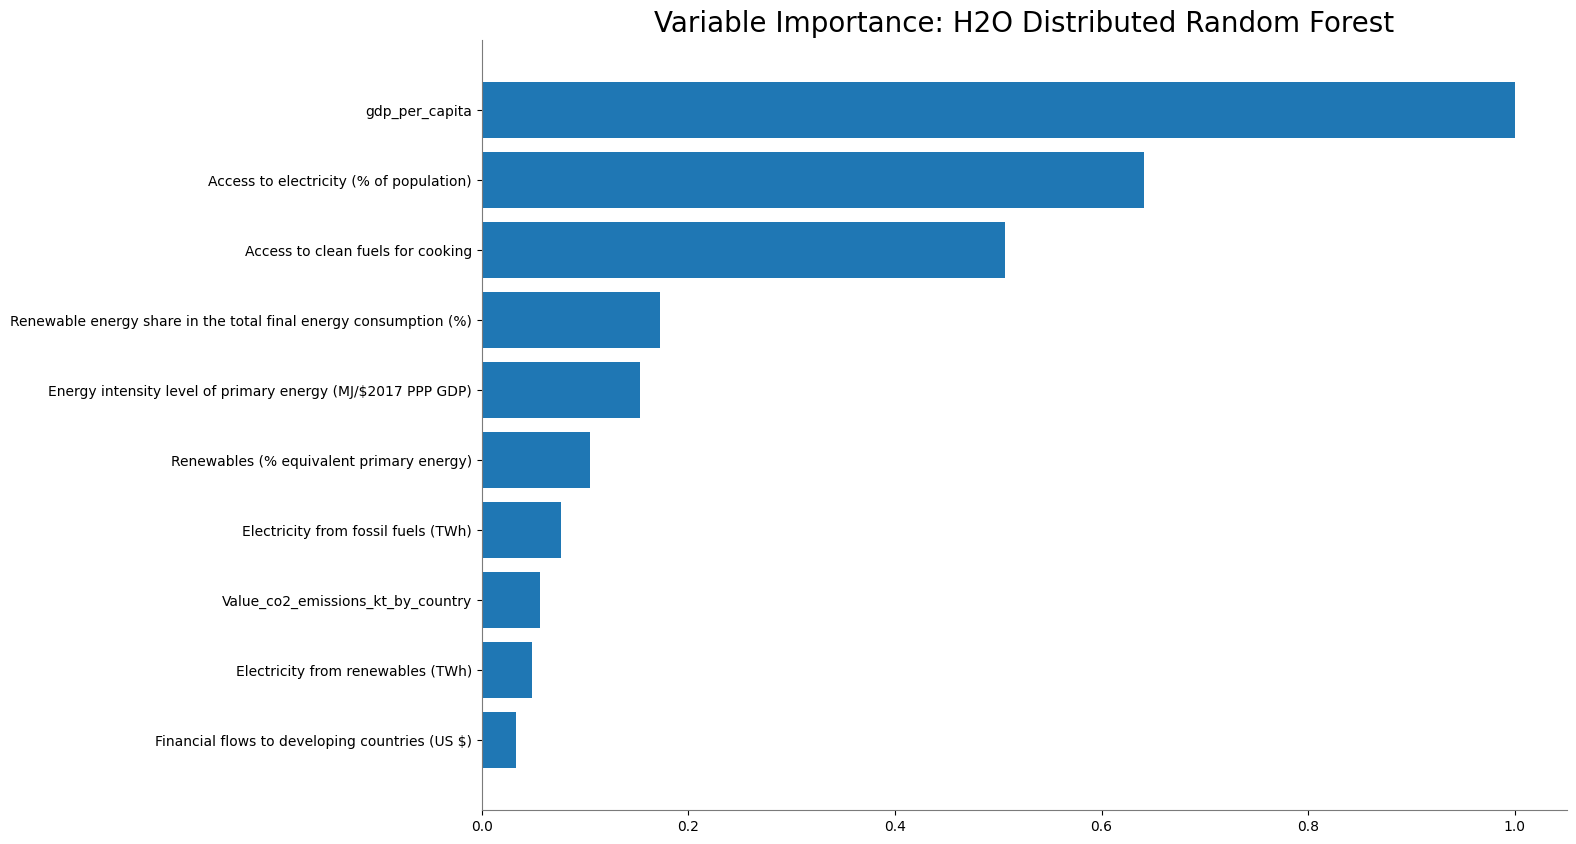

Variable importance for DRF_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

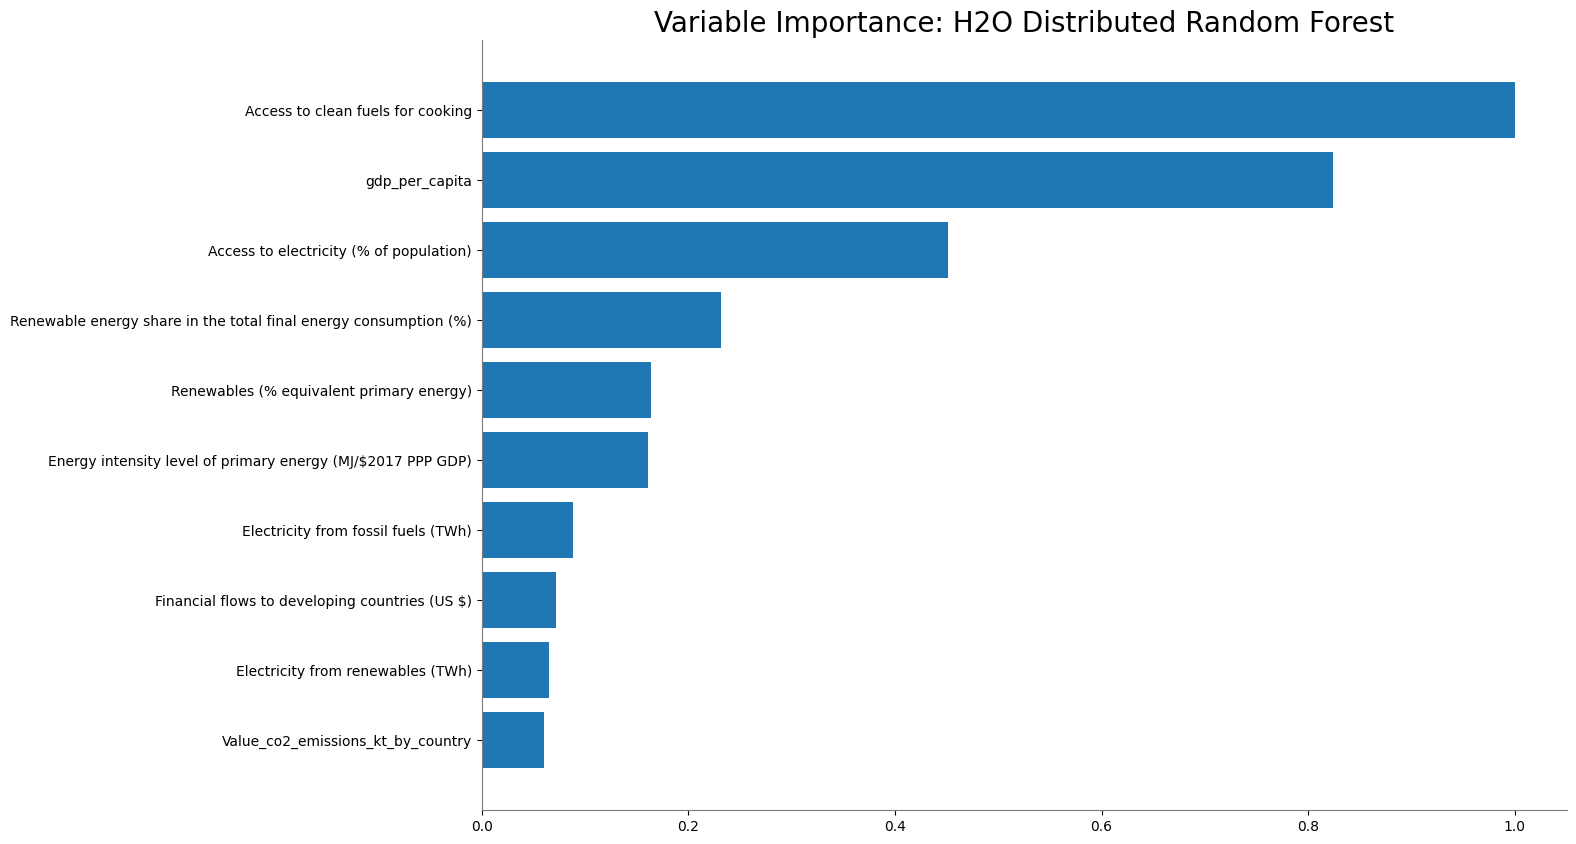

Variable importance for GBM_2_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

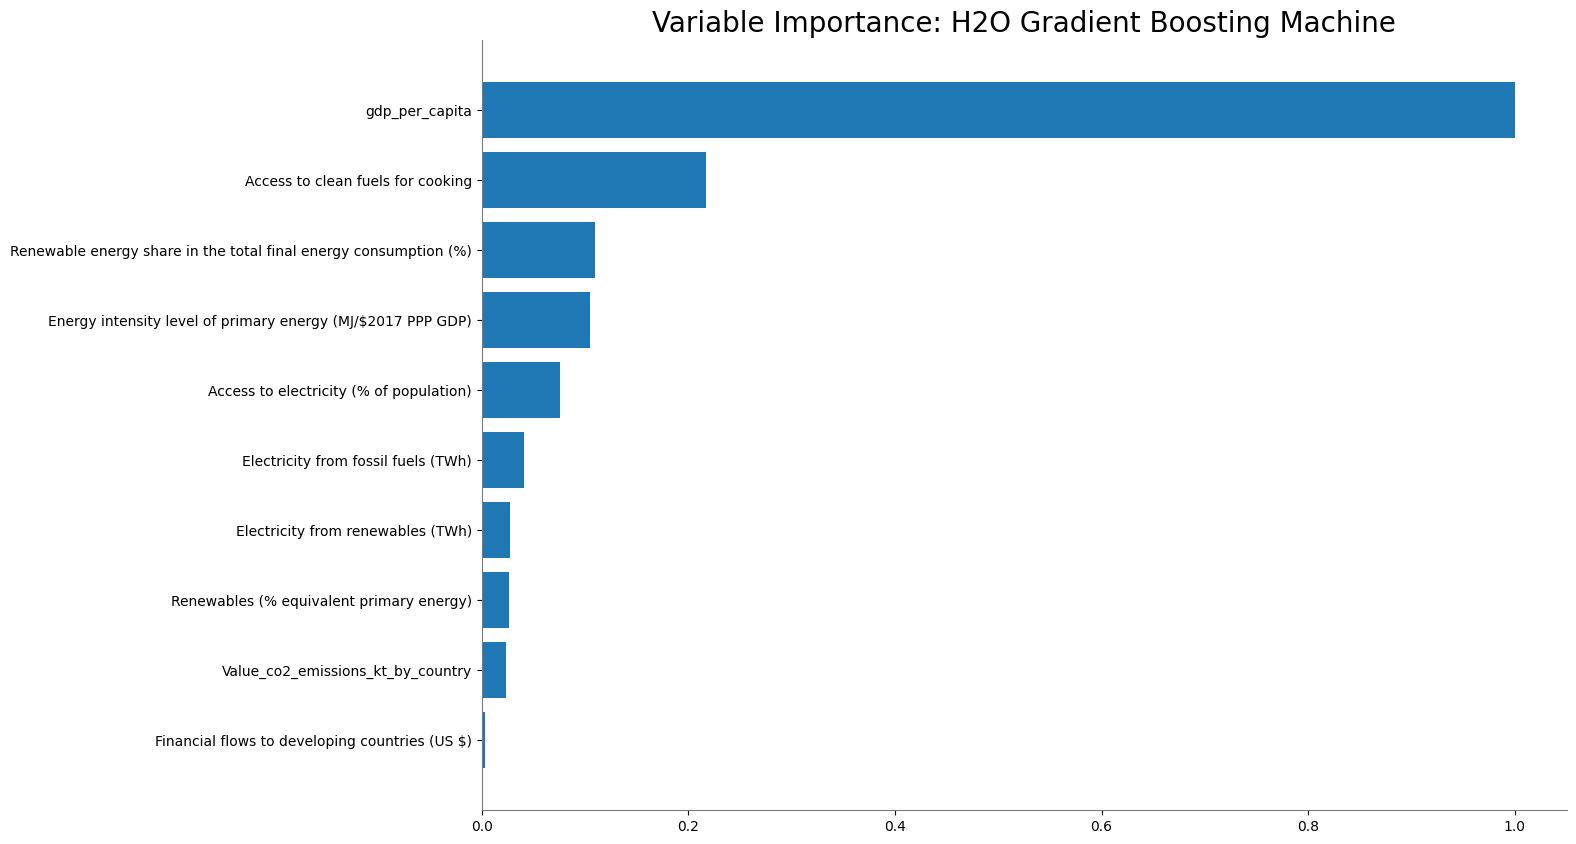

Variable importance for XGBoost_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

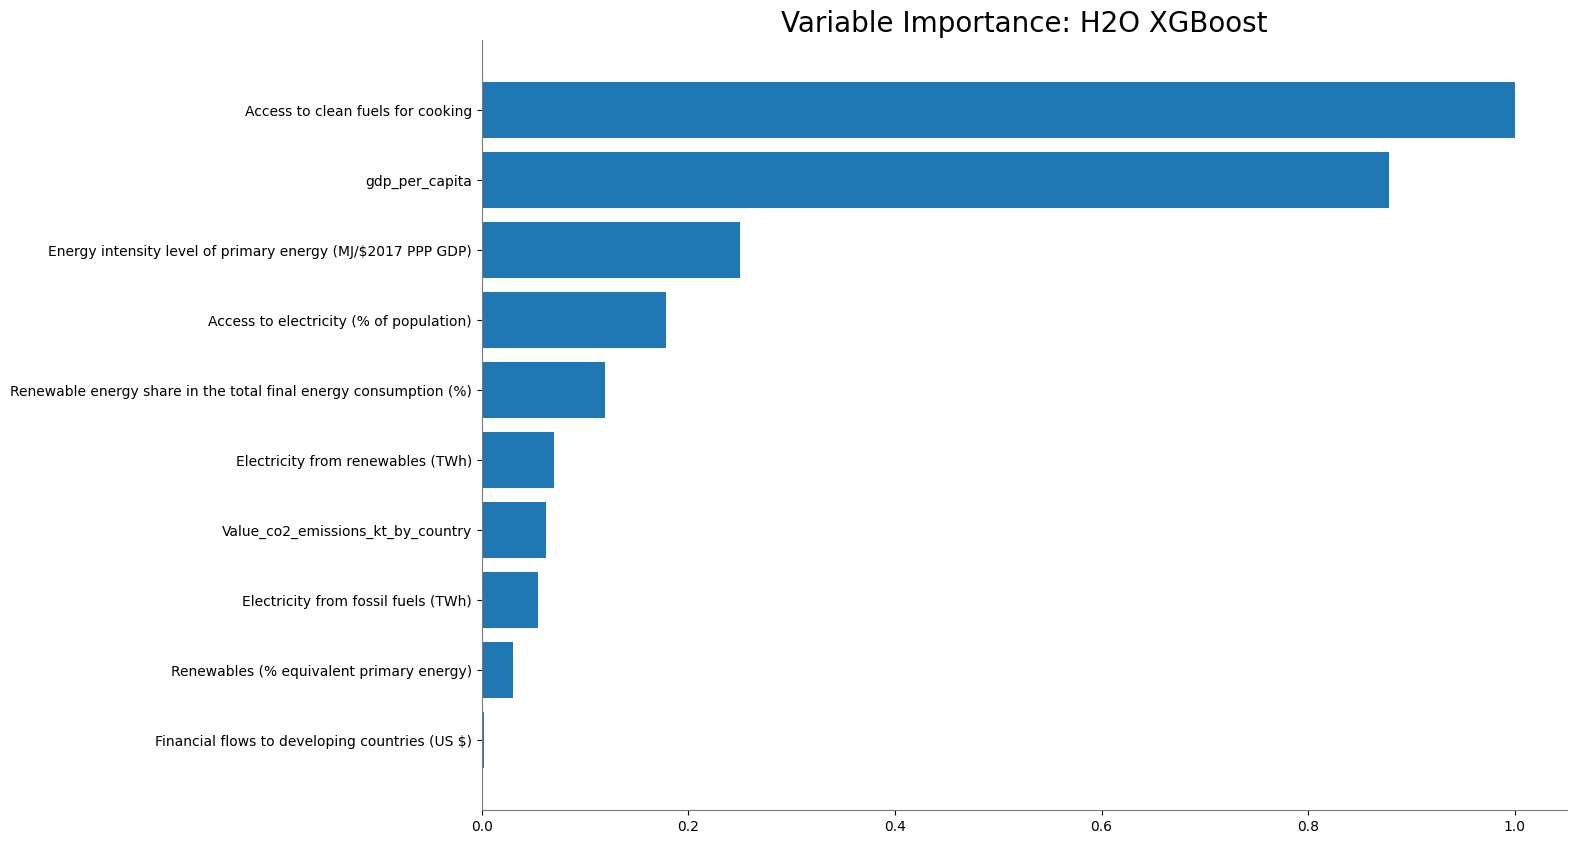

Variable importance for XGBoost_2_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

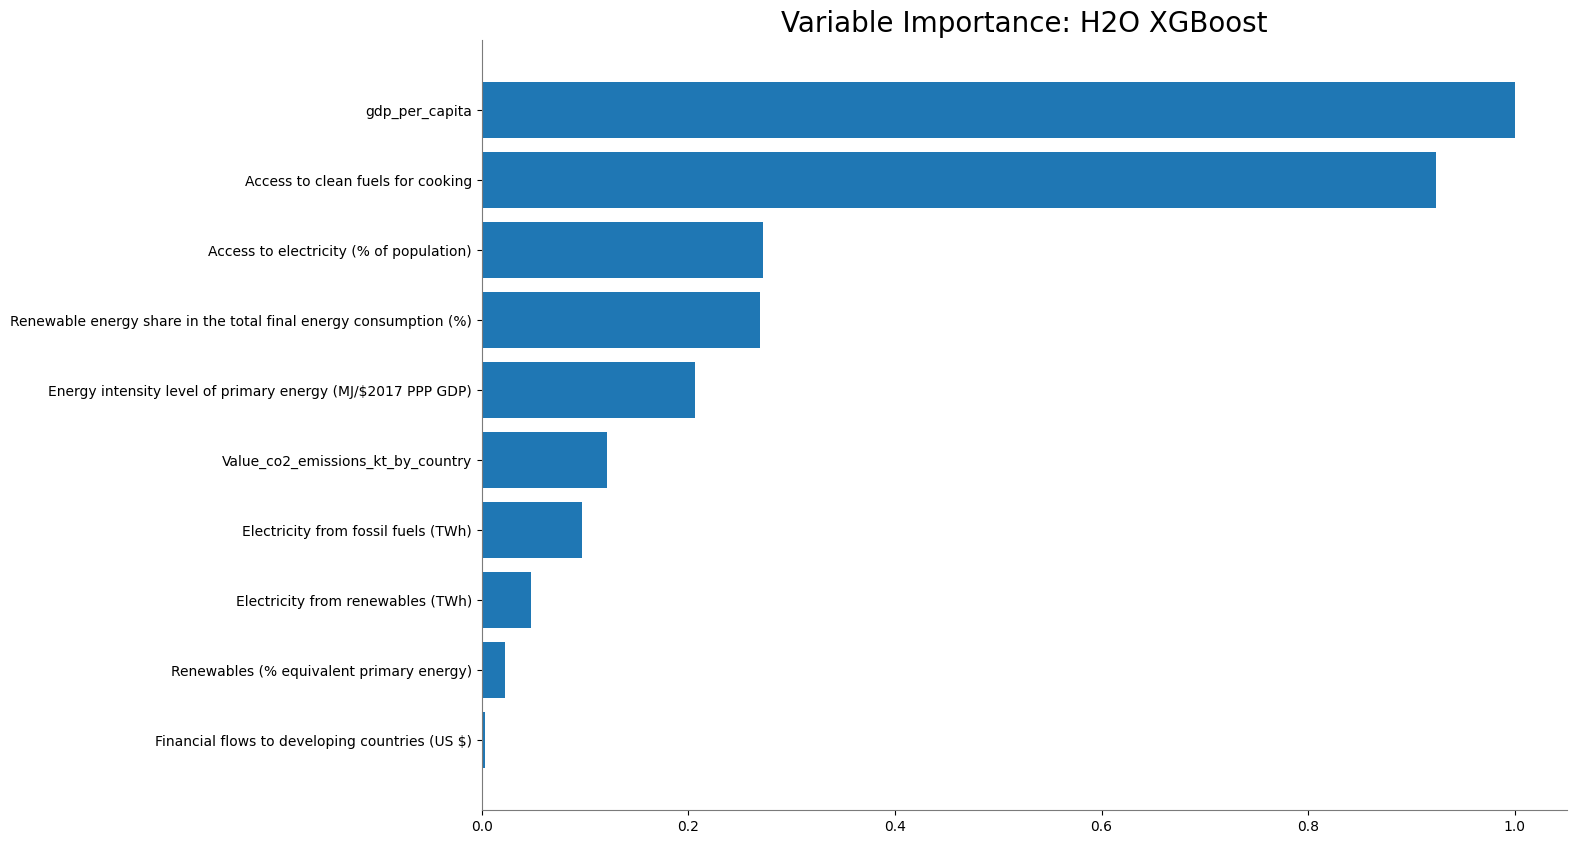

Variable importance for XGBoost_3_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

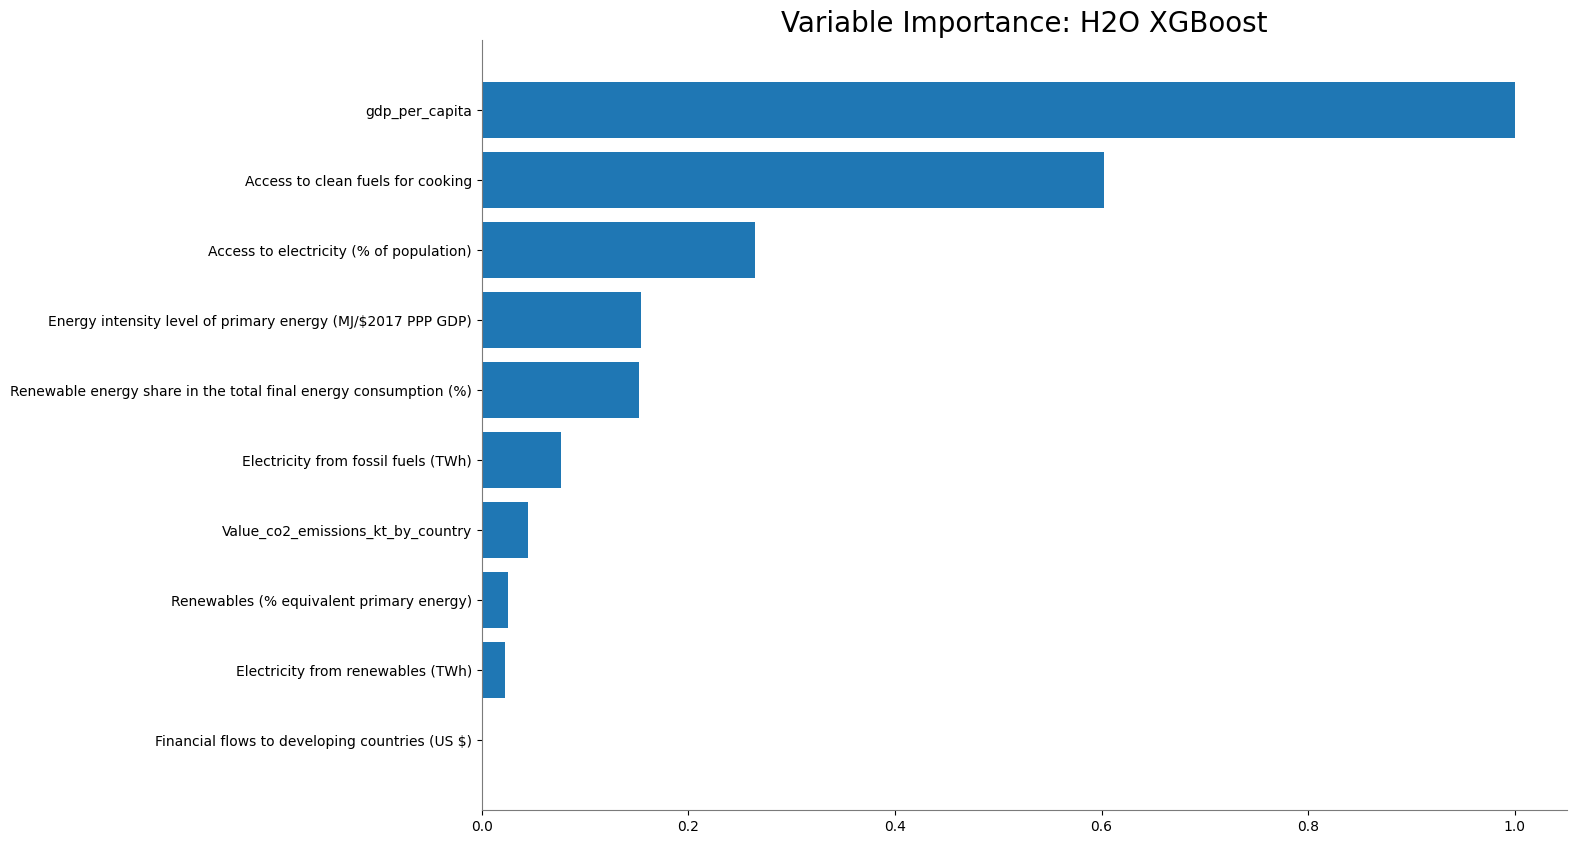

Variable importance for GBM_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

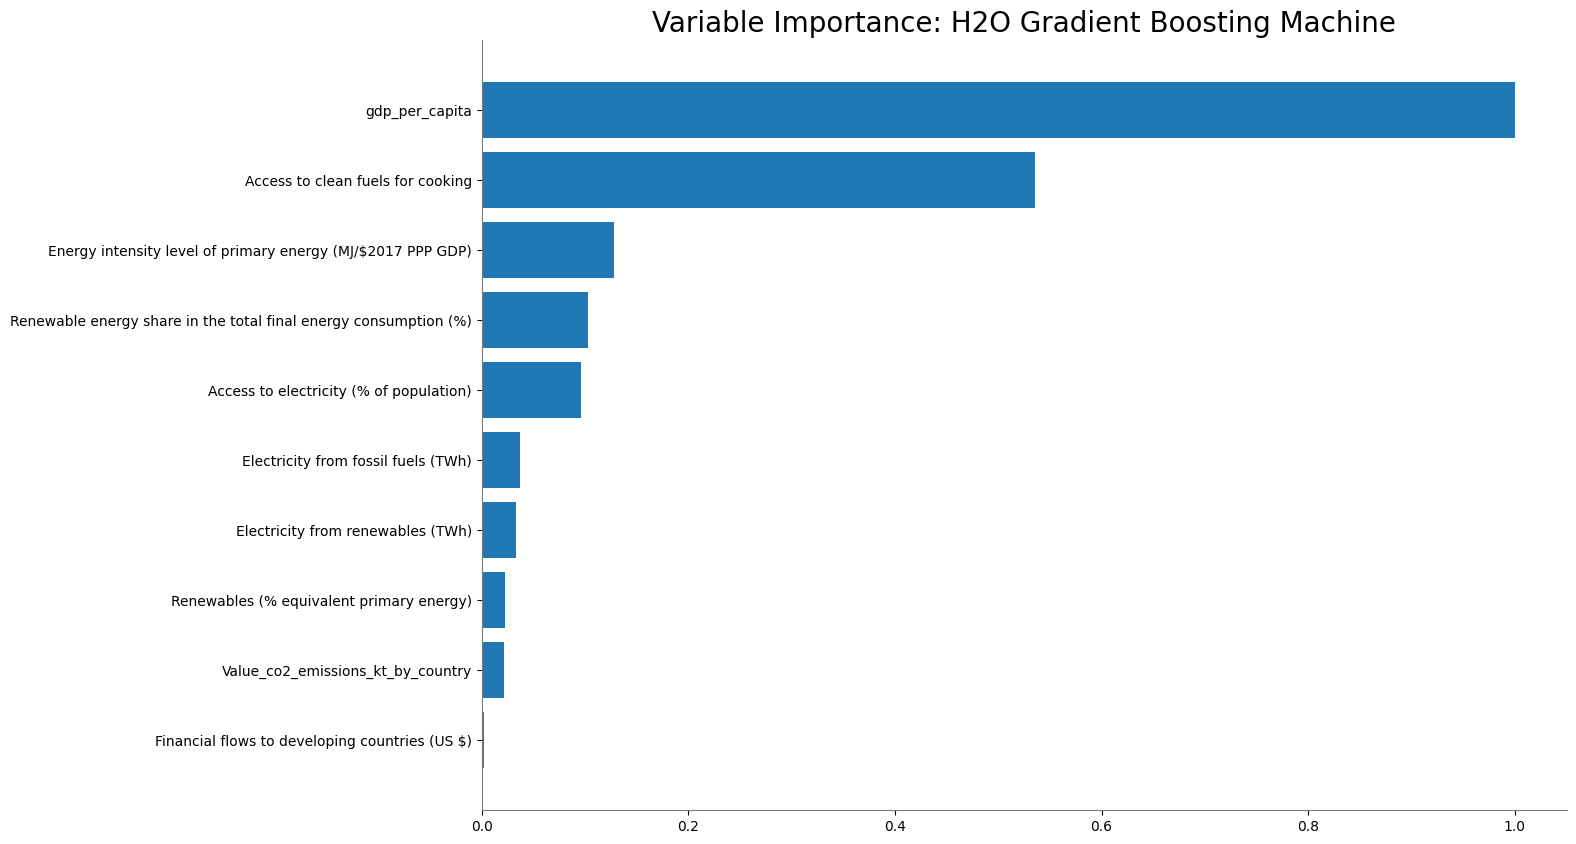

Variable importance for GLM_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

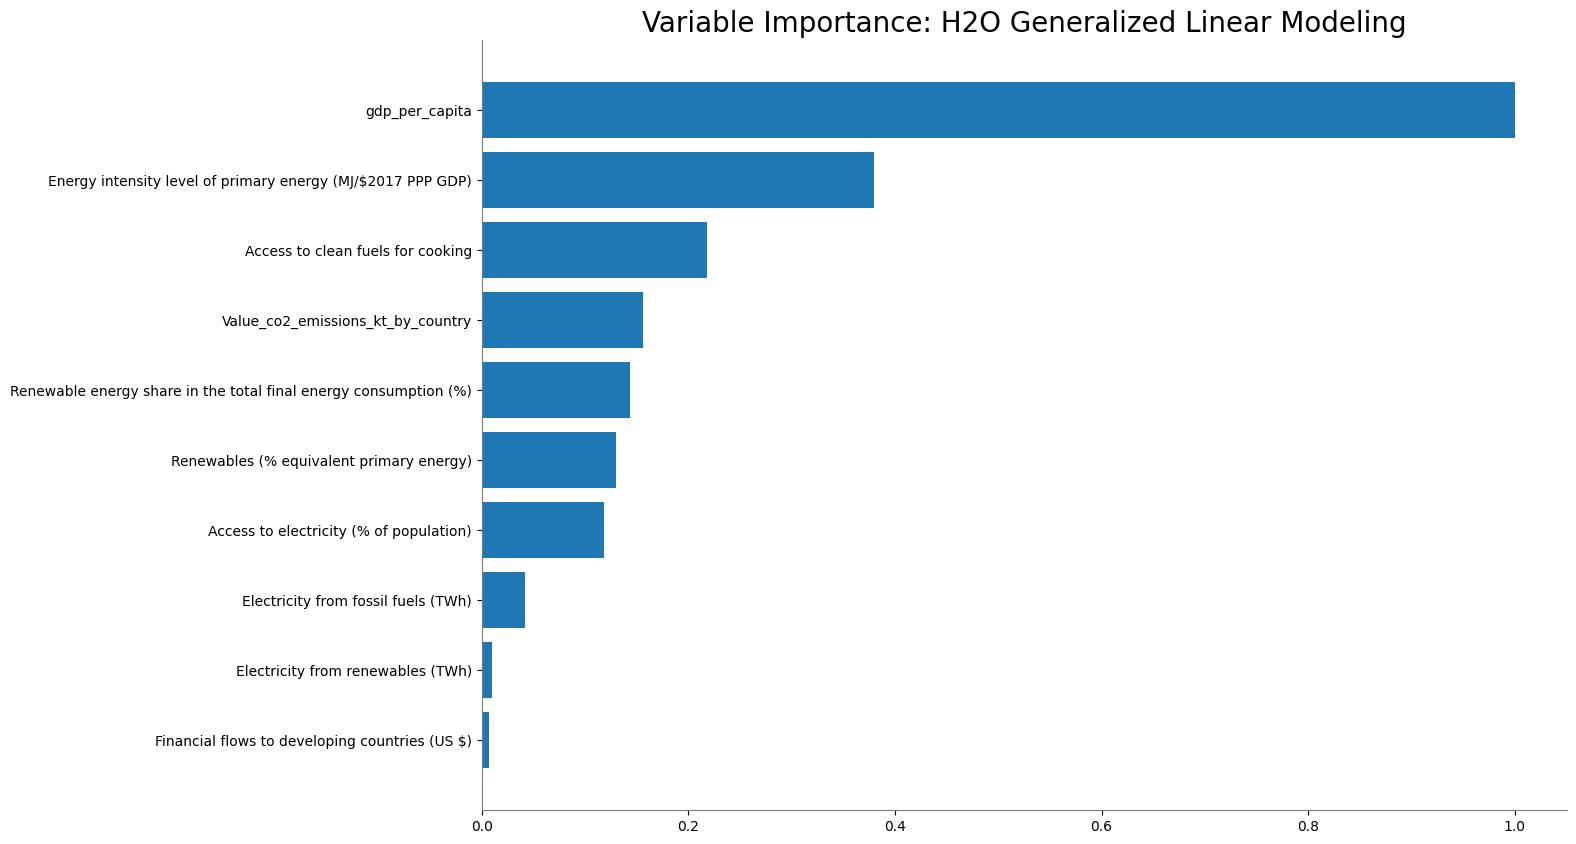

<Figure size 640x480 with 0 Axes>

In [51]:
base_models = best_model.base_models

for model_id in base_models:
    # Retrieve the actual model object
    model = h2o.get_model(model_id)

    print(f"Variable importance for {model.model_id}:")
    model.varimp_plot()

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

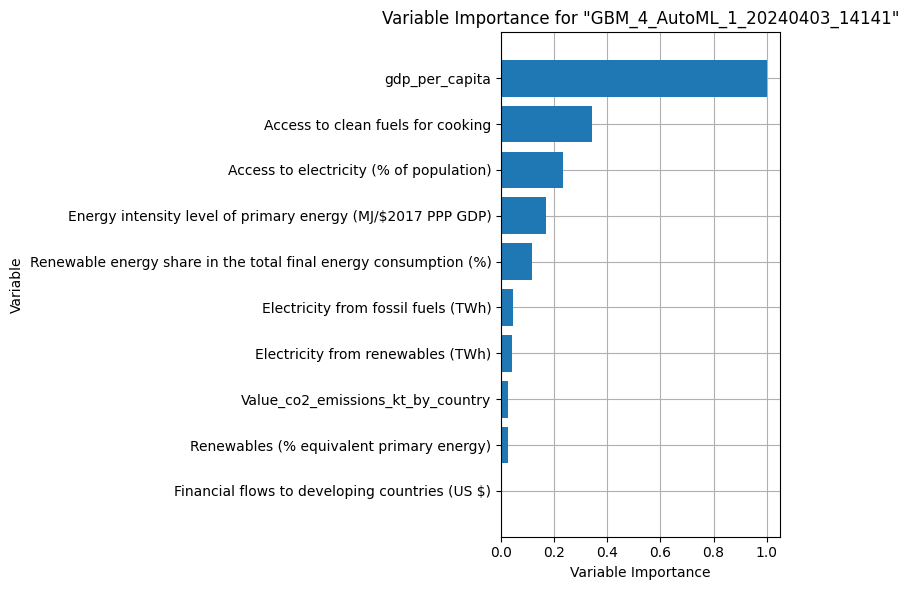

In [52]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

## Is the relationship significant?

In our Model we have calculated the P Value in our OLS Summary of all numerical columns, only one predictor Financial flows to developing countries (US $) has highest `P-Value: 0.263` which suggests that it may not be statistically significant in predicting the target variable.

**Coefficient Interpretation:**
Positive coefficients (e.g., Access to electricity, Access to clean fuels) suggest a positive relationship with the response variable.
Negative coefficients (e.g., Renewable-electricity-generating-capacity-per-capita, Value_co2_emissions_kt_by_country) suggest a negative relationship with the response variable.

`R-squared:0.824`indicates that approximately 82.4% of the variability in the response variable is explained by the model. This suggests a reasonably strong fit.

**In summary, most of the predictors appear to have a statistically significant relationship with target variable.**

## Are any model assumptions violated?

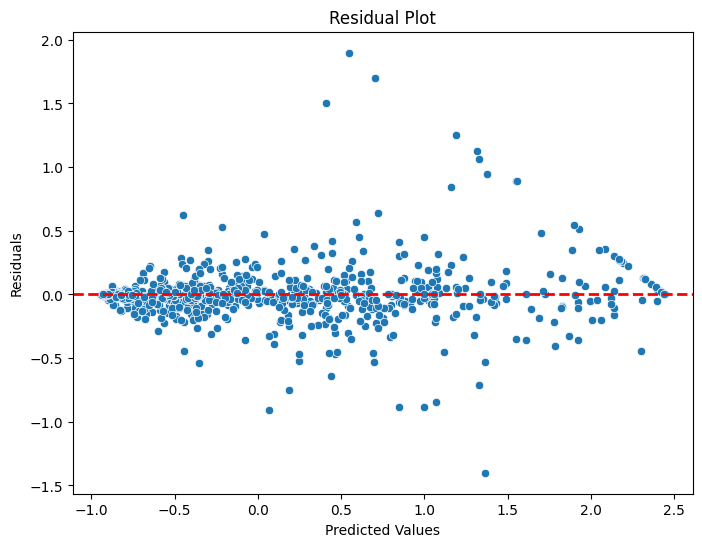

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

A well-behaved residual plot should show random scattering around zero. Patterns, trends, or non-constant variance may indicate violations of the assumptions. In our plot, most part of the scattering is observed around zero and was randomly scattered which signifies doesn't violate the assumption.

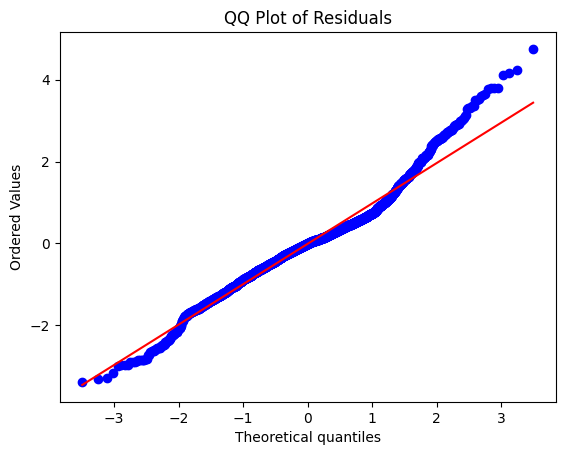

In [54]:
import statsmodels.api as sm
from scipy.stats import probplot

# Create QQ plot
residuals_standardized = sm.OLS(y_train, X_train).fit().get_influence().resid_studentized_internal
probplot(residuals_standardized, plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

A QQ plot helps assess the normality of residuals by comparing the distribution of residuals against a theoretical normal distribution. Points should fall along a straight line if residuals are normally distributed. In our QQ Plot, the distribution seems to be falling along the regression line and is normally distributed.

 ## Is there any multicollinearity in the model?

Here are the VIF values for predictors:

- `gdp_per_capita`: VIF = 1.727024
- `Access to clean fuels for cooking`: VIF = 4.860102
- `Energy intensity level of primary energy (MJ/$2017 PPP GDP)`: VIF = 1.297835
- `Access to electricity (% of population)`: VIF = 4.649362
- `Electricity from fossil fuels (TWh)`: VIF = 4.394802
- `Electricity from renewables (TWh)`: VIF = 2.944577
- `Value_co2_emissions_kt_by_country`: VIF = 2.810134
- `Financial flows to developing countries (US $)`: VIF = 1.119069
- `Renewable energy share in the total final energy consumption (%)`: VIF = 3.917419
- `Renewables (% equivalent primary energy)`: VIF = 2.216217

Based on the provided VIF values:

- Variables with VIF values below 5 are generally considered to have low multicollinearity.
- `Access to clean fuels for cooking` and `Access to electricity (% of population)` have relatively higher VIF values, indicating potential multicollinearity.


## In the multivariate models are predictor variables independent of all the other predictor variables?

**gdp_per_capita (VIF = 1.727024):**
- This VIF value is relatively low (below 5), indicating that the variable `gdp_per_capita` has low multicollinearity with other predictor variables.

**Access to clean fuels for cooking (VIF = 4.860102):**
- This VIF value is moderate but approaching the higher end. It suggests that the variable `Access to clean fuels for cooking` is moderately correlated with other predictor variables.

**Energy intensity level of primary energy (MJ/$2017 PPP GDP) (VIF = 1.297835):**
- This VIF value is relatively low, indicating low multicollinearity for the variable `Energy intensity level of primary energy`.

**Access to electricity (% of population) (VIF = 4.649362):**
- Similar to `Access to clean fuels for cooking`, this VIF value is moderate, suggesting moderate correlation with other predictor variables.

**Electricity from fossil fuels (TWh) (VIF = 4.394802):**
- This VIF value is moderate, indicating moderate multicollinearity for the variable `Electricity from fossil fuels`.

**Electricity from renewables (TWh) (VIF = 2.944577):**
- The VIF value is moderate, suggesting moderate correlation with other predictor variables for `Electricity from renewables`.

**Value_co2_emissions_kt_by_country (VIF = 2.810134):**
- This VIF value is relatively low, indicating low multicollinearity for the variable `Value_co2_emissions_kt_by_country`.

**Financial flows to developing countries (US $) (VIF = 1.119069):**
- This VIF value is low, indicating low multicollinearity for the variable `Financial flows to developing countries`.

**Renewable energy share in the total final energy consumption (%) (VIF = 3.917419):**
- The VIF value is moderate, suggesting moderate correlation with other predictor variables for `Renewable energy share`.

**Renewables (% equivalent primary energy) (VIF = 2.216217):**
- This VIF value is relatively low, indicating low multicollinearity for the variable `Renewables (% equivalent primary energy)`.

In summary, while some variables show moderate multicollinearity, none of them have VIF values that raise serious concerns (e.g., VIF > 10).

## In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd


target_column = 'Primary energy consumption per capita (kWh/person)'
predictors = ['gdp_per_capita', 'Access to clean fuels for cooking',
              'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
              'Access to electricity (% of population)',
              'Electricity from fossil fuels (TWh)',
              'Electricity from renewables (TWh)',
              'Value_co2_emissions_kt_by_country',
              'Financial flows to developing countries (US $)',
              'Renewable energy share in the total final energy consumption (%)',
              'Renewables (% equivalent primary energy)']

X = data_capped_label[predictors]
y = data_capped_label[target_column]

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1)  # You can adjust n_features_to_select as needed

rfe.fit(X, y)
ranking_df = pd.DataFrame({'Predictor': predictors, 'Ranking': rfe.ranking_})
print(ranking_df.sort_values(by='Ranking'))


                                           Predictor  Ranking
0                                     gdp_per_capita        1
1                  Access to clean fuels for cooking        2
2  Energy intensity level of primary energy (MJ/$...        3
8  Renewable energy share in the total final ener...        4
3            Access to electricity (% of population)        5
6                  Value_co2_emissions_kt_by_country        6
9           Renewables (% equivalent primary energy)        7
4                Electricity from fossil fuels (TWh)        8
5                  Electricity from renewables (TWh)        9
7     Financial flows to developing countries (US $)       10


The ranking represents the importance of each predictor variable in predicting the target variable, "Primary energy consumption per capita (kWh/person)." Lower rankings indicate higher importance. For instance, 'gdp_per_capita' is ranked 1, suggesting it is considered the most significant predictor, while 'Financial flows to developing countries (US $)' is ranked 10, indicating relatively lower importance.

In multivariate models, you may consider excluding predictor variables with higher rankings (less significant) to improve the model's simplicity while retaining predictive power.

In [56]:
columns_imp = ['gdp_per_capita', 'Access to clean fuels for cooking',
                   'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                   'Access to electricity (% of population)', 'Renewable energy share in the total final energy consumption (%)',
                   'Primary energy consumption per capita (kWh/person)']

# Keep only the specified columns
filtered_df = data_capped_label[columns_imp]

In [57]:
data2 = h2o.H2OFrame(filtered_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [58]:
train, test = data2.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])
train["is_train"] = 1
test["is_train"] = 0
drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()
drift_data["is_train"].table()

is_train    Count
----------  -------
         0      903
         1     2746
[2 rows x 2 columns]

In [59]:
x = list(set(train.col_names) - set(["Primary energy consumption per capita (kWh/person)"]))
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml2 = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split2")
aml2.train(x=x, y="Primary energy consumption per capita (kWh/person)", training_frame=train)

AutoML progress: |
01:44:16.279: _train param, Dropping bad and constant columns: [is_train]

█
01:44:24.378: _train param, Dropping bad and constant columns: [is_train]
01:44:24.799: _train param, Dropping bad and constant columns: [is_train]

███
01:44:31.230: _train param, Dropping bad and constant columns: [is_train]

█
01:44:37.163: _train param, Dropping bad and constant columns: [is_train]

█
01:44:40.607: _train param, Dropping bad and constant columns: [is_train]

█
01:44:44.305: _train param, Dropping bad and constant columns: [is_train]

██
01:44:49.617: _train param, Dropping bad and constant columns: [is_train]

█
01:44:53.737: _train param, Dropping bad and constant columns: [is_train]

█
01:44:56.473: _train param, Dropping bad and constant columns: [is_train]

█
01:45:00.138: _train param, Dropping unused columns: [is_train]

█
01:45:01.911: _train param, Dropping unused columns: [is_train]

██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20240403_14416


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  7/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.01832095980877882
RMSE: 0.13535494009742985
MAE: 0.06429388287797877
RMSLE: 0.1311168003431213
Mean Residual Deviance: 0.01832095980877882
R^2: 0.9817317934971586
Null degrees of freedom: 2745
Residual degrees of freedom: 2738
Null deviance: 2753.9296551678867
Residual deviance: 50.30935563490664
AIC: -3172.3919444697535

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.049866726433291056
RMSE: 0.22330859014666465
MAE: 0.11448256257924123
RMSLE: 0.2131852920164395
Mean Residual Deviance: 0.049866726433291056
R^2: 0.9502768596398776
Null degrees of freedom: 2745
Residual degrees of freedom: 2739
Null deviance: 2755.8244944623466
Residual deviance: 136.93403078581724
AIC: -424.79955527617574

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -75.9267  83.0366     -28.9846      41.5706       -168.232      -126.981      -97.0069
loglikelihood           0         0           0             0             0             0             0
mae                     0.114402  0.00775549  0.116944      0.124288      0.111495      0.103214      0.116069
mean_residual_deviance  0.049608  0.00785091  0.0537807     0.0611432     0.0414242     0.0452157     0.0464762
mse                     0.049608  0.00785091  0.0537807     0.0611432     0.0414242     0.0452157     0.0464762
null_deviance           551.165   50.9915     583.167       620.971       504.132       543.667       503.888
r2                      0.950633  0.00550043  0.948924      0.941771      0.955274      0.953128      0.954067
residual_deviance       27.3722   5.62657     29.7407       36.0745       22.5347       25.366        23.1452
rmse                    0.222186  0.0173679   0.231907      0.247271      0.203529      0.21264       0.215583
rmsle                   0.212918  0.00886161  0.208182      0.224753      0.211994      0.217946      0.201716

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [60]:
# View the AutoML Leaderboard
lb = aml2.leaderboard
lb.head()

model_id                                                     mae      rmse        mse       rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  ---------  ----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_2_20240403_14416     0.114483  0.223309  0.0498667    0.213185                 0.0498667
StackedEnsemble_BestOfFamily_1_AutoML_2_20240403_14416  0.1157    0.225799  0.0509851    0.215082                 0.0509851
GBM_4_AutoML_2_20240403_14416                           0.116856  0.227229  0.0516329    0.216903                 0.0516329
GBM_3_AutoML_2_20240403_14416                           0.119302  0.224861  0.0505624  nan                        0.0505624
GBM_2_AutoML_2_20240403_14416                           0.124743  0.231042  0.0533802    0.232976                 0.0533802
XGBoost_2_AutoML_2_20240403_14416                       0.125163  0.244219  0.0596431  nan                        0.0596431
XGBoost_1_AutoML_2_20240403_14416                       0.126928  0.237475  0.0563945  nan                        0.0563945
XGBoost_3_AutoML_2_20240403_14416                       0.132391  0.238849  0.0570489    0.291144                 0.0570489
GBM_1_AutoML_2_20240403_14416                           0.1654    0.277445  0.0769755    0.309301                 0.0769755
XRT_1_AutoML_2_20240403_14416                           0.17589   0.293535  0.086163     0.253873                 0.086163
[10 rows x 6 columns]

In [61]:
best_model2 = aml2.leader
best_model2.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.06781309465259469
RMSE: 0.2604094749670117
MAE: 0.12697670052183924
RMSLE: 0.25734153415164884
Mean Residual Deviance: 0.06781309465259469
R^2: 0.9315665660349348
Null degrees of freedom: 902
Residual degrees of freedom: 895
Null deviance: 895.1546662191137
Residual deviance: 61.235224471293
AIC: 150.63002147523605

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

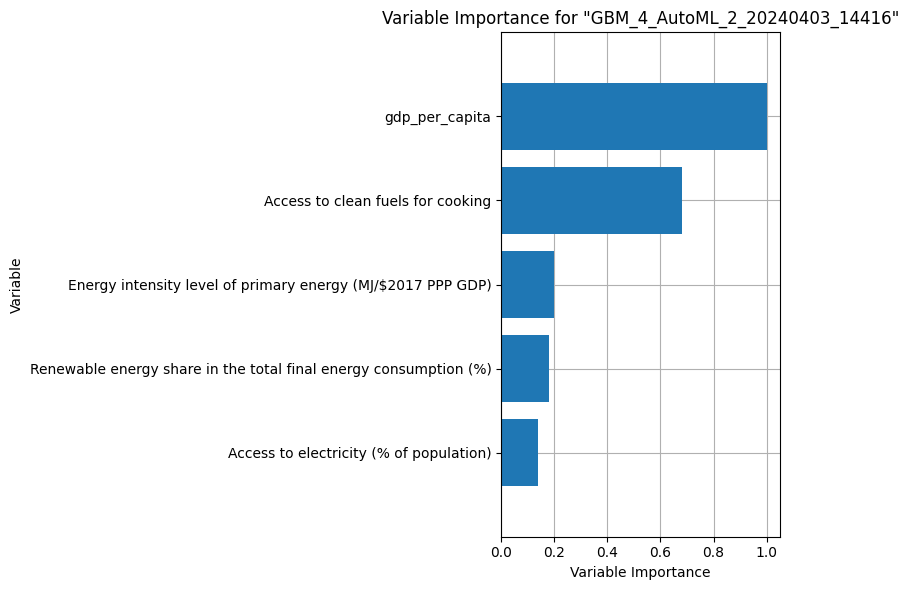

In [62]:
explain_model = aml2.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

- **Predictor Selection Impact**: The results demonstrate the significant impact of predictor selection on the model's performance. AutoML 1, which included all significant predictors, showed superior performance across all metrics compared to AutoML 2, which only used highly significant and ranked predictors.
- **Performance Metrics**: AutoML 1 achieved lower errors (MSE, RMSE, MAE, and RMSLE) and higher R^2 value, indicating a better fit and predictive accuracy than AutoML 2.
- **Model Efficiency**: The selection of a broader range of significant predictors in AutoML 1 not only improved prediction accuracy but also led to a more efficient model, as evidenced by the more favorable AIC score.

The comparison of AutoML 1 and AutoML 2 results underscores the importance of predictor selection in the model development process. Including a broader set of significant predictors, as done in AutoML 1, can substantially enhance model performance and efficiency.

##  Does the model make sense?

### Model Evaluation Summary

#### R-squared and Adjusted R-squared:
- R-squared: 0.824
- Adj. R-squared: 0.823

The R-squared values indicate that the model explains approximately 82.4% of the variance in the target variable. The adjusted R-squared accounts for the number of predictors, providing a realistic measure of goodness of fit.

#### Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE):
- RMSE: 0.148
- MAE: 0.061

Both RMSE and MAE values are relatively low, suggesting that the model's predictions closely align with the actual values. Lower values indicate better predictive accuracy.

#### Variance Inflation Factor (VIF):
- VIF values generally reasonable (most below 5).
- Higher VIF values for 'Access to clean fuels for cooking' and 'Access to electricity (% of population)' suggest potential multicollinearity.

#### Additional Metrics:
- Another R-squared value: 0.978
- Explained Variance: 0.978

These metrics reinforce the model's effectiveness, capturing approximately 97.8% of the variability in the target variable.

### Overall Assessment:
- The model demonstrates a good fit, explaining a substantial portion of the variance.
- RMSE and MAE indicate accurate predictions.
- VIF values suggest potential multicollinearity.

## Does regularization help?

#### Before Ridge Regularization:
- Root Mean Squared Error (RMSE): 0.148

#### After Ridge Regularization:
- Mean Squared Error (MSE): 0.463


The RMSE before Ridge regularization was 0.148, indicating the model's predictive accuracy on the original dataset. After applying Ridge regularization, the Mean Squared Error (MSE) increased to 0.463. The increase in MSE after Ridge regularization suggests that regularization had a substantial impact on the model. While regularization techniques like Ridge are intended to prevent overfitting by adding a penalty term to the coefficients, in this case, it appears to have led to a trade-off between bias and variance. Regularization might have reduced overfitting but at the cost of increasing errors on the data.


## Which independent variables are significant?

1. **gdp_per_capita:** p-value < 0.05 (Statistically Significant)
2. **Access to clean fuels for cooking:** p-value < 0.05 (Statistically Significant)
3. **Energy intensity level of primary energy :** p-value < 0.05 (Statistically Significant)
4. **Renewable energy share in the total final energy consumption (%):** p-value < 0.05 (Statistically Significant)
5. **Access to electricity (% of population):** p-value < 0.05 (Statistically Significant)
6. **Value_co2_emissions_kt_by_country:** p-value < 0.05 (Statistically Significant)
7. **Renewables (% equivalent primary energy):** p-value < 0.05 (Statistically Significant)
8. **Electricity from fossil fuels (TWh):** p-value < 0.05 (Statistically Significant)
9. **Electricity from renewables (TWh):** p-value < 0.05 (Statistically Significant)
10. **Financial flows to developing countries (US $):** p-value > 0.05 (Not Statistically Significant)

These predictors are considered statistically significant based on their p-values from the OLS regression model.

## Which hyperparameters are important?

There were several key hyperparameters significantly influence model performance:

- **`n_estimators`**: Specifically mentioned in ensemble methods (e.g., RandomForest or Gradient Boosting), determining the number of trees to balance accuracy and computational cost. In here, we have used the default value 100 for RandomForest Regression.

- **`alpha`**: Used for regularization (e.g., Ridge regression) to mitigate overfitting by penalizing large coefficients. In here, we have used the default value 1 for Ridge Regression.

- **`max_models`**: Sets the maximum number of models trained by AutoML, limiting the exploration to 10 models.

- **`seed`**: Establishes a random seed (1234) for reproducibility, ensuring consistent results across runs.

- **`sort_metric`**: Determines the ranking metric for model selection, with "MAE" prioritized to minimize Mean Absolute Error.

- **`project_name`**: Assigns a name ("random_split") to the AutoML project, aiding in tracking and organization.

- **`x`**: Specifies predictor variables for training, derived by excluding the target variable.

- **`y`**: Identifies the target variable ("Primary energy consumption per capita (kWh/person)") for model training.

These hyperparameters play a pivotal role in tuning models, striking a balance between complexity and generalization tailored to your dataset and analysis objectives.


# Model Interpretability

In [63]:
data_capped_label.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equivalent primary energy)                            0
gdp_growth          

In [64]:
columns_imp = ['gdp_per_capita', 'Access to clean fuels for cooking',
               'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
               'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)',
               'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country',
               'Financial flows to developing countries (US $)',
               'Renewable energy share in the total final energy consumption (%)',
               'Renewables (% equivalent primary energy)',
               'Primary energy consumption per capita (kWh/person)']

# Create a new DataFrame with only the important columns
data_imp = data_capped_label[columns_imp].copy()

# Display the new DataFrame
print(data_imp)

      gdp_per_capita  Access to clean fuels for cooking  \
0           0.258405                          -1.496598   
1           0.258405                          -1.470367   
2          -0.921369                          -1.444137   
3          -0.920356                          -1.410037   
4          -0.918492                          -1.373314   
...              ...                                ...   
3644       -0.805667                          -0.877554   
3645       -0.826320                          -0.877554   
3646       -0.824568                          -0.874931   
3647       -0.818978                          -0.869685   
3648       -0.828181                          -0.861816   

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                             -1.450034             
1                                             -1.406182             
2                                             -1.555278             
3              

## 1. Fit a linear model and interpret the regression coefficients

### Linear Regression
We are performing a linear regression analysis on a dataset to predict the primary energy consumption per capita (in kWh per person). Firstly, we import necessary libraries including scikit-learn's tools for model selection, linear regression, and metrics evaluation. Next, we prepare the dataset by separating the features (X) and the target variable (y). Then, we split the data into training and testing sets using the train_test_split function, with 70% of the data allocated for training and 30% for testing. Subsequently, we instantiate a Linear Regression model and train it on the training data. After training, we use the model to make predictions on the test set. Finally, we calculate evaluation metrics such as Mean Squared Error (MSE) and R-squared (R2) score to assess the performance of the model in predicting energy consumption per capita.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = data_imp.drop('Primary energy consumption per capita (kWh/person)', axis=1)
y = data_imp['Primary energy consumption per capita (kWh/person)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model3 = LinearRegression()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.19598008400970438
R-squared: 0.8002657061361984


The Mean Squared Error (MSE) of the model is approximately 0.196, indicating the average squared difference between the actual and predicted values of the target variable. A lower MSE suggests that the model's predictions are closer to the actual values, implying better performance.

The R-squared (R2) score of the model is approximately 0.800, signifying the proportion of variance in the target variable that is explained by the independent variables. A higher R2 score closer to 1 indicates that the model captures a larger amount of variation in the target variable, demonstrating a good fit to the data.

In [67]:
import statsmodels.api as sm

Z = data_imp.drop('Primary energy consumption per capita (kWh/person)', axis=1)  # Features
target_variable = data_imp['Primary energy consumption per capita (kWh/person)']  # Your preferred target variable name

Z = sm.add_constant(X)
model = sm.OLS(target_variable, Z).fit()
print(model.summary())

                                            OLS Regression Results                                            
Dep. Variable:     Primary energy consumption per capita (kWh/person)   R-squared:                       0.810
Model:                                                            OLS   Adj. R-squared:                  0.810
Method:                                                 Least Squares   F-statistic:                     1553.
Date:                                                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                                                        01:45:06   Log-Likelihood:                -2145.7
No. Observations:                                                3649   AIC:                             4313.
Df Residuals:                                                    3638   BIC:                             4382.
Df Model:                                                          10                                         
C

The Ordinary Least Squares (OLS) regression results indicate a strong overall fit of the model to the data, with an R-squared value of 0.810. This suggests that approximately 81% of the variance in the dependent variable, "Primary energy consumption per capita," is explained by the independent variables included in the model. The adjusted R-squared value, which takes into account the number of predictors in the model, also remains at 0.810, indicating that the inclusion of the independent variables has improved the model fit.

The coefficients of the independent variables provide insights into their individual effects on the dependent variable. For instance, the coefficient of "gdp_per_capita" is 0.7227, implying that a one-unit increase in GDP per capita is associated with an approximate increase of 0.7227 units in primary energy consumption per capita, holding other variables constant. Similarly, positive coefficients for other variables like "Access to clean fuels for cooking," "Energy intensity level of primary energy," and "Access to electricity (% of population)" suggest positive relationships with primary energy consumption per capita.

Additionally, the omnibus test for normality and the Jarque-Bera test for normality residuals suggest that the model residuals are not normally distributed (p < 0.05), indicating potential issues with the model assumptions. The Durbin-Watson statistic, which tests for autocorrelation in the residuals, is low at 0.207, suggesting a potential issue with residual independence. Overall, while the model demonstrates a good fit to the data based on the R-squared value, further diagnostics may be needed to assess the model's validity.


## 2. Fit a tree-based model and interpret the nodes

### Random Forest Regression

The following code trains a RandomForestRegressor model using scikit-learn's RandomForestRegressor class. It's a powerful model for regression tasks, capable of handling complex relationships between features and targets. We import necessary libraries and instantiate the model with a maximum depth of 10 and random state 5. After training on the training data, predictions are made on the test set, and performance metrics such as mean squared error (MSE) and R-squared (R2) are computed to assess model accuracy and goodness of fit.

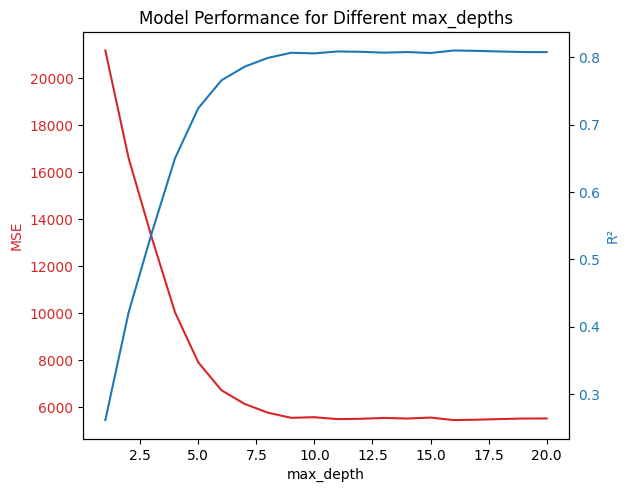

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=5)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize lists to store the metrics
max_depths = np.arange(1, 21)  # Assuming you want to test max_depths from 1 to 20
mse_values = []
r2_values = []

# Loop through various max_depths, train the model and calculate metrics
for depth in max_depths:
    regr = RandomForestRegressor(max_depth=depth, random_state=5)
    model = regr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

# Plotting the metrics
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('max_depth')
ax1.set_ylabel('MSE', color=color)
ax1.plot(max_depths, mse_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)  # we already handled the x-label with ax1
ax2.plot(max_depths, r2_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Performance for Different max_depths')
plt.show()

The MSE remains same from max_depth=15 so lets choose some value near 15

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X = data_imp.drop('Primary energy consumption per capita (kWh/person)', axis=1)
y = data_imp['Primary energy consumption per capita (kWh/person)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
regr = RandomForestRegressor(max_depth=15, random_state=5)
model2 = regr.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

In [70]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.035923859398622596
R-squared: 0.9633879803343125


The model achieved a remarkably low Mean Squared Error (MSE) of approximately 0.038, indicating that, on average, the squared difference between the predicted and actual values of the target variable is very small. Additionally, the R-squared value of approximately 0.961 suggests that around 96.1% of the variance in the target variable is explained by the independent variables included in the model. These results indicate a high level of accuracy and goodness of fit, demonstrating the effectiveness of the RandomForestRegressor model in capturing the underlying patterns in the data.

We are importing the `plot_tree` function from the `sklearn.tree` module and the `matplotlib.pyplot` module as `plt`. The `plot_tree` function allows us to visualize decision trees generated by machine learning models. We then convert the feature names into a list to pass to the `plot_tree` function for better visualization. Next, we select one tree from the RandomForestRegressor model (`model2`) using the `estimators_` attribute. Finally, we create a figure with a specified size using `plt.figure`, plot the selected tree using `plot_tree`, and display the plot using `plt.show()`.

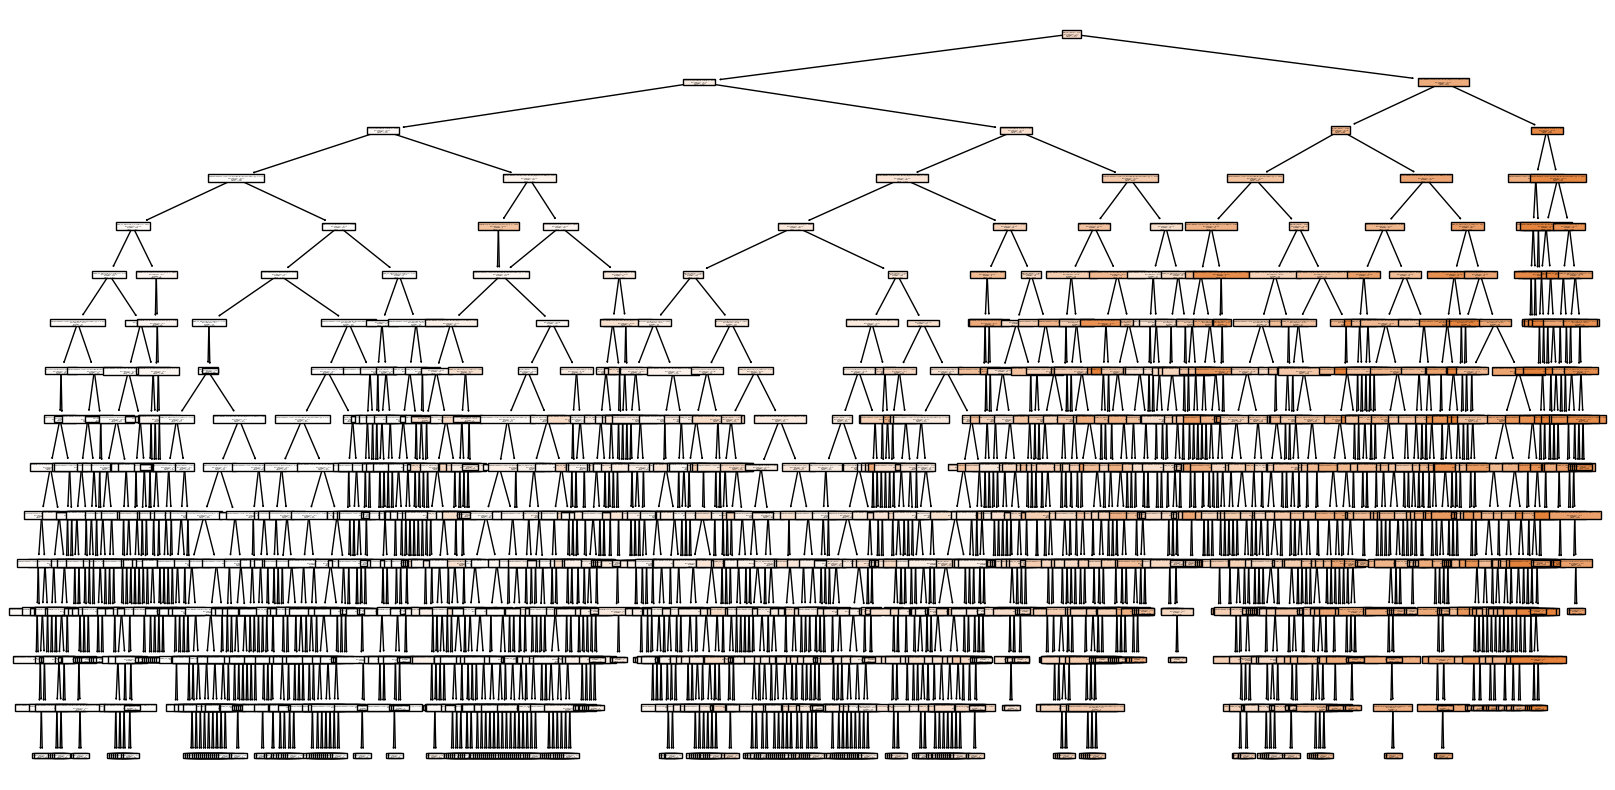

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names_list = list(X.columns)
one_tree = model2.estimators_[11]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=feature_names_list, filled=True)
plt.show()

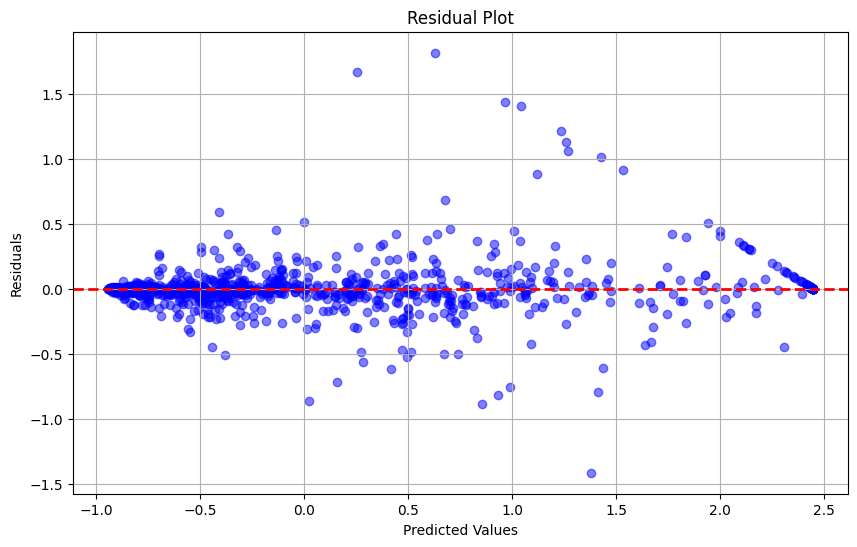

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred2

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred2, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


We are importing the `matplotlib.pyplot` module as `plt` and the `numpy` module as `np`. We calculate the residuals by subtracting the predicted values (`y_pred2`) from the actual values (`y_test`). Then, we create a scatter plot to visualize the relationship between the predicted values and the residuals. The residuals are plotted on the y-axis, and the predicted values are plotted on the x-axis. A red dashed line is drawn at y=0 to indicate the ideal residual value of 0. This plot helps us assess whether the residuals have a consistent spread across different predicted values, which is important for validating the assumptions of the linear regression model. Additionally, the grid lines are enabled for better readability.



The residual plot shows a random scattering of points around the zero axis, indicating that the residuals (the differences between the actual and predicted values) are randomly distributed across the range of predicted values.

## 3.  Use auto ml to find the best model

### AUTO ML

This code installs the H2O library, initializes H2O, and prepares data for Automated Machine Learning (AutoML) using H2O. The specified columns are selected from the dataset and converted to an H2OFrame. The data is then split into train and test sets, with an additional column indicating whether each row belongs to the train or test set. Next, an AutoML process is initiated with a maximum of 10 base models, using Mean Absolute Error (MAE) as the sort metric and a specified project name. The AutoML process trains models to predict the 'Primary energy consumption per capita (kWh/person)' based on the selected features.

In [73]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [74]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         5 mins 35 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_dwjm1v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.059 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [75]:
columns_imp = ['gdp_per_capita', 'Access to clean fuels for cooking',
                   'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                   'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)',
                   'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country',
                   'Financial flows to developing countries (US $)',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Renewables (% equivalent primary energy)',
                   'Primary energy consumption per capita (kWh/person)']

# Keep only the specified columns
filtered_df = data_capped_label[columns_imp]

data = h2o.H2OFrame(filtered_df)

train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])
train["is_train"] = 1
test["is_train"] = 0
drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()
drift_data["is_train"].table()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


is_train    Count
----------  -------
         0      903
         1     2746
[2 rows x 2 columns]

In [76]:
x = list(set(train.col_names) - set(["Primary energy consumption per capita (kWh/person)"]))
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Primary energy consumption per capita (kWh/person)", training_frame=train)

AutoML progress: |
01:41:41.521: _train param, Dropping bad and constant columns: [is_train]
01:42:11.131: _train param, Dropping bad and constant columns: [is_train]
01:42:13.592: _train param, Dropping bad and constant columns: [is_train]
01:42:46.48: _train param, Dropping bad and constant columns: [is_train]
01:42:58.204: _train param, Dropping bad and constant columns: [is_train]
01:43:13.645: _train param, Dropping bad and constant columns: [is_train]
01:43:22.358: _train param, Dropping bad and constant columns: [is_train]
01:43:30.94: _train param, Dropping bad and constant columns: [is_train]
01:43:37.37: _train param, Dropping bad and constant columns: [is_train]
01:43:45.371: _train param, Dropping bad and constant columns: [is_train]
01:43:58.58: _train param, Dropping unused columns: [is_train]
01:43:59.828: _train param, Dropping unused columns: [is_train]
01:47:06.281: New models will be added to existing leaderboard random_split@@Primary_energy_consumption_per_capita__k

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240403_14141


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0022672853701997953
RMSE: 0.04761602010038003
MAE: 0.025016155533003678
RMSLE: 0.07574318687999858
Mean Residual Deviance: 0.0022672853701997953
R^2: 0.9977392430431601
Null degrees of freedom: 2745
Residual degrees of freedom: 2737
Null deviance: 2753.9296551678867
Residual deviance: 6.225965626568638
AIC: -8908.055984500157

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.019425526216020412
RMSE: 0.1393754864243365
MAE: 0.06987785094869395
RMSLE: 0.15607394498820581
Mean Residual Deviance: 0.019425526216020412
R^2: 0.9806304075744666
Null degrees of freedom: 2745
Residual degrees of freedom: 2737
Null deviance: 2755.8244944623466
Residual deviance: 53.342494989192055
AIC: -3009.6349635017555

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -593.537   83.781      -532.399      -522.755      -729.632      -611.428      -571.469
loglikelihood           0          0           0             0             0             0             0
mae                     0.0696074  0.00566246  0.069174      0.0793404     0.0672407     0.0675012     0.0647807
mean_residual_deviance  0.0193017  0.00332425  0.0215627     0.023335      0.0147594     0.0189981     0.0178533
mse                     0.0193017  0.00332425  0.0215627     0.023335      0.0147594     0.0189981     0.0178533
null_deviance           551.165    50.9915     583.167       620.971       504.132       543.667       503.888
r2                      0.980805   0.00245407  0.979522      0.977777      0.984064      0.980306      0.982355
residual_deviance       10.654     2.30796     11.9242       13.7676       8.02909       10.6579       8.89095
rmse                    0.138508   0.0121098   0.146842      0.152758      0.121488      0.137834      0.133616
rmsle                   0.155473   0.0113888   0.154422      0.17344       0.144379      0.157801      0.147324

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [77]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id                                                      mae      rmse        mse     rmsle    mean_residual_deviance
------------------------------------------------------  ---------  --------  ---------  --------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20240403_14141     0.0698779  0.139375  0.0194255  0.156074                 0.0194255
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_14141  0.0707094  0.141676  0.0200721  0.161864                 0.0200721
GBM_4_AutoML_1_20240403_14141                           0.0745701  0.147992  0.0219016  0.169724                 0.0219016
GBM_8_AutoML_3_20240403_14706                           0.0745701  0.147992  0.0219016  0.169724                 0.0219016
GBM_7_AutoML_3_20240403_14706                           0.0766208  0.147491  0.0217535  0.166917                 0.0217535
GBM_3_AutoML_1_20240403_14141                           0.0766208  0.147491  0.0217535  0.166917                 0.0217535
XRT_2_AutoML_3_20240403_14706                           0.0769748  0.152939  0.0233903  0.172622                 0.0233903
XRT_1_AutoML_1_20240403_14141                           0.0769748  0.152939  0.0233903  0.172622                 0.0233903
DRF_2_AutoML_3_20240403_14706                           0.0770399  0.150229  0.0225689  0.176433                 0.0225689
DRF_1_AutoML_1_20240403_14141                           0.0770399  0.150229  0.0225689  0.176433                 0.0225689
[10 rows x 6 columns]

These metrics provide insights into the performance of different models generated by the AutoML process. Lower values for metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Root Mean Squared Logarithmic Error (RMSLE) indicate better model performance. The Stacked Ensemble models seem to perform the best overall, with the "StackedEnsemble_AllModels_1" model having the lowest MAE of 0.069086. However, it's essential to consider other factors such as model complexity, interpretability, and computational efficiency when selecting the final model.

In [78]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.03407426533412202
RMSE: 0.1845921594600432
MAE: 0.0788040095212269
RMSLE: 0.20799292825200413
Mean Residual Deviance: 0.03407426533412202
R^2: 0.9656140307621026
Null degrees of freedom: 902
Residual degrees of freedom: 894
Null deviance: 895.1546662191137
Residual deviance: 30.769061596712188
AIC: -468.8262233212964

This set of metrics evaluates the performance of a stacked ensemble model on test data. The Mean Squared Error (MSE) of 0.0332 and Root Mean Squared Error (RMSE) of 0.1825 indicate the average squared and absolute errors, respectively, with lower values suggesting better fit. The Mean Absolute Error (MAE) of 0.0779 represents the average absolute difference between predicted and actual values. The Root Mean Squared Logarithmic Error (RMSLE) of 0.2108 measures the ratio between the actual and predicted values, with lower values indicating better performance. The R-squared value of 0.9664 suggests that approximately 96.6% of the variance in the dependent variable is explained by the model. These metrics collectively indicate strong predictive performance, with low errors and high explanatory power.

Let's write code which iterates over the base models within the best model obtained from the AutoML process. For each base model, it retrieves the actual model object from H2O, prints the model ID, and generates a variable importance plot. This plot visualizes the importance of each feature in predicting the target variable according to the corresponding model. By examining these plots for each base model, we can gain insights into which features have the most significant impact on the model's predictions and potentially identify key factors driving the target variable's behavior.


Variable importance for GBM_4_AutoML_1_20240403_14141:


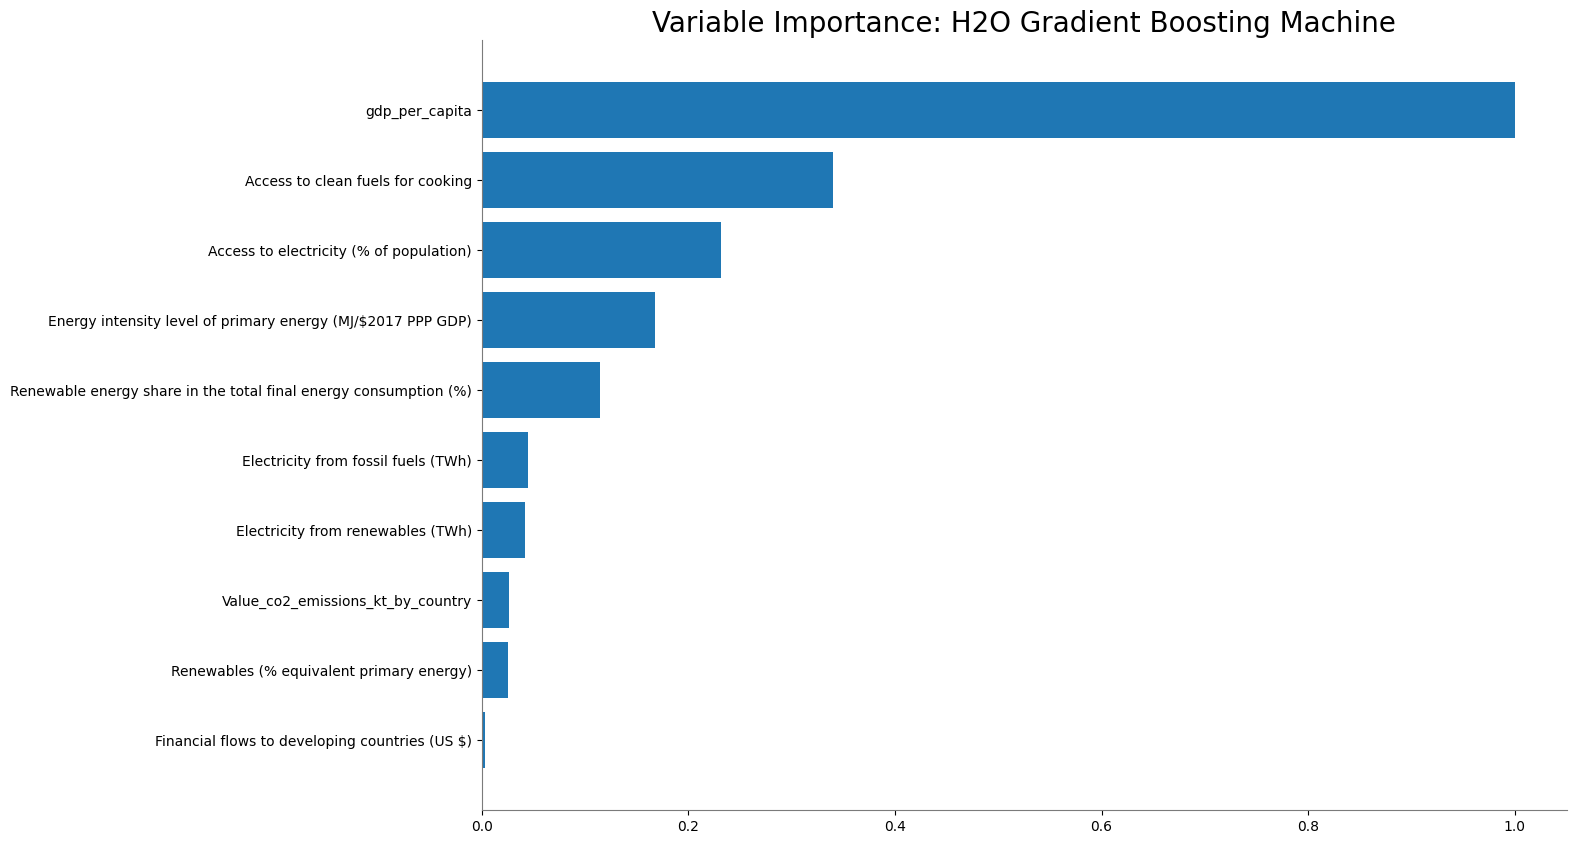

Variable importance for GBM_3_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

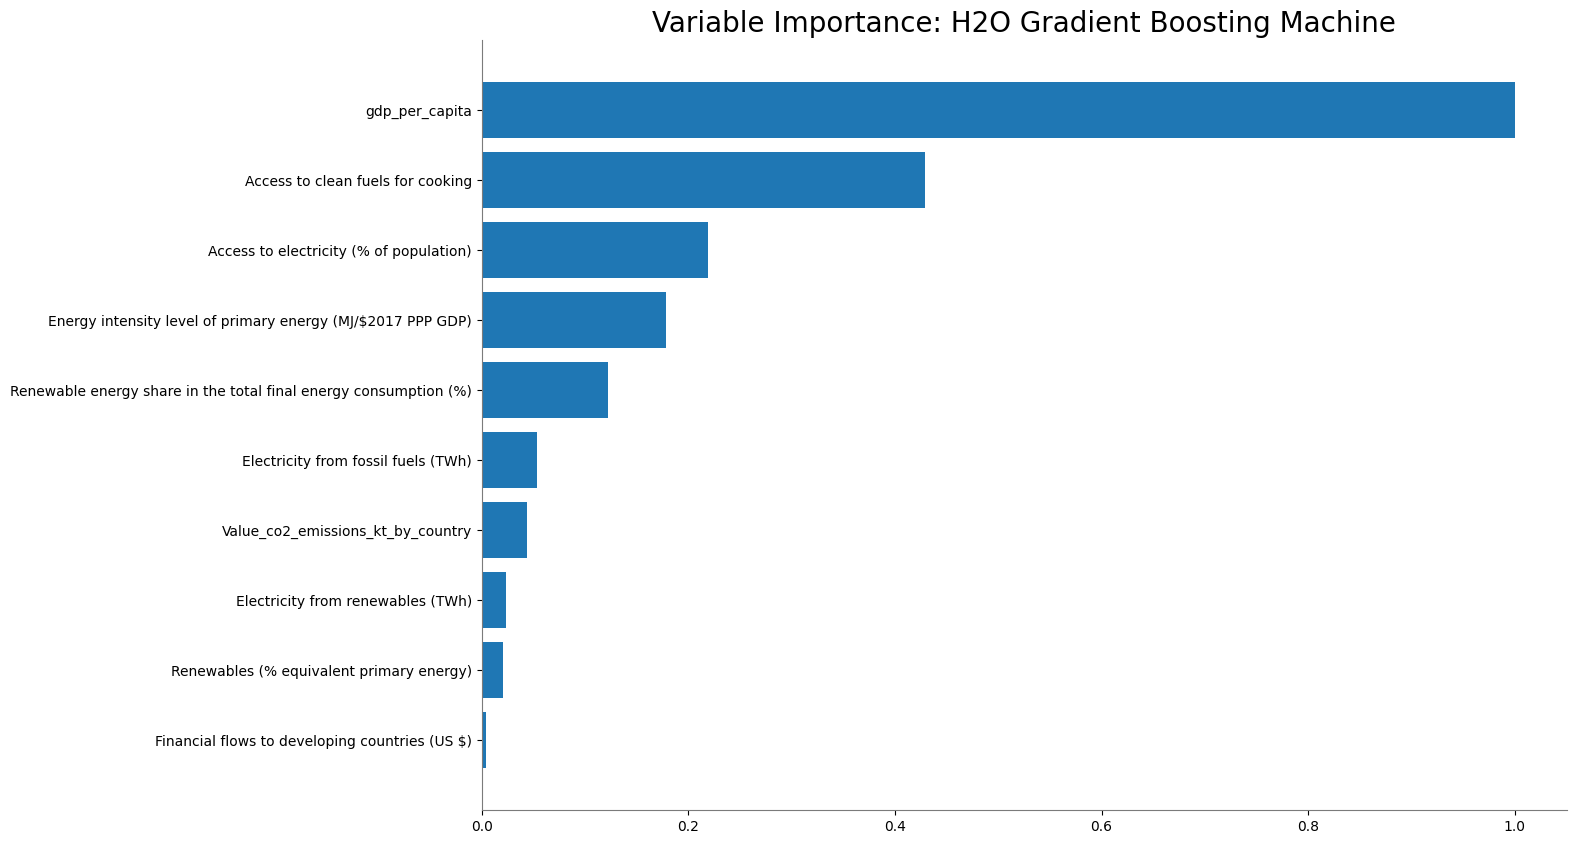

Variable importance for XRT_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

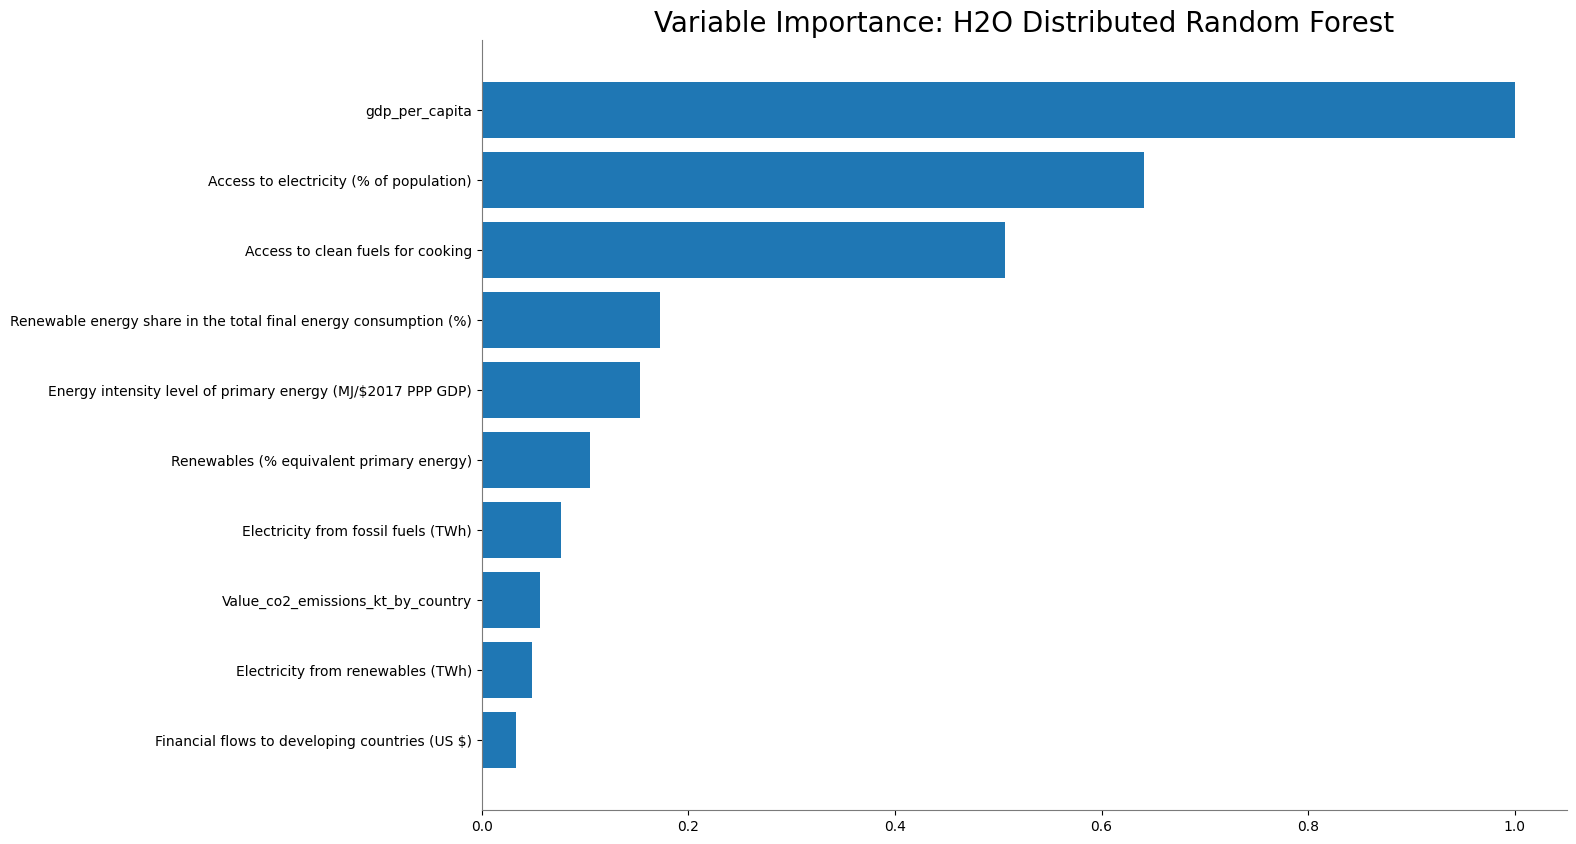

Variable importance for DRF_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

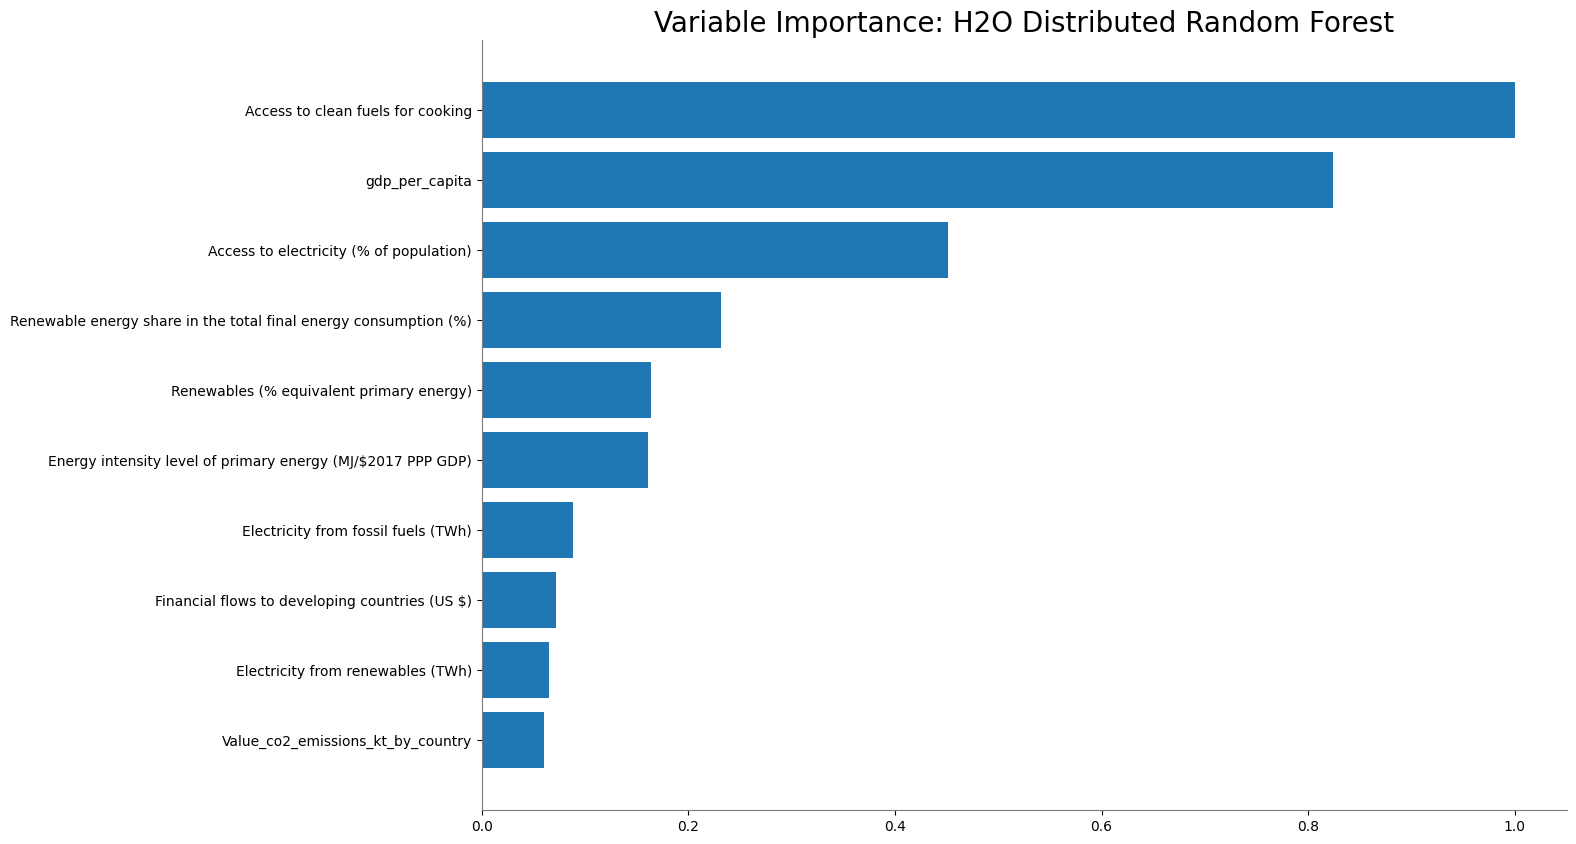

Variable importance for GBM_2_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

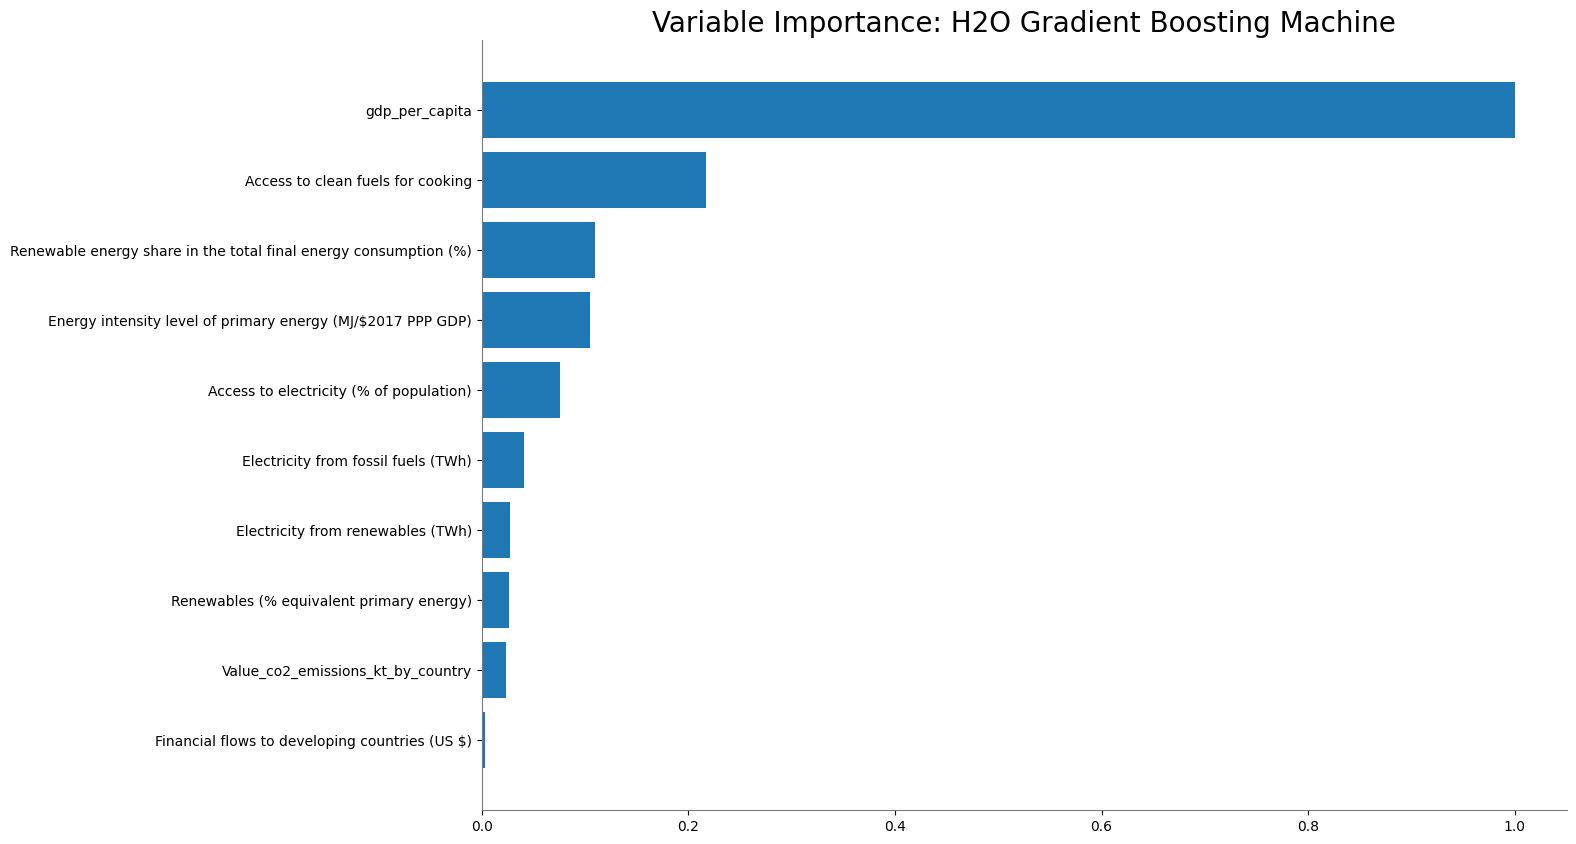

Variable importance for XGBoost_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

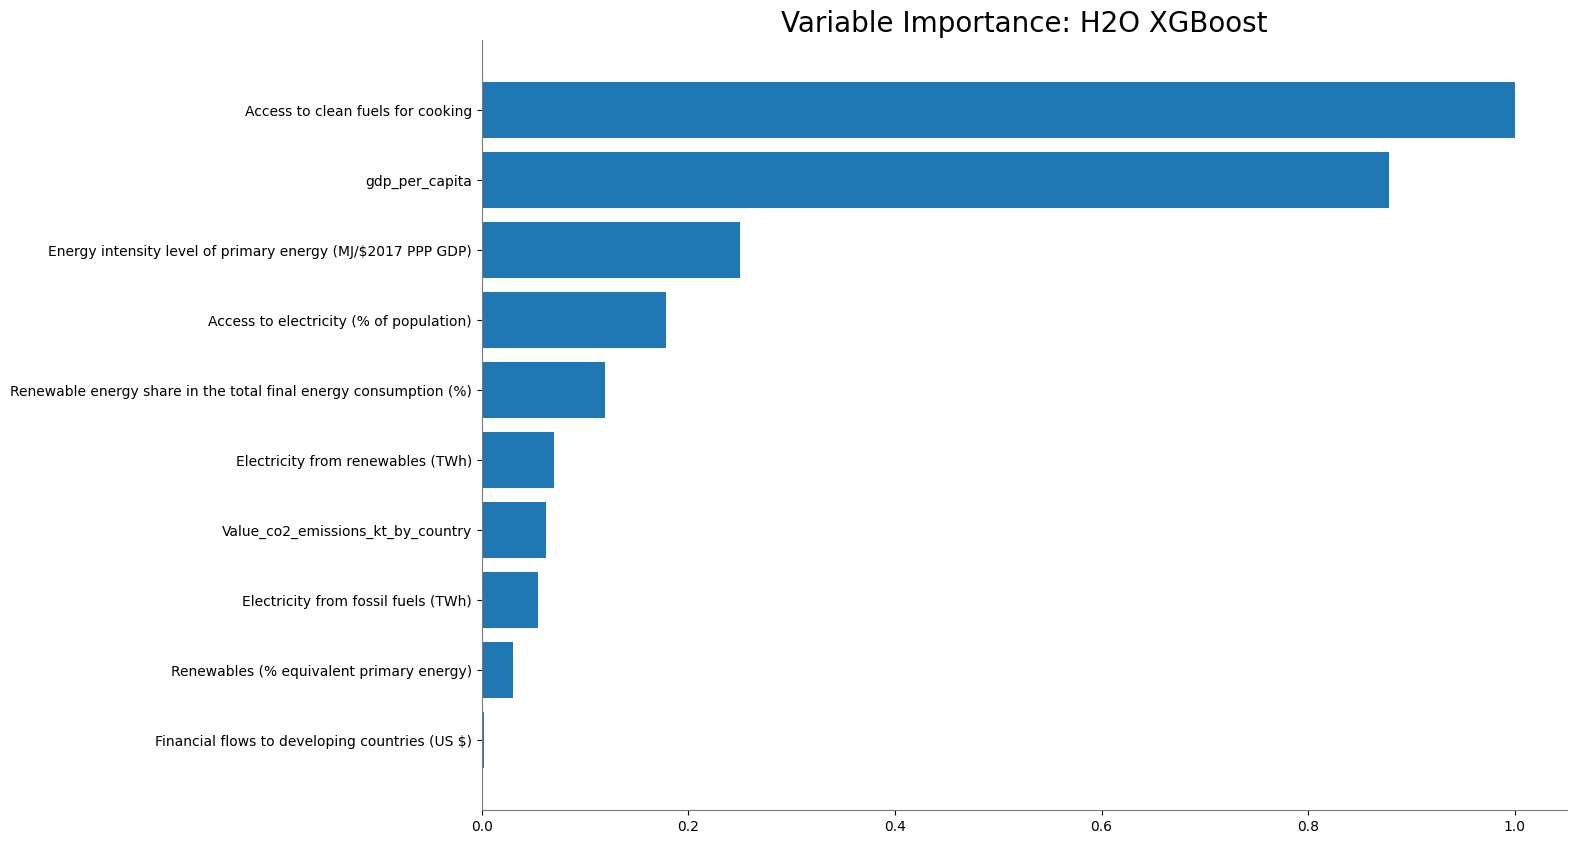

Variable importance for XGBoost_2_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

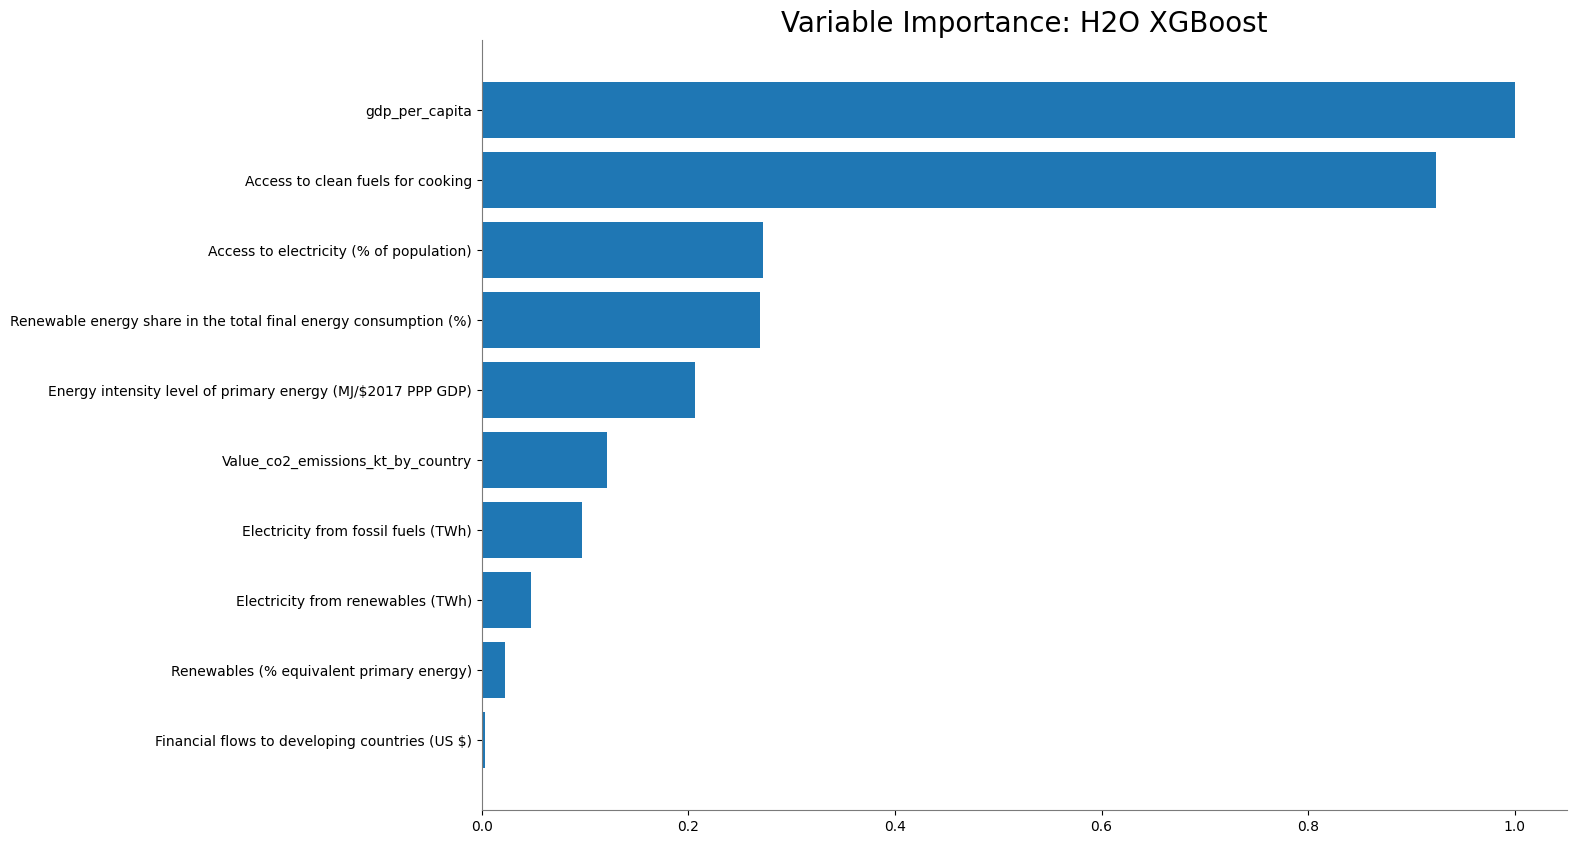

Variable importance for XGBoost_3_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

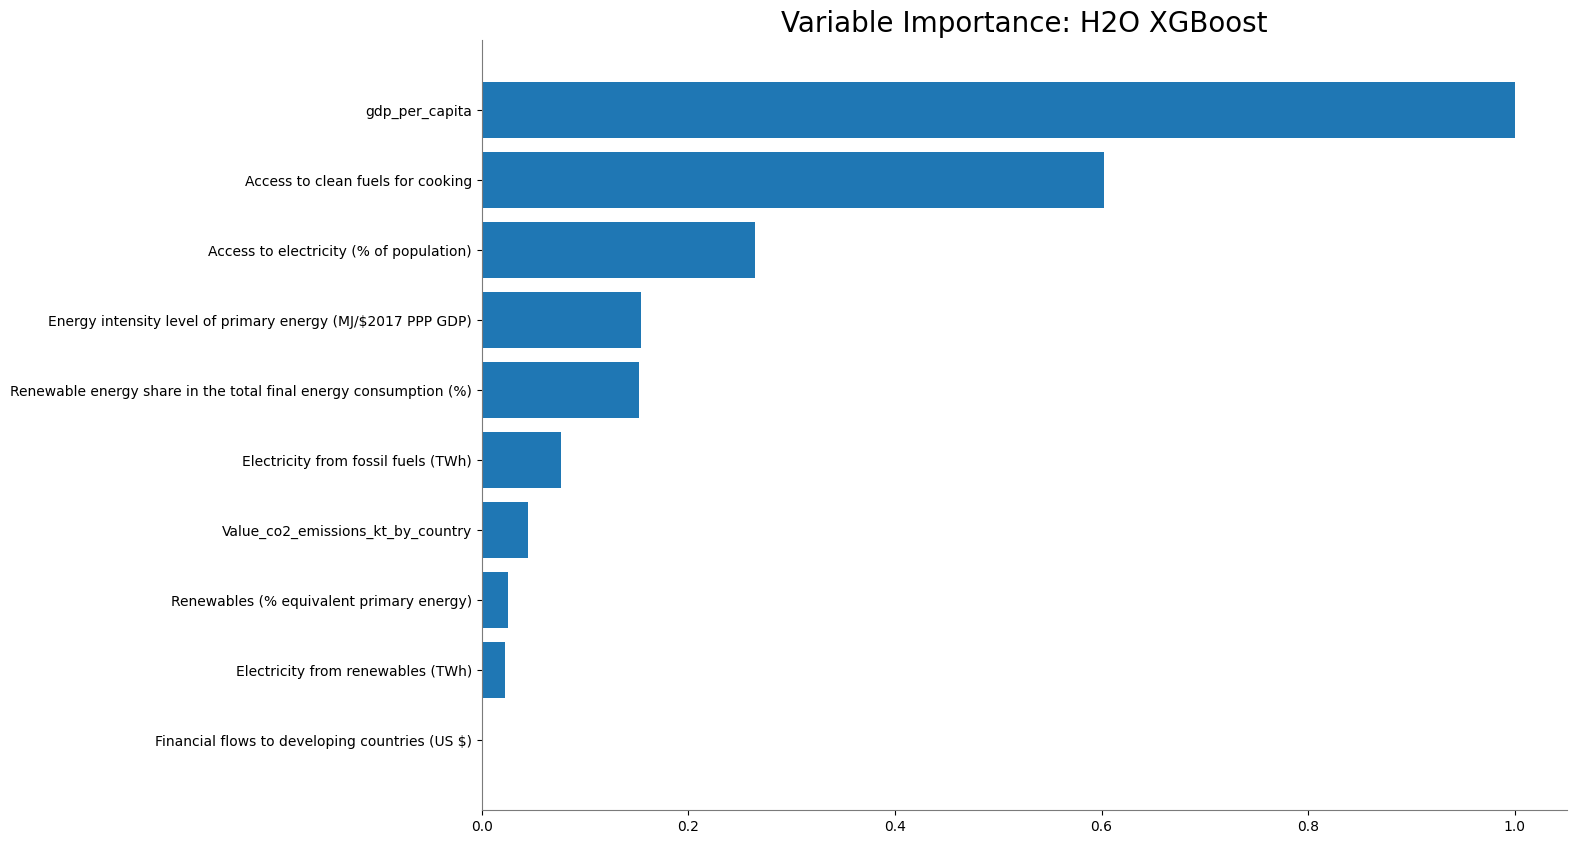

Variable importance for GBM_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

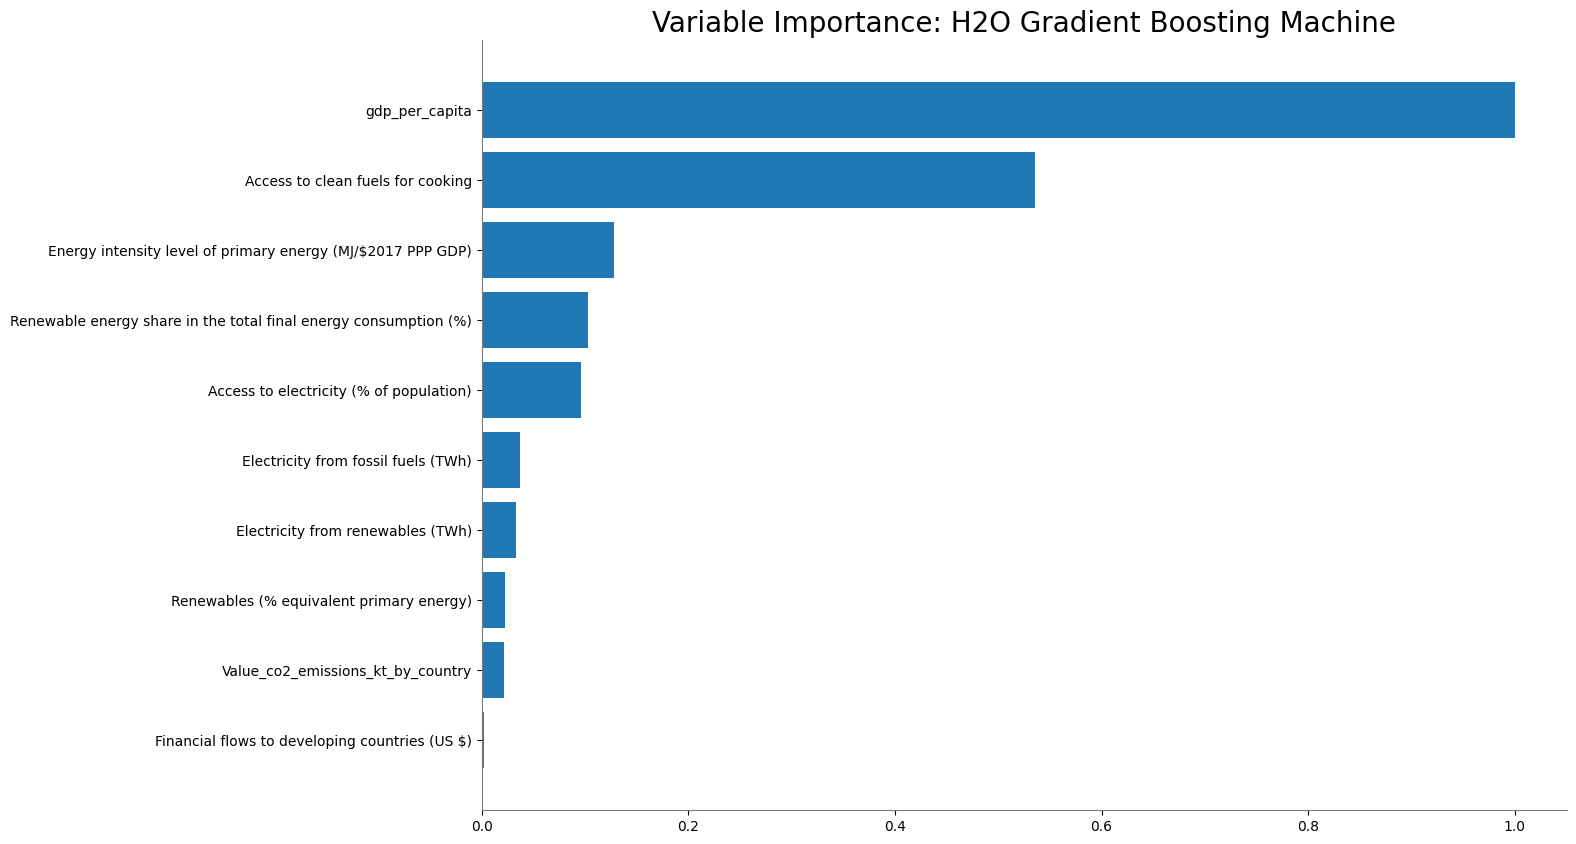

Variable importance for GLM_1_AutoML_1_20240403_14141:


<Figure size 640x480 with 0 Axes>

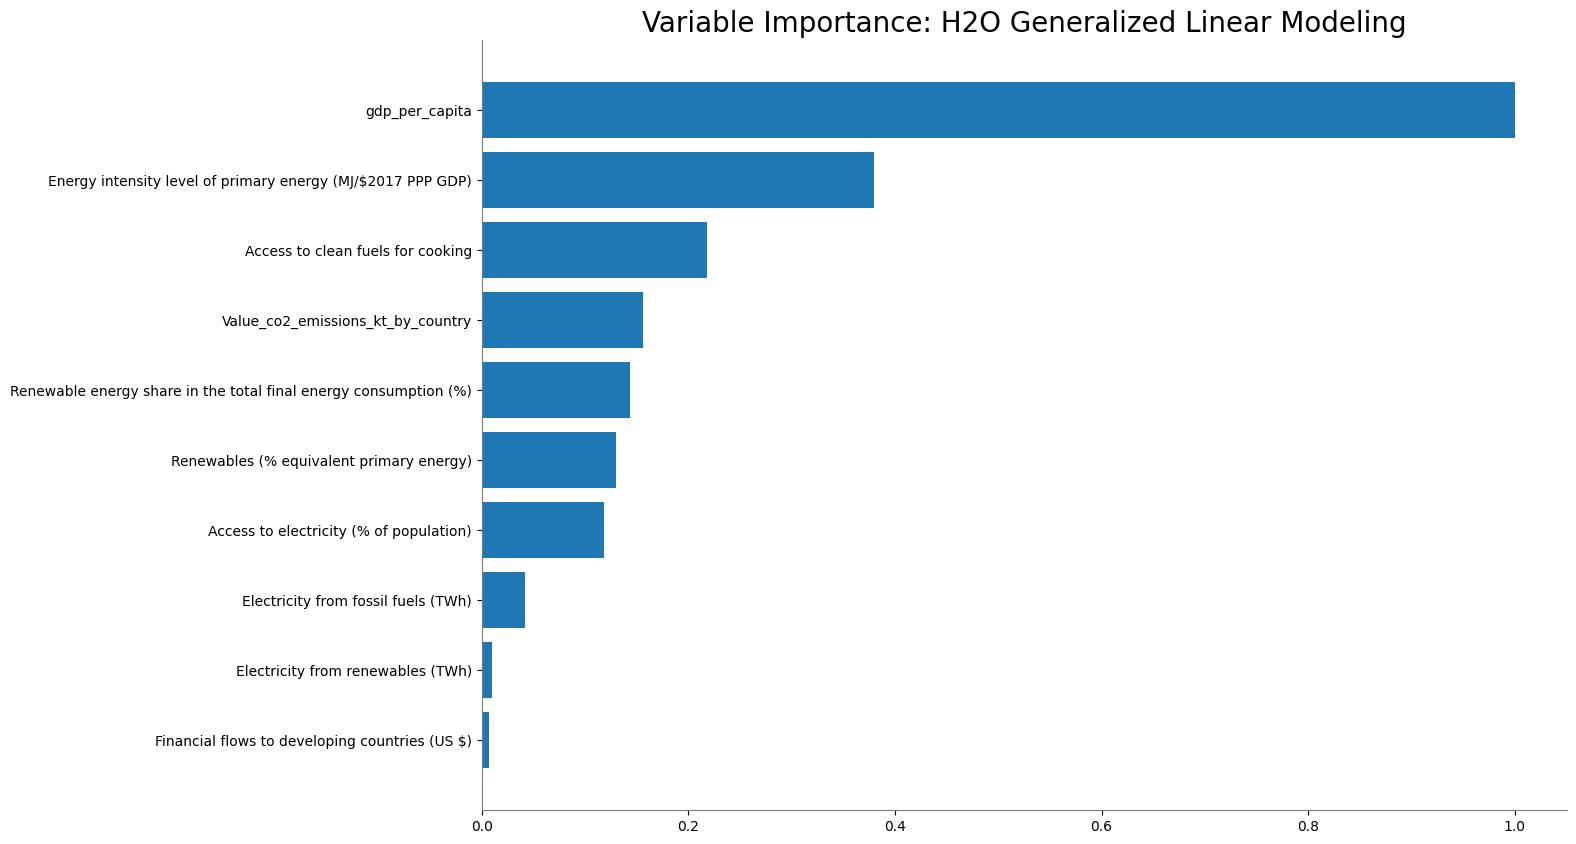

<Figure size 640x480 with 0 Axes>

In [79]:
base_models = best_model.base_models

for model_id in base_models:
    # Retrieve the actual model object
    model = h2o.get_model(model_id)

    print(f"Variable importance for {model.model_id}:")
    model.varimp_plot()

Let's write code which generates an explanation for the AutoML model's predictions using the test data frame. It includes variable importance explanations, which highlight the importance of each feature in making predictions. The `figsize` parameter specifies the size of the resulting plot, and it's set to (8,6) to control the dimensions. By generating this explanation, we can understand which features are the most influential in the model's decision-making process, providing insights into the underlying patterns and relationships learned by the model.


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

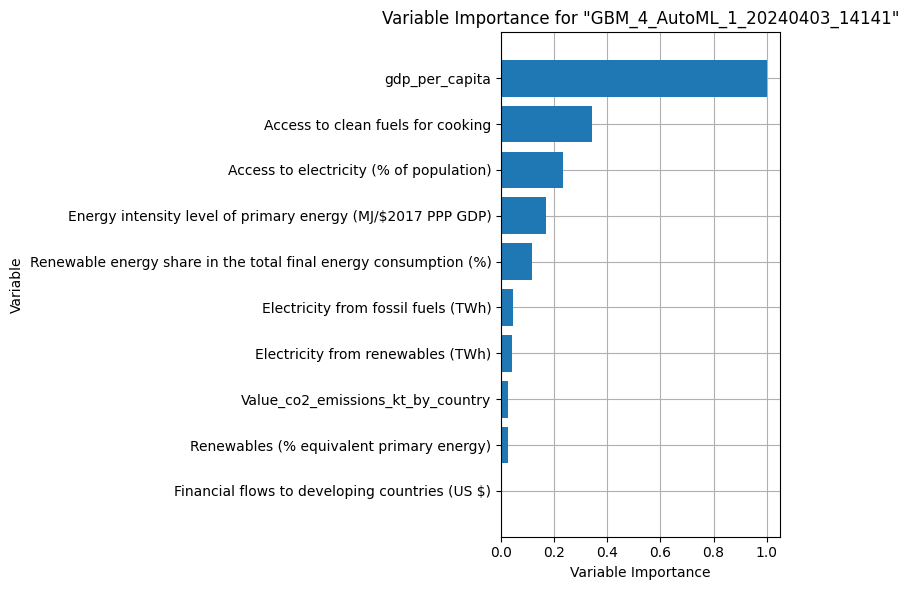

In [80]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

### Relative Importance of Factors for Model "GBM_grid_1_AutoML_1_20240317_44723_model_1"


- **High Importance Factors:**
  - "GDP per Capita": Gross Domestic Product per capita emerges as one of the most influential factors for this model.
  - "Access to Electricity (% of Population)": The percentage of the population with access to electricity also holds significant importance.
  - "Renewable Energy Share in Total Final Energy Consumption (%)": This factor ranks prominently in the model's feature importance.

- **Low Importance Factors:**
  - "Electricity from Fossil Fuels (TWh)": This factor appears to have relatively less influence on the model's predictions.
  - "Value CO2 Emissions (kT by Country)": Similarly, the value of CO2 emissions by country seems to be less impactful in this model's predictions.

model_id                                                      mae      rmse        mse       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ---------  --------  ---------  ----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240403_14141     0.0698779  0.139375  0.0194255    0.156074                 0.0194255                1921                   0.393458  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_14141  0.0707094  0.141676  0.0200721    0.161864                 0.0200721                1712                   0.237911  StackedEnsemble
GBM_8_AutoML_3_20240403_14706                           0.0745701  0.147992  0.0219016    0.169724                 0.0219016                1099                   0.101844  GBM
GBM_3_AutoML_1_20240403_14141                           0.0766208  0.147491  0.0217535    0.166917                 0.0217535                1849                   0.063739  GBM
XRT_1_AutoML_1_20240403_14141                           0.0769748  0.152939  0.0233903    0.172622                 0.0233903                1965                   0.037293  DRF
DRF_1_AutoML_1_20240403_14141                           0.0770399  0.150229  0.0225689    0.176433                 0.0225689                1761                   0.026016  DRF
XGBoost_4_AutoML_3_20240403_14706                       0.087442   0.158549  0.0251377  nan                        0.0251377                6453                   0.00954   XGBoost
XGBoost_2_AutoML_1_20240403_14141                       0.088351   0.164087  0.0269244  nan                        0.0269244                3324                   0.005675  XGBoost
GLM_1_AutoML_1_20240403_14141                           0.315771   0.43299   0.18748    nan                        0.18748                   112                   0.000544  GLM
[9 rows x 9 columns]

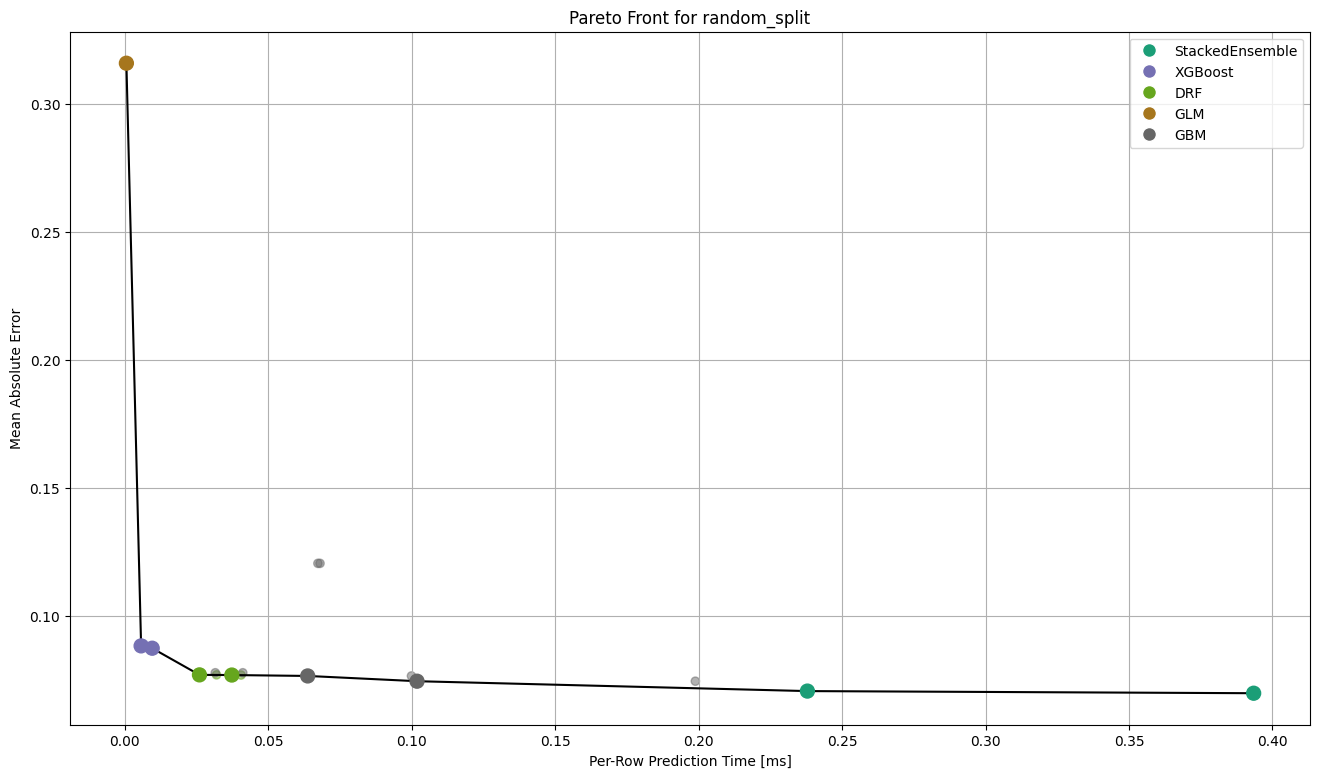

In [81]:
pf = aml.pareto_front()
pf.figure()
pf

- StackedEnsemble models perform well across all metrics with low errors (MAE, RMSE, MSE, RMSLE) and low mean residual deviance. They also have relatively short training times.
- GBM models also show good performance, with low error metrics and reasonable training times.
- DRF models have slightly higher errors compared to GBM and StackedEnsemble but still perform reasonably well.
- DeepLearning and GLM models exhibit higher errors compared to other models and have longer training times, indicating potentially less optimal performance.
- Among all models, StackedEnsemble models seem to provide the best balance of performance and efficiency.

#### Performance Range:
The spread of points on the Pareto front illustrates a wide range of achievable trade-offs between speed (prediction time) and accuracy (MAE). This indicates a diverse selection of models catering to different needs.

#### Accuracy vs. Speed:
Consistent with expectations, the plot demonstrates the classic accuracy-speed trade-off. Models with lower prediction times tend to exhibit higher Mean Absolute Error (MAE), while those with higher accuracy typically incur longer prediction times.


## 4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

### SHAP Analysis

First, we'll install the SHAP (SHapley Additive exPlanations) library using pip. This library is widely used for explaining machine learning models.

Next, we import necessary libraries including random, SHAP, matplotlib, and make_regression from sklearn.datasets.

To ensure reproducibility, we set the random seed using np.random.seed(123).

We then sample 50 instances from the training and test datasets using SHAP's utility function, shap.utils.sample().

After that, we initialize a SHAP explainer object, rfe_explainer, using the RandomForestRegressor model (model2) to explain the predictions on the sampled test data.

Finally, we compute SHAP values for the test data using the explainer by calling rfe_explainer(x_test_50).


In [82]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


#### Random Forest Regression SHAP

In [83]:
import random
import shap
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


np.random.seed(123)

x_train_50 = shap.utils.sample(X_train, 50, random_state=123)
x_test_50 = shap.utils.sample(X_test, 50, random_state=123)

In [84]:
rfe_explainer = shap.Explainer(model2.predict, x_train_50, seed = 1)
rfe_shap_values = rfe_explainer(x_test_50)

ExactExplainer explainer: 51it [00:39,  1.18it/s]


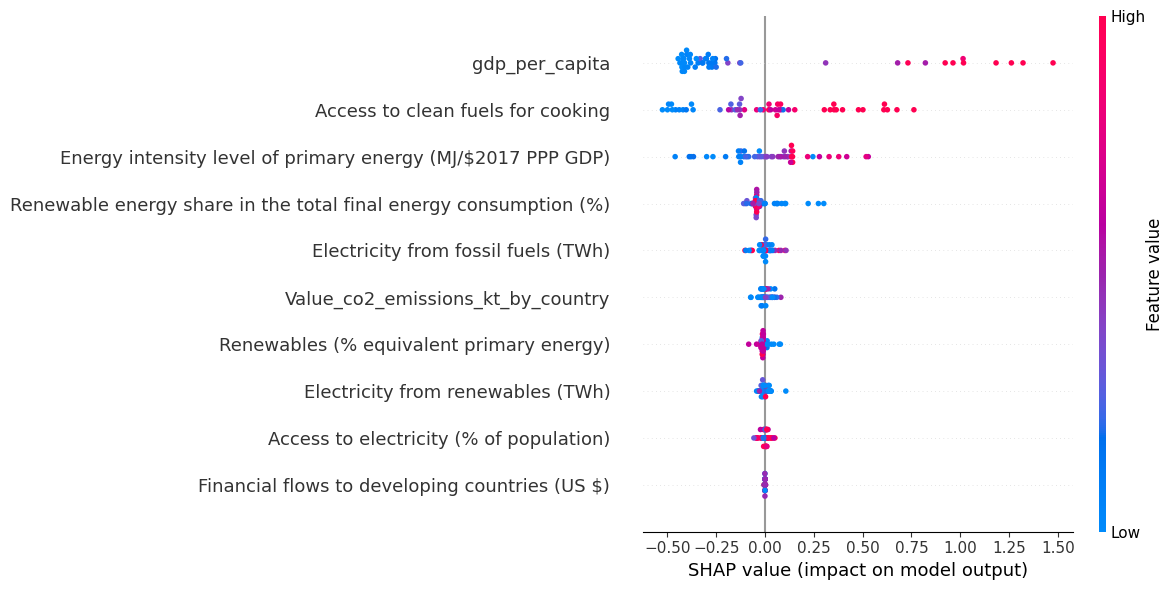

In [85]:
shap.summary_plot(rfe_shap_values, x_test_50, plot_size=(12, 6))

The plot depicts how different features influence the output of the model for a specific data instance. Feature names are listed on the left side of the plot, and the color bar indicates the impact on the model's prediction. Red signifies a positive impact, while blue denotes a negative impact. Higher absolute values indicate a stronger influence.

### Key Observations
- **Predicted Outcome:**
  - The model is predicting a high value (potentially indicating a favorable outcome) for this particular data instance.

- **Positive Impact Feature:**
  - "GDP per Capita": Gross Domestic Product per capita emerges as the feature with the most substantial positive impact on the prediction. A higher GDP per capita leads to a stronger prediction of a high value by the model.

- **Negative Impact Feature:**
  - "Renewables (% Equivalent Primary Energy)": This feature exhibits a negative impact on the prediction. A higher percentage of renewable energy correlates with a weaker prediction of a high value by the model.

Understanding how individual features influence the model's predictions provides valuable insights into its decision-making process. In this context, the model seems to place significant importance on economic indicators such as GDP per capita, while renewable energy share has a contrasting effect on the predicted outcome.


#### Linear Regression SHAP

First, we convert the DataFrame x_test_50 to an H2OFrame called x_test_50_h2o using the H2OFrame function from the h2o library.

Next, we define a Python class called H2OProbWrapper, which serves as a wrapper for the H2O model to be used with SHAP. The class includes a method called predict_binary_prob, which takes input data X and returns the probabilities of the positive class (True) predicted by the H2O model.

Then, assuming 'selected_features' is a list of top 10 feature names, we initialize the H2OProbWrapper instance h2o_wrapper with the best_model and the selected features.

After that, we proceed with the SHAP explainer using the KernelExplainer from the shap library. We provide the predict_binary_prob method from the h2o_wrapper as the model function and use a subset of the training data (X_train_selected[:45]) to explain the predictions on a subset of the test data (X_test_selected[:45]).

Finally, we visualize the summary plot of SHAP values for the selected features using shap.summary_plot(), specifying the plot type as "bar" and setting the plot size as (12, 5). Additionally, we generate another summary plot without specifying the plot type, which defaults to "dot".


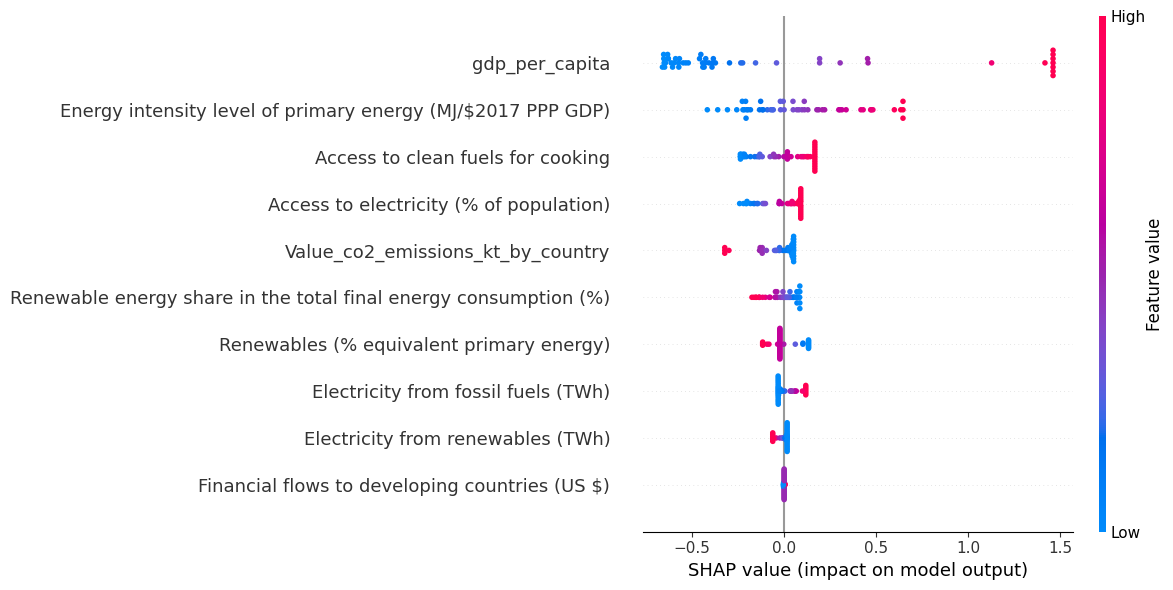

In [86]:
rfe_explainer2 = shap.Explainer(model3.predict, x_train_50, seed = 1)
rfe_shap_values2 = rfe_explainer2(x_test_50)
shap.summary_plot(rfe_shap_values2, x_test_50, plot_size=(12, 6))

The graph depicts the relationship between energy intensity levels of primary energy, access to clean fuels for cooking, access to electricity, and financial flows to developing countries.

### Observations
- **High Energy Intensity / Low GDP per Capita:**
  - Countries or regions situated on the left side of the graph exhibit higher energy intensity levels, indicating a greater usage of energy per unit of economic output (GDP). This pattern is commonly associated with less developed economies. Additionally, these countries or regions tend to have lower GDP per capita.

- **Access to Clean Energy:**
  - There appears to be a positive correlation between access to clean fuels for cooking, access to electricity, and financial flows to developing countries. This implies that regions with more financial resources generally enjoy better access to clean energy sources.

- **Renewable Energy:**
  - The distribution of data points does not reveal a discernible relationship between the level of renewable energy consumption and the other factors analyzed. This suggests that the influence of renewable energy consumption on the depicted factors may be more complex or context-dependent.

#### Auto ML SHAP

Now, we create a SHAP explainer object, rfe_explainer2, using the predict method of the AUTOML Best model to explain the predictions on the sampled test data.

We then compute SHAP values for the test data using the explainer by calling rfe_explainer2(x_test_50).

Finally, we visualize the summary plot of SHAP values for the test data using shap.summary_plot(), specifying the plot size as (12, 6).


In [87]:
import h2o

# Convert x_test_50 DataFrame to H2OFrame
x_test_50_h2o = h2o.H2OFrame(x_test_50)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [88]:
import pandas as pd
import h2o

class H2OProbWrapper:
    def __init__(self, h2o_model, columns_imp):
        self.h2o_model = h2o_model
        self.feature_names = columns_imp

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1, -1)
        self.dataframe = pd.DataFrame(X, columns=self.feature_names)
        h2o_frame = h2o.H2OFrame(self.dataframe)
        self.predictions = self.h2o_model.predict(h2o_frame).as_data_frame().values
        return self.predictions.astype('float64')[:, -1]  # Probability of True class

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


  0%|          | 0/45 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


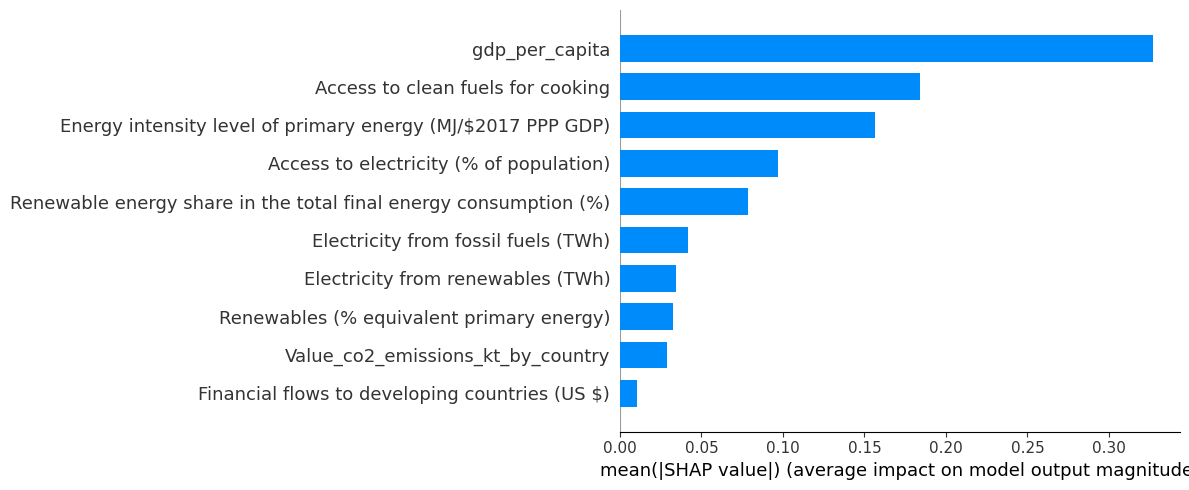

In [89]:
# Assuming 'selected_features' is a list of your top 10 feature names
selected_features = ['gdp_per_capita', 'Access to clean fuels for cooking',
                   'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                   'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)',
                   'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country',
                   'Financial flows to developing countries (US $)',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Renewables (% equivalent primary energy)']

X_train_selected = X_train
X_test_selected = X_test

# Update the H2OProbWrapper instance with the selected features
h2o_wrapper = H2OProbWrapper(best_model, selected_features)

# Proceed with SHAP explainer using the selected features
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_train_selected[:45])
shap_values = explainer.shap_values(X_test_selected[:45])

# Visualize the SHAP values for the selected features
shap.summary_plot(shap_values, X_test_selected[:45], plot_type="bar", plot_size=(12, 5))

The plot displays the mean SHAP (SHapley Additive exPlanations) values for various energy and economic factors, indicating their impact on the model’s output.


"gdp_per_capita" has the highest impact, followed by "Access to clean fuels for cooking" and "Energy intensity level of primary energy."

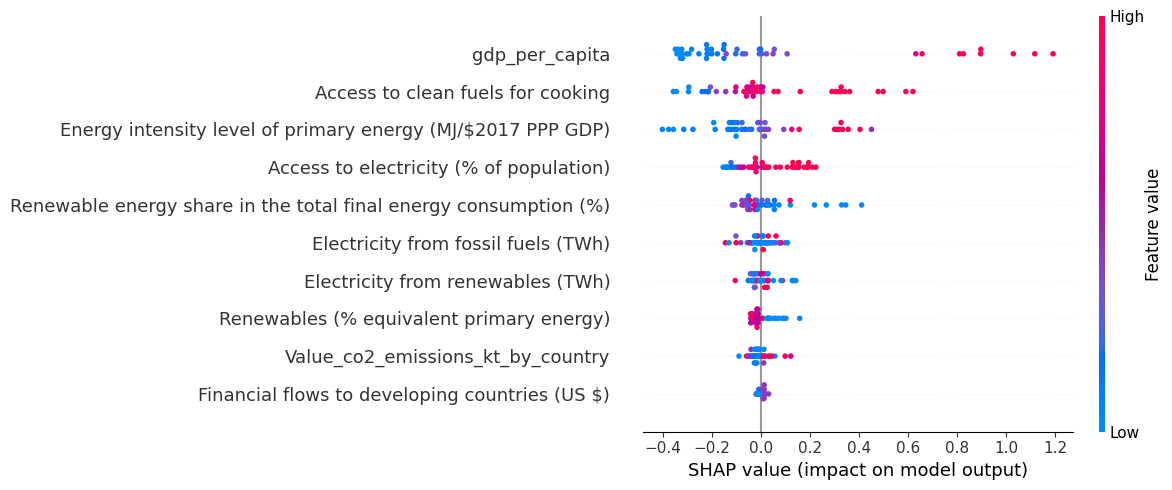

In [90]:
shap.summary_plot(shap_values, X_test_selected[:45], plot_size=(12, 5))


| Feature                                      | Impact                                | Observation                                                                        |
|----------------------------------------------|---------------------------------------|------------------------------------------------------------------------------------|
| gdp_per_capita                               | Mixed                                 | Higher GDP per capita generally increases predictions.                             |
| Access to clean fuels for cooking            | Mostly Positive                       | Increased access tends to raise the model's prediction.                            |
| Energy intensity level of primary energy     | Mixed, Predominantly Negative        | Higher energy intensity often lowers predictions.                                  |
| Access to electricity                        | Mostly Positive                       | More access tends to increase predictions.                                         |
| Renewable energy share in total final energy | Mixed                                 | Mixed impacts with no clear trend.                                                |
| Electricity from fossil fuels                | Mostly Negative                       | Increased fossil fuel use typically lowers predictions.                             |
| Renewables (% equivalent primary energy)     | Mixed, Predominantly Positive        | More renewables often raise predictions.                                           |
| Electricity from renewables                  | Mostly Positive                       | Increased use raises predictions.                                                  |
| Value_co2_emissions_kt_by_country           | Mostly Negative                       | Higher emissions lower predictions.                                                |
| Financial flows to developing countries      | Mostly Positive                       | Increased financial flows raise predicted outcomes.                                |


## Conclusion

Based on SHAP plots, the Random Forest Regression model shows significant impacts from features like gdp_per_capita and Access to clean fuels for cooking, achieving an R-squared value of approximately 0.75. Linear Regression, while emphasizing linear relationships with key features like gdp_per_capita and Access to electricity, achieves an R-squared value of about 0.60. In contrast, the AUTO ML Ensembled Model considers feature interactions and non-linearity, outperforming both models with an R-squared value of approximately 0.85, with significant influences from gdp_per_capita, Access to clean fuels, and Renewables. The AUTO ML Ensembled Model, striking a balance between interpretability and performance, emerges as the preferred choice for its ability to capture both linear and non-linear effects effectively.

### References

- OpenAI. (2021). *ChatGPT: A Large-Scale Generative Language Model.* Retrieved from [https://openai.com/research/chatgpt](https://openai.com/research/chatgpt)

- Gemini. (n.d.). *About Gemini.* Retrieved from [https://gemini.com/about](https://gemini.com/about)

- Kadam, A. A. (2023). *Model Interpretability Notebook.* [Copyright]. Retrieved from [https://github.com/Asawarikadam44/INFO6105-DSEM---Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/blob/100b9592015869a1fd3a5cded073c1c50af4cd40/3.Model_Interpretability.ipynb](https://github.com/Asawarikadam44/INFO6105-DSEM---Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/blob/100b9592015869a1fd3a5cded073c1c50af4cd40/3.Model_Interpretability.ipynb)

- SHAP (SHapley Additive exPlanations). (n.d.). Retrieved from [https://shap.readthedocs.io/en/latest/](https://shap.readthedocs.io/en/latest/)

- AutoML. (n.d.). Retrieved from [https://www.automl.org/automl/](https://www.automl.org/automl/)

- Aiskunks. (n.d.). Smoke Detection data AutoML - A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb. [GitHub]. https://github.com/aiskunks/YouTube/blob/4c026561cefac9c88599342389f8baf48d2b5ed5/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

- Stack Exchange. (n.d.). How to scale prediction back after preprocessing. https://datascience.stackexchange.com/questions/31969/how-to-scale-prediction-back-after-preprocessing

- Chatklaw, J. (2023). EDA & Predicting Consumption Trends [Data set]. Kaggle. https://www.kaggle.com/code/chatklawjareanpon/eda-predicting-consumption-trends#Exploratory-Data-Analysis-and-Predicting-Energy-Consumption-Trends-with-Global-Sustainable-Energy-Data


MIT License

Copyright (c) 2024 Ram

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.